<a href="https://colab.research.google.com/github/Sasha-Babur/DA_SA/blob/main/Baburchenkova.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Сравнительный анализ вакансий аналитика данных и системного аналитика, представленных на hh.ru**


**Цель исследования** - выявить различия в предлагаемых вакансиях для Аналитиков данных и Системных аналитиков.


**Описание данных**

id - Уникальный идентификатор вакансии


name - Название вакансии


published_at - Дата публикации


alternate_url - Ссылка на вакансию

type - Статус вакансии на момент получения данных от api и передачи их в базу

employer - Работодатель


department - Работодатель, отдел


area - Регион места работы


experience - Требуемый опыт работы


key_skills - Ключевые навыки, в том числе найденные при анализе
полного текста вакансии. Поле генерируется после получения
информации от api.


schedule - График работы


employment - Тип занятости


description - Описание вакансии


description_lemmatized - Лемматизированное описание вакансии

salary_from - Нижняя граница предлагаемой заработной платы

salary_to - Верхняя граница предлагаемой заработной платы

salary_bin - Категория зарплаты

key_skills_from_key_skills_field - Ключевые навыки из поля вакансии key_skills

hard_skills_from_description - “Твердые” навыки, найденные при обработке полей с навыками. Поле генерируется после получения информации от api.

soft_skills_from_description - “Мягкие” навыки,
найденные при обработке полей с навыками. Поле генерируется после получения информации от api.

**Ход исследования**
Двнные о вакансиях системных аналитиков и аналитиков данных получены из API HH.ru. Перед проверкой гипотез понадобится обзор данных. Затем, на этапе предобработки необходимо будет исправить ошибки данных.

Таким образом, исследование пройдёт в четыре этапа:
 1. Обзор данных.
 2. Предобработка данных.
 3. Исследовательский анализ.
 4. Общий вывод и создание презентации.





# Загрузка и обзор данных

In [1]:
# Импортируем необходимые библиотеки
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
import numpy as np


In [2]:
# Загружаем датасеты
# Аналитики данных
url='https://docs.google.com/spreadsheets/d/1SK1ro3sI7nCte0eQNf1iaICNrASYo1Yx/edit?usp=sharing&ouid=117856591745423867445&rtpof=true&sd=true' # между кавычками — скопированная ссылка на файл

url='https://drive.google.com/uc?id=' + url.split('/')[-2]

data_da = pd.read_excel(url)

# Системные аналитики
url='https://docs.google.com/spreadsheets/d/1eiOHLXpHwepJj4wHNoTrL-b6kHeTPFSa/edit?usp=sharing&ouid=117856591745423867445&rtpof=true&sd=true' # между кавычками — скопированная ссылка на файл

url='https://drive.google.com/uc?id=' + url.split('/')[-2]

data_sa = pd.read_excel(url)


In [3]:
data_da.head()

,id,name,published_at,alternate_url,type,employer,department,area,experience,key_skills,schedule,employment,description,description_lemmatized,salary_from,salary_to,salary_bin,key_skills_from_key_skills_field,hard_skills_from_description,soft_skills_from_description
0,100039284,Junior аналитик данных (исследователь),2024-05-24 09:37:04,https://hh.ru/vacancy/100039284,Открытая,DNS Головной офис,NaN,Владивосток,Junior (no experince),"['Power BI', 'СУБД', 'Python', 'SQL']",Полный день,Полная занятость,наше направление занимается повышением эффекти...,наш направление заниматься повышение эффективн...,60000.0,NaN,ЗП не указана,"SQL, Power BI, Python, СУБД",NaN,NaN
1,100039480,Аналитик данных,2024-05-24 09:39:00,https://hh.ru/vacancy/100039480,Открытая,Комус,NaN,Москва,Junior (no experince),"['MS SQL', 'Работа с базами данных', 'MS Excel']",Полный день,Полная занятость,сегодня комус один из крупнейших поставщиков о...,сегодня комус крупный поставщик офисный товар ...,NaN,NaN,ЗП не указана,"Работа с базами данных, MS SQL, MS Excel",NaN,NaN
2,100042705,Аналитик данных (исследователь),2024-05-24 10:01:25,https://hh.ru/vacancy/100042705,Открытая,DNS Головной офис,NaN,Владивосток,Junior+ (1-3 years),"['SQL', 'Power BI', 'СУБД', 'Python', 'Clickho...",Полный день,Полная занятость,наше направление занимается повышением эффекти...,наш направление заниматься повышение эффективн...,90000.0,NaN,ЗП не указана,"SQL, Power BI, Python, СУБД, BPMN, Clickhouse",NaN,NaN
3,100046788,Ведущий аналитик данных,2024-05-24 10:28:18,https://hh.ru/vacancy/100046788,Открытая,Х5 Group,"X5 GROUP, Центральный офис",Москва,Junior+ (1-3 years),"['Анализ данных', 'Коммуникация', 'SQL', 'MS O...",Полный день,Полная занятость,задачи: разработка бизнес-моделей для группов...,задача разработка бизнес модель групповой прог...,NaN,NaN,ЗП не указана,"MS Office, SQL, Python, Hadoop, Нive, Аналитич...","Pandas, Юнит-экономика",Коммуникация
4,100056244,Аналитик данных,2024-05-24 11:27:40,https://hh.ru/vacancy/100056244,Открытая,ЛУКОЙЛ,NaN,Москва,Middle (3-6 years),['Документация'],Полный день,Полная занятость,"обязанности: участие в проектировании, разраб...",обязанность участие проектирование разработка ...,NaN,NaN,ЗП не указана,NaN,NaN,Документация


In [4]:
data_sa.head()

,id,name,published_at,alternate_url,type,employer,department,area,experience,key_skills,schedule,employment,description,description_lemmatized,salary_from,salary_to,salary_bin,key_skills_from_key_skills_field,hard_skills_from_description,soft_skills_from_description
0,100046399,Системный аналитик,2024-07-08 10:22:57,https://hh.ru/vacancy/100046399,Открытая,Юрент,NaN,Москва,Middle (3-6 years),"['1С', 'Аналитический склад ума', 'confluence'...",Полный день,Полная занятость,юрент — это новый уровень городской мобильност...,юрент новый уровень городской мобильность круп...,NaN,NaN,ЗП не указана,"SQL, Аналитический склад ума, 1С",confluence,NaN
1,100050107,Бизнес/Системный Аналитик,2024-07-06 17:19:32,https://hh.ru/vacancy/100050107,Открытая,Surf,NaN,Санкт-Петербург,Junior+ (1-3 years),"['Разработка технических заданий', 'Бизнес-ана...",Удаленная работа,Полная занятость,в surf уже 13 лет мы разрабатываем много разны...,surf 13 год разрабатывать разный продукт начин...,NaN,NaN,ЗП не указана,"BPMN, UML, Английский язык, Системный анализ, ...",NaN,Документация
2,100059559,Системный IT аналитик,2024-07-08 11:48:17,https://hh.ru/vacancy/100059559,Открытая,AMarkets,NaN,Москва,Junior+ (1-3 years),['Документация'],Полный день,Полная занятость,"мы - международная fintech компания amarkets, ...",международный fintech компания amarkets 2 7 го...,233750.0,NaN,ЗП не указана,NaN,NaN,Документация
3,100063260,Системный Аналитик ERP-решений,2024-07-09 10:51:54,https://hh.ru/vacancy/100063260,Открытая,Астор,NaN,Москва,Senior (6+ years),"['ERP', 'Atlassian Jira', '1С: Управление Прои...",Удаленная работа,Полная занятость,компания «астор» с 2000 года занимается разраб...,компания астор 2 год заниматься разработка вне...,NaN,NaN,ЗП не указана,"ERP, 1С: Управление Торговлей, Atlassian Jira,...",confluence,Коммуникация
4,100064793,Системный аналитик,2024-07-08 16:39:40,https://hh.ru/vacancy/100064793,Открытая,Зетта Страхование,NaN,Москва,Junior+ (1-3 years),"['JSON', 'SQL', 'XML', 'SOAP', 'HTML', 'JS', '...",Полный день,Полная занятость,обязанности: анализ задач развития и сопрово...,обязанность анализ задача развитие сопровожден...,NaN,NaN,ЗП не указана,"SQL, C#, Java, JS, SOAP, JSON, XML, HTML, CSS",NaN,NaN


In [5]:
data_da.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1801 entries, 0 to 1800
Data columns (total 20 columns):
 #   Column                            Non-Null Count  Dtype         
---  ------                            --------------  -----         
 0   id                                1801 non-null   int64         
 1   name                              1801 non-null   object        
 2   published_at                      1801 non-null   datetime64[ns]
 3   alternate_url                     1801 non-null   object        
 4   type                              1801 non-null   object        
 5   employer                          1801 non-null   object        
 6   department                        521 non-null    object        
 7   area                              1801 non-null   object        
 8   experience                        1801 non-null   object        
 9   key_skills                        1801 non-null   object        
 10  schedule                          1801 non-null 

Всего 1801 вакансия для аналитиков данных. Больше половины значений пропущено в столбцах department, salary_from, salary_to, hard_skills_from_description, soft_skills_from_description. Также много пропусков в key_skills_from_key_skills_field.

In [6]:
data_sa.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1915 entries, 0 to 1914
Data columns (total 20 columns):
 #   Column                            Non-Null Count  Dtype         
---  ------                            --------------  -----         
 0   id                                1915 non-null   int64         
 1   name                              1915 non-null   object        
 2   published_at                      1915 non-null   datetime64[ns]
 3   alternate_url                     1915 non-null   object        
 4   type                              1915 non-null   object        
 5   employer                          1915 non-null   object        
 6   department                        361 non-null    object        
 7   area                              1915 non-null   object        
 8   experience                        1915 non-null   object        
 9   key_skills                        1915 non-null   object        
 10  schedule                          1915 non-null 

1915 вакансий для системных аналитиков. Пропуски в тех же столбцах, что и в датасете об аналитиках данных. Заметно различие в заполненности данных о софт скилах. Это может говорить о большей важности данного типа навыков для системных аналитиков.

Пропуски в department заполнять не будем, тем более в дальнейшем анализировать эти данные не требуется. Данные о зарплате не заполнены для большинства вакансий. Менее 20% вакансий содержит данные о заработной плате.

# Предобработка данных

## Поиск дубликатов

In [7]:
# Дубликаты
data_da.duplicated().sum()

0

In [8]:
# Дубликаты
data_sa.duplicated().sum()

0

Явных дубликатов нет

In [9]:
#Посмотрим, какие статусы вакансий встречаются
data_da['type'].unique()

array(['Открытая'], dtype=object)

In [10]:
data_sa['type'].unique()

array(['Открытая'], dtype=object)

Анализируем данные только по открытым вакансиям.

In [11]:
# Работодатели в вакансиях ДА
data_da['employer'].sort_values().unique()

array(['2050.Лаб', '2ГИС', '7RedLines', 'ADVANCE AUTO', 'ANCOR',
       'AUXO (Атос АйТи Солюшенс энд Сервисез)', 'AVO.UZ', 'AWATERA',
       'AWG', 'Abi', 'Adequo', 'AliExpress', 'Antal Talent',
       'Any Service', 'AppMagic', 'Appie.tech', 'Apple Wild',
       'Aramco Innovations', 'Aston', 'Axenix (ранее Accenture)',
       'B2Broker', 'BND LLC', 'BRANDPOL', 'Bayer', 'Bell Integrator',
       'Bell Integrator Регионы', 'BestDoctor', 'Between Exchange',
       'Blissweb', 'BlockShop', 'Bonduelle', 'COZY HOME', 'Callmedia',
       'Carcade Leasing', 'Carely', 'Changellenge', 'CloudPayments',
       'Coleman Group', 'D Innovate Group', 'DIGINETICA', 'DLS',
       'DNS Головной офис', 'DNS Технологии',
       'DODO BRANDS (Dodo Pizza, Drinkit, Кебстер)', 'Data-Driven Lab',
       'Devim', 'Diamond Personnel R&C', 'Digex Co', 'Dopamine Analytics',
       'EGAR TECHNOLOGY, INC.', 'EMCD Tech LTD',
       'EVYAP International Russia', 'Employcity', 'Evercode Lab',
       'Excdev', 'F.A.C.

Сложно сказать с абсолютной уверенностью, т.к. нет данных об ИНН или ОГРН, но с большой долей вероятности дубликатов нет. Такие вариации названий, как Самокат (ООО Умный ритейл) и Samokat.tech; Х5 Group, X5 Tech, Х5 IMPORT и X5 Digital; DNS Головной офис, DNS Технологии и Сеть магазинов цифровой и бытовой техники DNS; Ростелеком - Центры обработки данных и Ростелеком; Совкомбанк Лизинг и Совкомбанк; Яндекс Практикум и Яндекс, являются названиями разных юридических лиц, хоть и входящих в группы компаний.

In [12]:
# Работодатели в вакансиях СА
data_sa['employer'].sort_values().unique()

array(['1C-Медицина-Регион', '1С', '2ГИС', '3Logic Group', '42',
       '4people', '7RedLines', '7тек', 'A-hiring', 'A2SEVEN', 'ABCstaff',
       'ADV Project Ltd', 'ADV/web-engineering', 'ADVANTA', 'AFFINAGE',
       'AGAMA IT Group', 'AISA', 'AMBER', 'AMarkets', 'ANCOR',
       'AUXO (Атос АйТи Солюшенс энд Сервисез)', 'AVO.UZ', 'AldanDev',
       'AlfaBit', 'Amex Development', 'Antal Talent', 'Aston',
       'AutoDistribution Russia', 'Avalon-IT', 'Avanpost',
       'Axenix (ранее Accenture)', 'B2B-Center', 'BAUM', 'BI.ZONE', 'BIV',
       'BORK', 'Bazon', 'Bell Integrator', 'Bell Integrator Регионы',
       'Bercut', 'BestDoctor', 'Bimeister', 'Black Shark Recruiting',
       'BrainHub', 'CCS (Center of Corporate Solution)', 'CORE', 'CSBI',
       'CUSTIS', 'Carcade Leasing', 'Cargonomica', 'Centicore',
       'Cloud.ru', 'CodeInside', 'Comindware', 'Copperside', 'Coral Club',
       'Corporate Performance Systems', 'Creonit',
       'DIGITAL FUTURE SYSTEMS', 'DIS Group', 'DNS Техн

Обращает на себя внимание, что в датасете по системным аналитикам Леруа Мерлен уже с новым названием Лемана ПРО (Леруа Мерлен), в датасете по аналитикам данных употреблено наименование Леруа Мерлен, но т.к. они в разных датасетах, переименовывать не будем.

В остальном, ситуация с работодателями в data_sa аналогична датасету по аналитикам данных - дубликатов нет.

In [13]:
# Города в вакансиях ДА
sorted(data_da['area'].unique())

['Адыгейск',
 'Алтайское',
 'Артем',
 'Байбек',
 'Балашиха',
 'Белгород',
 'Вейделевка',
 'Великие Луки',
 'Вельск',
 'Верхняя Пышма',
 'Владивосток',
 'Владимир',
 'Волгоград',
 'Воронеж',
 'Горно-Алтайск',
 'Дзержинский',
 'Дмитров',
 'Екатеринбург',
 'Златоуст',
 'Иваново (Ивановская область)',
 'Ижевск',
 'Иркутск',
 'Казань',
 'Калининград',
 'Кемерово',
 'Киров (Кировская область)',
 'Королев',
 'Краснодар',
 'Красноярск',
 'Курган',
 'Липецк',
 'Луховицы',
 'Магнитогорск',
 'Майкоп',
 'Москва',
 'Мытищи',
 'Набережные Челны',
 'Нефтекамск',
 'Нижний Новгород',
 'Новосибирск',
 'Одинцово',
 'Омск',
 'Оренбург',
 'Пермь',
 'Подольск (Московская область)',
 'Псков',
 'Пушкино (Московская область)',
 'Ростов-на-Дону',
 'Рязань',
 'Самара',
 'Санкт-Петербург',
 'Саратов',
 'Северск (Томская область)',
 'Симферополь',
 'Смоленск',
 'Сочи',
 'Ступино',
 'Тверь',
 'Тольятти',
 'Томск',
 'Тула',
 'Турочак',
 'Тюмень',
 'Ульяновск',
 'Уфа',
 'Химки',
 'Чебоксары',
 'Челябинск',
 'Щербинка

Дубликатов нет

In [14]:
# Города в вакансиях СА
sorted(data_sa['area'].unique())


['Абакан',
 'Адлер',
 'Апатиты',
 'Астрахань',
 'Барнаул',
 'Белгород',
 'Белорецк',
 'Брянск',
 'Владивосток',
 'Владимир',
 'Волгоград',
 'Вологда',
 'Воронеж',
 'Геленджик',
 'Дзержинск (Нижегородская область)',
 'Дубна',
 'Екатеринбург',
 'Иваново (Ивановская область)',
 'Ижевск',
 'Иннополис',
 'Иркутск',
 'Йошкар-Ола',
 'Казань',
 'Калининград',
 'Калуга',
 'Кемерово',
 'Киров (Кировская область)',
 'Кольчугино',
 'Королев',
 'Кострома',
 'Красногорск',
 'Краснодар',
 'Красноярск',
 'Курган',
 'Курск',
 'Липецк',
 'Магнитогорск',
 'Майкоп',
 'Москва',
 'Муром',
 'Мытищи',
 'Набережные Челны',
 'Нижний Новгород',
 'Новокузнецк',
 'Новосибирск',
 'Новочеркасск',
 'Омск',
 'Орел',
 'Оренбург',
 'Пенза',
 'Пермь',
 'Петрозаводск',
 'Подольск (Московская область)',
 'Ростов-на-Дону',
 'Рубцовск',
 'Рязань',
 'Самара',
 'Санкт-Петербург',
 'Саранск',
 'Саратов',
 'Севастополь',
 'Смоленск',
 'Сочи',
 'Ставрополь',
 'Сургут',
 'Таганрог',
 'Тамбов',
 'Тверь',
 'Тольятти',
 'Томск',
 'Ту

Дубликатов нет

In [15]:
# Грейд ДА/опыт
data_da['experience'].unique()

array(['Junior (no experince)', 'Junior+ (1-3 years)',
       'Middle (3-6 years)', 'Senior (6+ years)'], dtype=object)

Дубликатов нет

In [16]:
# Грейд CА/опыт
data_sa['experience'].unique()

array(['Middle (3-6 years)', 'Junior+ (1-3 years)', 'Senior (6+ years)',
       'Junior (no experince)'], dtype=object)

Дубликатов нет

In [17]:
# График работы ДА
data_da['schedule'].unique()

array(['Полный день', 'Удаленная работа', 'Гибкий график',
       'Сменный график'], dtype=object)

In [18]:
# График работы СА
data_sa['schedule'].unique()

array(['Полный день', 'Удаленная работа', 'Гибкий график',
       'Сменный график'], dtype=object)

Дубликатов нет

In [19]:
# Тип занятости ДА
data_da['employment'].unique()

array(['Полная занятость', 'Стажировка', 'Частичная занятость',
       'Проектная работа'], dtype=object)

In [20]:
# Тип занятости СА
data_sa['employment'].unique()

array(['Полная занятость', 'Стажировка', 'Частичная занятость',
       'Проектная работа'], dtype=object)

Дубликатов нет

In [21]:
# Категория зарплаты ДА
data_da['salary_bin'].unique()


array(['ЗП не указана', 'От 100 тысяч до 200 тысяч',
       'От 200 тысяч до 300 тысяч', 'Меньше 100 тысяч',
       'Больше 300 тысяч'], dtype=object)

Дубликатов нет

In [22]:
# Категория зарплаты СА
data_sa['salary_bin'].unique()


array(['ЗП не указана', 'От 100 тысяч до 200 тысяч', 'Меньше 100 тысяч',
       'Больше 300 тысяч', 'От 200 тысяч до 300 тысяч'], dtype=object)

Дубликатов нет

In [23]:
# Варианты hard-skills ДА
data_da['hard_skills_from_description']=data_da['hard_skills_from_description'].str.lower()
data_da['hard_skills_from_description'].str.split(', ').explode().unique()

array([nan, 'pandas', 'юнит-экономика', 'confluence', 'google sheets',
       'математическая статистика'], dtype=object)

Дубликатов нет, но и перечень очень маленький

In [24]:
# Варианты hard-skills СА
data_sa['hard_skills_from_description']=data_sa['hard_skills_from_description'].str.lower()
data_sa['hard_skills_from_description'].str.split(', ').explode().unique()


array(['confluence', nan, 'юнит-экономика', 'pandas'], dtype=object)

Ситуация аналогична данным для аналитиков данных. Различие только в отсутствии google sheets.

In [25]:
# Варианты soft-skills ДА
data_da['soft_skills_from_description']=data_da['soft_skills_from_description'].str.lower()
data_da['soft_skills_from_description'].str.split(', ').explode().unique()

array([nan, 'коммуникация', 'документация', 'проактивность',
       'аналитическое мышление', 'креативность', 'адаптивность',
       'решение проблем', 'презентация результатов', 'внимание к деталям',
       'критическое мышление', 'эмпатия', 'переговоры',
       'принятие решений', 'тайм-менеджмент'], dtype=object)

С soft_skills_from_description получше. Наверное, даже достаточно и можно использовать для анализа. Дубликатов нет.

In [26]:
# Варианты soft-skills СА
data_sa['soft_skills_from_description']=data_sa['soft_skills_from_description'].str.lower()
data_sa['soft_skills_from_description'].str.split(', ').explode().unique()

array([nan, 'документация', 'коммуникация', 'проактивность',
       'аналитическое мышление', 'креативность', 'переговоры',
       'письменная коммуникация', 'тайм-менеджмент', 'эмпатия'],
      dtype=object)

Список поменьше, чем у ДА. Дубликатов нет.

In [27]:
# Посмотрим список уникальных навыков в key_skills ДА
# Уберем лишние символы и приведем к нижнему регистру
data_da['key_skills']=data_da['key_skills'].str.replace(']', '')
data_da['key_skills']=data_da['key_skills'].str.replace('[', '')
data_da['key_skills']=data_da['key_skills'].str.replace('\'', '')
data_da['key_skills']=data_da['key_skills'].str.lower()
sorted(data_da['key_skills'].str.split(', ').explode().unique())


['',
 '199-и',
 '1c',
 '1c: предприятие',
 '1с',
 '1с программирование',
 '1с-битрикс',
 '1с:',
 '1с: бухгалтерия и склад',
 '1с: документооборот',
 '1с: зарплата и кадры',
 '1с: предприятие',
 '1с: предприятие 8',
 '1с: торговля',
 '1с: торговля и склад',
 '223-фз',
 '3624-у',
 '44-фз',
 '483-п',
 '646-п',
 'a/b тестирование',
 'a/b тесты',
 'a/b/n',
 'ab тестирование',
 'ab-test',
 'abc-анализ',
 'access',
 'ad hoc analysis',
 'ad-hoc',
 'adodb',
 'agile',
 'aiohttp',
 'airflow',
 'alation',
 'alm',
 'alteryx',
 'amplitude',
 'anaconda',
 'anaconda3',
 'analysis',
 'analyst',
 'analytic bi',
 'analytical skills',
 'android',
 'anti-fraud',
 'apache airflow',
 'apache nifi',
 'apache spark',
 'apache superset',
 'api',
 'apple search ads',
 'appmetrica',
 'appmetrika',
 'appsflyer',
 'arcgis',
 'arcgis qgis git/gitlab python пространственные базы данных agile',
 'archimate',
 'arenadata',
 'arenadatadb (greenplum)',
 'arendata',
 'atlassian confluence',
 'atlassian jira',
 'aws redshi

Очень много различных навыков, часть из которых являются неявными дубликатами

In [28]:
# Уберем дубликаты некоторых значимых навыков
data_da['key_skills'] = (
    data_da['key_skills']
    .str.replace('anaconda3','anaconda', regex=True)
    .replace('работа с большим объемом информации','умение работать с большими объемами информации', regex=True)
    .replace(['работа в условиях многозадачности', 'многозадачность'], 'умение работать в условиях многозадачности', regex=True)
    .replace(['умение работать в коллективе', 'работа в команде'],'умение работать в команде', regex=True)
    .replace([' \(желательно\)', ' \(желательно', ' инструменты', 'знание ', 'продвинутый пользователь ', 'инструменты ', 'навыки '], '', regex=True)
    .replace(['microsoft ','ms ', 'мс ', 'база данных: '], '', regex=True)
    .replace('маркетплейсы','маркетплейс', regex=True)
    .replace('информационные технологии','ит', regex=True)
    .replace(['коммуникативная гибкость','коммуникация', 'межличностного общения', 'развитые коммуникативные навыки', 'умение легко находить контакт с людьми'], 'коммуникабельность', regex=True)
    .replace(['системное мышление', 'системный подход'], 'системность мышления', regex=True)
    .replace('решение проблем','способность эффективно решать проблемы', regex=True)
    .replace(['маркетинговые исследования','маркетинговый анализ'], 'маркетинговая аналитика', regex=True)
    .replace(['организационные навыки','организация деловых поездок', 'организация мероприятий', 'организация совещаний', 'организация учебного процесса'], 'организаторские навыки', regex=True)
    .replace('appmetrika','appmetrica', regex=True)
    .replace(['продуктовые гипотезы','продуктовые метрики'], 'продуктовая аналитика', regex=True)
    .replace('graphana','grafana', regex=True)
    .replace('теория вероятности','теория вероятностей', regex=True)
    .replace(['apache ','atlassian '], '', regex=True)
    .replace(['arenadatadb','arendata'], 'arenadata', regex=True)
    .replace(['bi аналитик','bi-инструменты', 'bi-отчетность', 'bi-система','ключевые навыки bi', 'analytic bi', 'аналитик bi', 'визуализация данных', 'визуализация', 'bi superset', 'ключевые bi'], 'bi', regex=True)
    .replace(['greenplam','greenplumdb'], 'greenplum', regex=True)
    .replace(['jupyter hab','jupyter notebook'], 'jupiter', regex=True)
    .replace(['machine learning','mashine learning', 'ml модели', 'ml-моделирование', 'ml-прогнозирование', 'классическое машинное обучение', 'машинное обучение'], 'ml', regex=True)
    .replace(['powerbi','powerbl'], 'power bi', regex=True)
    .replace(['powerquery', 'power query\)'],'power query', regex=True)
    .replace('powershell','power shell', regex=True)
    .replace(['quick sense','qlik sense', 'qlicksense'], 'qliksense', regex=True)
    .replace('qlickview', 'qlikview', regex=True)
    .replace(['анти фрод', 'антифрод'], 'anti-fraud', regex=True)
    .replace(['хранилища', 'корпоративное хранилище данных'], 'хранилище', regex=True)
    .replace(['data lens', 'datalense', 'yandex datalens', 'yandex datalens'], 'datalens', regex=True)
    .replace('yandex datalens', 'datalens', regex=True)
    .replace('бизнес процессов', 'бизнес-процессов', regex=True)
    .replace(['дашборды', 'дешборды', 'дешборд', 'дашборд', 'построение dashboardов', 'разработка дэшбордов', 'создание dashboardов', 'создание дашбордов', 'построение дашбордов'], 'dashboard', regex=True)
    .replace(['построение dashboardов', 'разработка дэшбордов', 'создание dashboardов'], 'dashboard', regex=True)
    .replace(['a/b тесты', 'ab тестирование', 'a/b тесты', 'a/b тестирование', 'а/бх тесты', 'а/в-тестирования'], 'ab-test', regex=True)
    .replace(['ad-hoc', 'ad hoc analysis'], 'ad hoc', regex=True)
    .replace(['работа с выставленными счетами в 1с', 'заведения данных в 1с','знание 1с','1с программирование', '1с\: бухгалтерия и склад', '1с\: документооборот',
              '1с\: зарплата и кадры', '1с\: предприятие 8', '1с\: предприятие', '1c\: предприятие', '1с\: торговля и склад', '1с\: торговля', '1с',], '1c', regex=True)
    .replace(['1c\:', '1c:'], '1c', regex=True)
    .replace('базельские стандарты', 'базель', regex=True)
    .replace('bigdata', 'big data', regex=True)
    .replace('data scientist', 'data science', regex=True)
    .replace(['data analyst', 'аналитика данных', 'аналитика больших массивов данных', 'аналитические исследования', 'аналитические навыки',  'интеллектуальный анализ данных', 'интерпретация данных', 'исследовательский анализ данных',
              'работа с системами аналитики'], 'data analysis', regex=True)
    .replace(['erp systems', 'erp-системы на базе 1c'], 'erp', regex=True)
    .replace(['excel \(vba', 'ехсеl', 'работа в excel', 'сводные таблицы excel', 'работа в excel'],'excel', regex=True)
    .replace('elasticsearch', 'elastic', regex=True)
    .replace('google таблицы', 'google sheets', regex=True)
    .replace(['olap \(online analytical processing\)', 'olap-кубы'], 'olap', regex=True)
    .replace(['panda','(panda)(s)*'], 'pandas', regex=True)
    .replace(['posgresql', 'postgres', 'postgres(ql)*'], 'postgresql', regex=True)
    .replace('sap sm', 'sap', regex=True)
    .replace(['sql-запросы', 'sql\.'], 'sql', regex=True)
    .replace('сlickhouse', 'clickhouse', regex=True)
    .replace(['базы данных', 'база данных', 'основы баз данных'], 'работа с базами данных', regex=True)
    .replace(['аналитические способности', 'аналитическое мышление', 'умение анализировать информацию'], 'аналитический склад ума', regex=True)
    .replace(['английский язык (upper-intermediate)','английский язык (upper-intermediate)', 'английский – а2', 'английский — b1 — средний'], 'английский язык', regex=True)
    .replace(['аудиторские проверки', 'внутренний аудит', 'внутренний аудит информационных систем', 'внутренний финансовый аудит'], 'аудит', regex=True)
    .replace('бюджетирование', 'бюджет', regex=True)
    .replace('витрины  данных', 'витрины', regex=True)
    .replace(['внимание к деталям', 'внимательность к деталям', 'точность и внимательность', 'точность и внимательность к деталям'], 'внимательность', regex=True)
    .replace(['грамотная речь', 'грамотная речь и письмо'], 'грамотность', regex=True)
    .replace(['деловое общение', 'деловая переписка', 'навыки переговоров', 'переговоры',  'ведение переговоров', 'ведение переписки', 'переговоров', 'переговоры', 'деловая коммуникабельность'], 'деловая коммуникация', regex=True)
    .replace(['офисных программ', 'офисные программы', 'уверенный пользователь пк (office)'], 'office', regex=True)
    .replace('datavault', 'data vault', regex=True)
    .replace('mathematical statistics', 'математическая статистика', regex=True)


)


In [29]:
# Проверим, что получилось
sorted(data_da['key_skills'].str.split(', ').explode().unique())

['',
 '199-и',
 '1c',
 '1c-битрикс',
 '223-фз',
 '3624-у',
 '44-фз',
 '483-п',
 '646-п',
 'a/b/n',
 'ab-test',
 'abc-анализ',
 'access',
 'ad hoc',
 'adodb',
 'agile',
 'aiohttp',
 'airflow',
 'alation',
 'alm',
 'alteryx',
 'amplitude',
 'anaconda',
 'analysis',
 'analyst',
 'analytical skills',
 'android',
 'anti-fraud',
 'api',
 'apple search ads',
 'appmetrica',
 'appsflyer',
 'arcgis',
 'arcgis qgis git/gitlab python пространственные работа с базами данных agile',
 'archimate',
 'arenadata',
 'arenadata (greenplum)',
 'aws redshift',
 'b2c',
 'bash',
 'bert',
 'bi',
 'big data',
 'bigquery',
 'bim',
 'black box testing',
 'bokeh',
 'bpmn',
 'brd',
 'business analysis',
 'business glossary',
 'business intelligence systems',
 'c++',
 'cdm',
 'celery',
 'ci/cd',
 'cjm',
 'clickhouse',
 'computer vision',
 'confluence',
 'crm',
 'crypto',
 'cистемы управления базами данных',
 'dao',
 'dashboard',
 'dask',
 'data',
 'data analysis',
 'data catalog',
 'data engineer',
 'data flow',
 'd

In [30]:
# Удаление пробелов
data_da['key_skills'] = data_da['key_skills'].str.strip()

Тепь проделаем тоже самое для датасета с вакансиями системных аналитиков

In [31]:
# Посмотрим список уникальных навыков в key_skills СА
# Уберем лишние символы и приведем к нижнему регистру
data_sa['key_skills']=data_sa['key_skills'].str.replace(']', '')
data_sa['key_skills']=data_sa['key_skills'].str.replace('[', '')
data_sa['key_skills']=data_sa['key_skills'].str.replace('\'', '')
data_sa['key_skills']=data_sa['key_skills'].str.lower()

sorted(data_sa['key_skills'].str.split(', ').explode().unique())

['',
 '.net',
 '.net core',
 '.net framework',
 '1c',
 '1c ка',
 '1c кадры и бухгалтерия',
 '1c ух',
 '1c: erp',
 '1с',
 '1с 8.0',
 '1с 8.3',
 '1с erp',
 '1с erp битфинанс',
 '1с erp)',
 '1с бп',
 '1с программирование',
 '1с ут 11',
 '1с ут11',
 '1с-битрикс',
 '1с: erp',
 '1с: erp управление предприятием',
 '1с: бит финанс',
 '1с: бухгалтерия',
 '1с: документооборот',
 '1с: зарплата и управление персоналом',
 '1с: комплексная автоматизация',
 '1с: логистика',
 '1с: предприятие',
 '1с: предприятие 8',
 '1с: предприятие: розница',
 '1с: предприятие: управление строительной организацией',
 '1с: розница',
 '1с: торговля',
 '1с: управление предприятием',
 '1с: управление производственным предприятием',
 '1с: управление торговлей',
 '1с: управление холдингом',
 '1с: фгис меркурий',
 '1с:erp',
 '1с:тоир',
 '3gpp',
 'acid',
 'agile',
 'agile project management',
 'ai',
 'airflow',
 'altova xml spy',
 'aml',
 'amocrm',
 'analytical skills',
 'anaplan',
 'android',
 'apache',
 'apache airflow',


Тоже много неявных дубликатов

In [32]:
# Уберем дубликаты некоторых значимых навыков
data_sa['key_skills'] = (
    data_sa['key_skills']
    .str.replace('работа с большим объемом информации','умение работать с большими объемами информации', regex=True)
    .replace(['работа в условиях многозадачности', 'многозадачность', 'работа в режиме многозадачности', 'умение работа в условиям многозадачности'], 'умение работать в условиях многозадачности', regex=True)
    .replace(['умение работать в коллективе', 'работа в команде'],'умение работать в команде', regex=True)
    .replace([' \(желательно\)', ' \(желательно', ' инструменты', 'знание ', 'продвинутый пользователь ', 'инструменты ', 'навыки ', '‒ '], '', regex=True)
    .replace(['microsoft ','ms ', 'мс ', 'база данных: '], '', regex=True)
    .replace('информационные технологии','ит', regex=True)
    .replace(['коммуникативная гибкость','коммуникация', 'межличностного общения', 'развитые коммуникативные навыки', 'умение легко находить контакт с людьми', 'коммуникативные навыки'], 'коммуникабельность', regex=True)
    .replace(['системное мышление', 'системный подход'], 'системность мышления', regex=True)
    .replace('решение проблем','способность эффективно решать проблемы', regex=True)
    .replace(['организационные навыки','организация деловых поездок', 'организация мероприятий', 'организация совещаний', 'организация учебного процесса'], 'организаторские навыки', regex=True)
    .replace('graphana','grafana', regex=True)
    .replace(['apache ','atlassian '], '', regex=True)
    .replace(['machine learning','mashine learning', 'ml модели', 'ml-моделирование', 'ml-прогнозирование', 'классическое машинное обучение', 'машинное обучение'], 'ml', regex=True)
    .replace(['powerbi','powerbl'], 'power bi', regex=True)
    .replace(['powerquery', 'power query\)'],'power query', regex=True)
    .replace('powershell','power shell', regex=True)
    .replace(['quick sense','qlik sense', 'qlicksense'], 'qliksense', regex=True)
    .replace('qlickview', 'qlikview', regex=True)
    .replace(['хранилища данных', 'корпоративное хранилище данных'], 'хранилище', regex=True)
    .replace('бизнес процессов', 'бизнес-процессов', regex=True)
    .replace(['erp systems', 'erp-системы на базе 1c'], 'erp', regex=True)
    .replace(['excel \(vba', 'ехсеl', 'работа в excel', 'сводные таблицы excel', 'работа в excel'],'excel', regex=True)
    .replace('elasticsearch', 'elastic', regex=True)
    .replace('google таблицы', 'google sheets', regex=True)
    .replace(['olap \(online analytical processing\)', 'olap-кубы'], 'olap', regex=True)
    .replace(['posgresql', 'postgres', 'postgres(ql)*'], 'postgresql', regex=True)
    .replace('sap sm', 'sap', regex=True)
    .replace(['sql-запросы', 'sql\.', 'базовые знания sql', 'основы sql',  'sql \(select', 'sql \(простые запросы\)', 'sql server', 'sql запросы'], 'sql', regex=True)
    .replace('сlickhouse', 'clickhouse', regex=True)
    .replace(['базы данных', 'база данных', 'основы баз данных', 'работа с бд', 'data base'], 'работа с базами данных', regex=True)
    .replace(['аналитические способности', 'аналитическое мышление', 'умение анализировать информацию'], 'аналитический склад ума', regex=True)
    .replace(['английский язык (upper-intermediate)','английский язык (upper-intermediate)', 'английский – а2', 'английский — b1 — средний', 'английский — a1 — начальный'], 'английский язык', regex=True)
    .replace(['аудиторские проверки', 'внутренний аудит', 'внутренний аудит информационных систем', 'внутренний финансовый аудит',  'аудит бизнес-процессов', 'аудит информационных систем'], 'аудит', regex=True)
    .replace('бюджетирование', 'бюджет', regex=True)
    .replace('витрины  данных', 'витрины', regex=True)
    .replace(['внимание к деталям', 'внимательность к деталям', 'точность и внимательность', 'точность и внимательность к деталям'], 'внимательность', regex=True)
    .replace(['грамотная речь', 'грамотная речь и письмо', 'грамотность и письмо'], 'грамотность', regex=True)
    .replace(['деловое общение', 'деловая переписка', 'навыки переговоров', 'переговоры',  'ведение переговоров', 'ведение переписки', 'переговоров', 'переговоры', 'деловая коммуникабельность'], 'деловая коммуникация', regex=True)
    .replace(['офисных программ', 'офисные программы', 'уверенный пользователь пк \(office\)'], 'office', regex=True)
    .replace('datavault', 'data vault', regex=True)
    .replace('mathematical statistics', 'математическая статистика', regex=True)
    .replace(['1c комплексная автоматизация', '1c логистика'], '1c', regex=True)
    .replace('ответственный подход к работе', 'ответственность', regex=True)
    .replace(['b2b исследования', 'b2b продажи'], 'b2b', regex=True)
    .replace('backend -php', 'backend', regex=True)
    .replace(['bi аналитик','bi-инструменты', 'bi-отчетность', 'bi-система','ключевые навыки bi', 'analytic bi', 'аналитик bi', 'визуализация данных', 'визуализация', 'bi superset', 'ключевые bi', 'bi аналитика', 'bi: visiology/power bi'], 'bi', regex=True)
    .replace(['bitrirx24', '1c-битрикс', 'crm bitrix24'], 'bitrix24', regex=True)
    .replace(['bpm online', 'bpml', 'bpmn', 'bpmn 2.0', 'bpmnsoft', 'bpmsoft'], 'bpm', regex=True)
    .replace('c4 diagram', 'c4', regex=True)
    .replace('comunda', 'camunda', regex=True)
    .replace(['docker compose', 'doker'], 'docker', regex=True)
    .replace('elma 3', 'elma', regex=True)
    .replace('epс', 'epc', regex=True)
    .replace('etl: informatica', 'etl', regex=True)
    .replace('figmа', 'figma', regex=True)
    .replace('lowcode', 'low-code', regex=True)
    .replace('python3', 'python', regex=True)
    .replace(['rabbit mq', 'rabbit.mq'], 'rabbitmq', regex=True)
    .replace(['rest-api', 'restapi'], 'rest api', regex=True)
    .replace('system analyst', 'system analysis', regex=True)
    .replace('ci\\\\cd', 'ci/cd', regex=True)
    .replace('tcp\\\\ip', 'tcp/ip', regex=True)
    .replace(['ui/ux проектирование', 'ui/ux'], 'ui', regex=True)
    .replace(['uml 2', 'uml-диаграммы'], 'uml', regex=True)
    .replace(['use case analysis', 'use cases', 'usecase'], 'use case', regex=True)
    .replace('userstory', 'user story', regex=True)
    .replace('xsd-схемы', 'xsd', regex=True)
    .replace(['автоматизация процессов тмц','автоматизация процессов', 'автоматизация медицинских процессов', 'автоматизация и оптимизация процессов', 'автоматизация бизнес-процессов' ], 'автоматизация', regex=True)
    .replace('анализ и моделирование бизнес-процессов', 'анализ бизнес-процессов', regex=True)
    .replace('аналитика требований', 'анализ требований', regex=True)
    .replace('бизнес анализ', 'бизнес-анализ', regex=True)
    .replace('диасофт 5nt', 'диасофт', regex=True)
    .replace(['желание постоянно развиваться','желание работать и развиваться'], 'желание развиваться', regex=True)
    .replace(['микросервисная архитектура', 'microservices'], 'микросервисы', regex=True)
    .replace('мобильное приложение', 'мобильные приложения', regex=True)
    .replace(['моделирование бизнес-процессов','моделирование процессов в нотации uml'], 'моделирование процессов', regex=True)
    .replace(['написание технических заданий', 'написание тз', 'опыт работы в формировании тз', 'подготовка технических заданий', 'проработка тз', 'разработка технических заданий', 'составление технических заданий',
              'составление технического задания', 'техническое задание', 'формирование технического задания для разработки'], 'тз', regex=True)
    .replace(['подготовка презентаций', 'проведение презентаций'], 'презентации', regex=True)
    .replace('проектирование архитектуры системы', 'проектирование архитектуры', regex=True)
    .replace('проектирование бд', 'проектирование баз данных', regex=True)
    .replace('проектирование ис', 'проектирование информационных систем', regex=True)
    .replace('разработка проектных документов', 'разработка проектной документации', regex=True)
    .replace('с\#', 'c\#', regex=True)
    .replace('техническая дркументация', 'техническая документация', regex=True)
    .replace(['брокеры сообщений \(rabbit','автоматизация процессов', 'брокер сообщений'], 'брокеры сообщений', regex=True)
    .replace(['1c логистика', '1c розница', '1c управление предприятием', '1c управление строительной организацией', '1c управление торговлей', '1c управление холдингом' '1c ут 11', '1c ух', '1c фгис меркурий', '1cerp', '1cтоир'], '1c', regex=True)
    .replace(['работа с выставленными счетами в 1с', 'заведения данных в 1с','знание 1с','1с программирование', '1с\: бухгалтерия и склад', '1с\: документооборот',
              '1с\: зарплата и кадры', '1с\: предприятие 8', '1с\: предприятие', '1c\: предприятие', '1с\: торговля и склад', '1с\: торговля', '1с'], '1c', regex=True)
    .replace(['1c бит финанс', '1c erp битфинанс', '1c бп', '1c бухгалтерия', '1c зарплата и управление персоналом', '1c ка', '1c кадры и бухгалтерия', '1c 8\.0', '1c 8\.3', '1c erp\)'], '1c', regex=True)
    .replace(['1c\:', '1c:'], '1c', regex=True)
    .replace('system analysis', 'системный анализ', regex=True)

)

In [33]:
sorted(data_sa['key_skills'].str.split(', ').explode().unique())

['',
 '.net',
 '.net core',
 '.net framework',
 '1c',
 '1c erp',
 '1c erp управление предприятием',
 '1c бит финанс',
 '1c бухгалтерия',
 '1c зарплата и управление персоналом',
 '1c комплексная автоматизация',
 '1c логистика',
 '1c розница',
 '1c управление предприятием',
 '1c управление производственным предприятием',
 '1c управление строительной организацией',
 '1c управление торговлей',
 '1c управление холдингом',
 '1c ут 11',
 '1c ут11',
 '1c фгис меркурий',
 '1c-битрикс',
 '1cerp',
 '1cдры и бухгалтерия',
 '1cтоир',
 '3gpp',
 'access',
 'acid',
 'agile',
 'agile project management',
 'ai',
 'airflow',
 'altova xml spy',
 'aml',
 'amocrm',
 'analytical skills',
 'anaplan',
 'android',
 'apache',
 'api',
 'api документация',
 'archimate',
 'architecture analyst',
 'arduino',
 'aris',
 'artemismq',
 'artificial intelligence',
 'asciidoc',
 'aso-кубы',
 'asp.net',
 'astra linux',
 'async api',
 'autocad',
 'aws',
 'axapta',
 'b2b',
 'babok',
 'backend',
 'balsamiq',
 'base station sub

In [34]:
#data_sa['key_skills'] = ()

In [35]:
#key_skills_da = data_da['key_skills'].str.split(', ').explode()
#key_skills_da = key_skills_da[key_skills_da!=""]
#key_skills_da.value_counts().head(50)


In [36]:
#pd.set_option('display.max_columns', None)
#pd.set_option('display.max_rows', None)
#data_da_for_pivot_skills.groupby(['experience','key_skills']).agg({'key_skills':['count']})

## Заполнение пропусков

In [37]:
# Подсчет количества пропусков в столбце salary_from вакансий аналитиков данных
data_da['salary_from'].isna().sum()


1453

In [38]:
# Подсчет количества пропусков в столбце salary_to вакансий аналитиков данных
data_da['salary_to'].isna().sum()

1573

In [39]:
# Подсчет количества пропусков в столбце salary_from системных аналитиков
data_sa['salary_from'].isna().sum()

1559

In [40]:
# Подсчет количества пропусков в столбце salary_to вакансий системных аналитиков
data_sa['salary_to'].isna().sum()

1636

Количество пропусков различно, значит есть вакансии, где заполнен только один из показателей размера зарплаты, от или до. Предположим, что если указана только одна граница, то зарплатной вилки нет и будут платить именно столько. Дозаполним пропуски в вилке, продублировав значение.

In [41]:
# Заполнение пропусков значением соседнего столбца (salary_to или salary_from)
data_da['salary_to'] = data_da['salary_to'].fillna(data_da['salary_from'])
data_da['salary_from'] = data_da['salary_from'].fillna(data_da['salary_to'])
data_sa['salary_to'] = data_sa['salary_to'].fillna(data_sa['salary_from'])
data_sa['salary_from'] = data_sa['salary_from'].fillna(data_sa['salary_to'])

In [42]:
# Проверяем количество пропусков после заполнения для ДА
data_da['salary_to'].isna().sum()

1379

In [43]:
# Проверяем количество пропусков после заполнения для ДА
data_da['salary_from'].isna().sum()

1379

In [44]:
# Проверяем количество пропусков после заполнения для СА
data_sa['salary_to'].isna().sum()

1479

In [45]:

# Проверяем количество пропусков после заполнения для СА
data_sa['salary_from'].isna().sum()

1479

Пропусков стало меньше

Далее, основываясь на дозаполненных данных столбцов salary_from и salary_to, дозаполним salary_bin, который не был заполнен для вакансий с пропусками одной из границ заработной платы. Предположим, что, если работодатель заполнил только одно из полей "зарплата от" или "зарплата до", то зарплатной вилки нет, а есть фиксированная заработная плата для данной вакансии.

В salary_bin выделены следующие категории: 'ЗП не указана', 'Меньше 100 тысяч', 'От 100 тысяч до 200 тысяч','От 200 тысяч до 300 тысяч','Больше 300 тысяч'. Проверим, в какую из категорий попадает пограничные 200 тыс.

In [46]:
# Срез данных для значения salary_to, равным 200тыс., для ДА
data_da.query('salary_to==200000').head()

,id,name,published_at,alternate_url,type,employer,department,area,experience,key_skills,schedule,employment,description,description_lemmatized,salary_from,salary_to,salary_bin,key_skills_from_key_skills_field,hard_skills_from_description,soft_skills_from_description
16,100087368,Data Analyst,2024-05-24 15:42:07,https://hh.ru/vacancy/100087368,Открытая,ЮТИМ,NaN,Москва,Junior+ (1-3 years),"английский язык, sql, sql, power bi, python, d...",Полный день,Полная занятость,международное рекламное агентство обязанности:...,международный рекламный агентство обязанность ...,200000.0,200000.0,От 200 тысяч до 300 тысяч,"Data Analysis, Python, SQL, Power BI, Английск...",pandas,NaN
40,100324623,Аналитик данных (BI),2024-05-27 10:54:39,https://hh.ru/vacancy/100324623,Открытая,Группа Компаний КАН АВТО,NaN,Казань,Junior+ (1-3 years),,Полный день,Полная занятость,привет! это ангелина - it hr из кан авто=)⠀гру...,привет ангелин it hr кан авто группа компания ...,200000.0,200000.0,ЗП не указана,NaN,NaN,NaN
251,101387450,Аналитик данных,2024-06-06 07:46:16,https://hh.ru/vacancy/101387450,Открытая,LADA Цифра,NaN,Москва,Junior+ (1-3 years),"python, sql, javascript, docker",Полный день,Полная занятость,мы ищем в команду аналитика данных! что дела...,искать команда аналитика данные делать исследо...,150000.0,200000.0,От 200 тысяч до 300 тысяч,"SQL, Python, JavaScript, Docker",NaN,NaN
458,93059001,Аналитик данных / Data Analyst,2024-03-07 11:16:26,https://hh.ru/vacancy/93059001,Открытая,Carely,NaN,Москва,Junior+ (1-3 years),"sql, power bi, power bi, python, аналитический...",Удаленная работа,Полная занятость,привет! мы – carely. мы создаем классные проду...,привет carely создавать классный продукт красо...,150000.0,200000.0,От 200 тысяч до 300 тысяч,"Power BI, MS Power BI, SQL, Python, Аналитичес...",NaN,NaN
472,93208814,Аналитик данных (взыскание),2024-05-07 10:06:40,https://hh.ru/vacancy/93208814,Открытая,КНОПКАДЕНЬГИ,NaN,Москва,Junior+ (1-3 years),"sql, анализ данных, sql, документация, аналити...",Полный день,Полная занятость,кнопкаденьги – успешно развивающаяся компания ...,кнопкаденьги успешно развивающийся компания сф...,130000.0,200000.0,От 200 тысяч до 300 тысяч,"MS SQL, MS Excel, Анализ данных, Аналитика, SQ...",NaN,документация


Есть некорректное заполнеие категорий. Например,при salary_from=150000 и salary_to=200000 проставлена категория "От 200 тысяч до 300 тысяч".

In [47]:
# Срез данных для значения salary_to, равным 200тыс., для СА
data_sa.query('salary_to==200000').head()

,id,name,published_at,alternate_url,type,employer,department,area,experience,key_skills,schedule,employment,description,description_lemmatized,salary_from,salary_to,salary_bin,key_skills_from_key_skills_field,hard_skills_from_description,soft_skills_from_description
110,101234166,Ведущий системный аналитик,2024-06-28 14:33:49,https://hh.ru/vacancy/101234166,Открытая,"ЭФКО, Управляющая компания",Информационные технологии,Воронеж,Middle (3-6 years),,Полный день,Полная занятость,"что нужно делать: сбор, анализ и оценка требо...",нужно делать сбор анализ оценка требование пол...,128000.0,200000.0,От 200 тысяч до 300 тысяч,NaN,NaN,NaN
211,101603978,Системный аналитик | ПОЛАТОР,2024-06-30 13:47:40,https://hh.ru/vacancy/101603978,Открытая,Инженерная компания,NaN,Москва,Junior+ (1-3 years),"анализ требований, документация, uml, разработ...",Полный день,Полная занятость,"дорогой, возможно наш будущий, коллега! мы зан...",дорогой возможно наш будущий коллега заниматьс...,200000.0,200000.0,ЗП не указана,"Системный анализ, Разработка нового продукта, ...",NaN,документация
244,101663598,Системный аналитик,2024-07-07 17:57:55,https://hh.ru/vacancy/101663598,Открытая,Quantum Art,NaN,Москва,Junior+ (1-3 years),"json api, rest, jira, xml, коммуникабельность,...",Гибкий график,Полная занятость,компания quantum art является аккредитованной ...,компания quantum art являться аккредитовать ит...,140000.0,200000.0,От 200 тысяч до 300 тысяч,"Работа в команде, Разработка проектной докумен...",confluence,"коммуникация, документация"
264,101746352,Системный аналитик,2024-07-08 15:05:28,https://hh.ru/vacancy/101746352,Открытая,СофтМедиаЛаб,NaN,Екатеринбург,Senior (6+ years),"тз, постановка задач разработчикам, системност...",Удаленная работа,Полная занятость,"softmedialab - резидент сколково, аккредитован...",softmedialab резидент сколково аккредитовать и...,200000.0,200000.0,ЗП не указана,"XML, Разработка технических заданий, Системное...",NaN,документация
269,101786270,Руководитель проекта / Системный аналитик (web...,2024-07-09 12:36:24,https://hh.ru/vacancy/101786270,Открытая,QualityPoint Development,NaN,Воронеж,Middle (3-6 years),"json api, постановка задач разработчикам, бизн...",Полный день,Полная занятость,обязанности: ведение проектов по разработке w...,обязанность ведение проект разработка web сист...,100000.0,200000.0,От 200 тысяч до 300 тысяч,"Git, Постановка задач разработчикам, Тестирова...",NaN,NaN


Ситуация аналогична, есть некорректно проставленные категории.

In [48]:
# Проверим пограничные 300 тыс. для ДА
data_da.query('salary_to==300000').head()

,id,name,published_at,alternate_url,type,employer,department,area,experience,key_skills,schedule,employment,description,description_lemmatized,salary_from,salary_to,salary_bin,key_skills_from_key_skills_field,hard_skills_from_description,soft_skills_from_description
68,100446663,Аналитик данных,2024-05-28 07:22:36,https://hh.ru/vacancy/100446663,Открытая,Точка,NaN,Москва,Middle (3-6 years),"python, sql",Полный день,Полная занятость,"ищем аналитиков в точку. мы — финтех-компания,...",искать аналитик точка финтех компания создават...,300000.0,300000.0,Больше 300 тысяч,"SQL, Python",NaN,NaN
197,101133244,Data Analyst / Data scientist middle,2024-06-09 14:40:16,https://hh.ru/vacancy/101133244,Открытая,Автомакон,NaN,Москва,Middle (3-6 years),,Полный день,Полная занятость,на данный момент мы ищем &quot;data analyst/ d...,данный момент искать quot data analyst data sc...,300000.0,300000.0,Больше 300 тысяч,NaN,NaN,NaN
483,93342654,Аналитик данных / Аналитик DWH,2024-03-17 12:48:50,https://hh.ru/vacancy/93342654,Открытая,INGURU.RU,NaN,Санкт-Петербург,Middle (3-6 years),"sql, анализ данных, sql, сводные таблицы, powe...",Удаленная работа,Полная занятость,"финуслуги — это маркетплейс, созданный московс...",финуслуга маркетплейс создавать московский бир...,200000.0,300000.0,Больше 300 тысяч,"SQL, MS SQL, Базы данных, DWH, Power BI, Анали...",NaN,NaN
484,93342655,Аналитик данных / Аналитик DWH,2024-03-17 12:48:50,https://hh.ru/vacancy/93342655,Открытая,INGURU.RU,NaN,Екатеринбург,Middle (3-6 years),"sql, анализ данных, sql, сводные таблицы, powe...",Удаленная работа,Полная занятость,"финуслуги — это маркетплейс, созданный московс...",финуслуга маркетплейс создавать московский бир...,200000.0,300000.0,Больше 300 тысяч,"SQL, MS SQL, Базы данных, DWH, Power BI, Анали...",NaN,NaN
485,93342656,Аналитик данных / Аналитик DWH,2024-03-17 12:48:50,https://hh.ru/vacancy/93342656,Открытая,INGURU.RU,NaN,Краснодар,Middle (3-6 years),"sql, анализ данных, sql, сводные таблицы, powe...",Удаленная работа,Полная занятость,"финуслуги — это маркетплейс, созданный московс...",финуслуга маркетплейс создавать московский бир...,200000.0,300000.0,Больше 300 тысяч,"SQL, MS SQL, Базы данных, DWH, Power BI, Анали...",NaN,NaN


Также есть некорректные категории.

При попытке выяснить, в какую категорию попадают пограничные суммы зарплат в 200тыс и 300тыс, обнаружились некорректные данные, например:


*   При salary_from=200000 и salary_to=300000 проставлена категория "Больше 300 тыс"
*   При salary_from=150000 и salary_to=200000 проставлена категория "От 200 тысяч до 300 тысяч".

Переприсвоем категории.



In [49]:
# Функция для категоризации з/п для заполнения пропусков в salary_bin ('ЗП не указана', 'Меньше 100 тысяч', 'От 100 тысяч до 200 тысяч','От 200 тысяч до 300 тысяч','Больше 300 тысяч')
def categorize_salary(row):
    salary_from = row['salary_from']
    salary_to = row['salary_to']
    try:
        if (salary_from+salary_to)/2<100000:
            return 'Меньше 100 тысяч'
        elif 100000<=(salary_from+salary_to)/2<200000:
            return 'От 100 тысяч до 200 тысяч'
        elif 200000<=(salary_from+salary_to)/2<=300000:
            return 'От 200 тысяч до 300 тысяч'
        elif (salary_from+salary_to)/2>300000:
            return 'Больше 300 тысяч'
        else:
          return 'ЗП не указана'
    except:
        return 'нет категории'



In [50]:
#Применение функции для категоризации з/п для заполнения пропусков в salary_bin для двух датасетов
data_da['salary_bin'] = data_da.apply(categorize_salary, axis=1)
data_sa['salary_bin'] = data_sa.apply(categorize_salary, axis=1)

In [51]:
# Проверяем
data_da.query('salary_to==200000').head()

,id,name,published_at,alternate_url,type,employer,department,area,experience,key_skills,schedule,employment,description,description_lemmatized,salary_from,salary_to,salary_bin,key_skills_from_key_skills_field,hard_skills_from_description,soft_skills_from_description
16,100087368,Data Analyst,2024-05-24 15:42:07,https://hh.ru/vacancy/100087368,Открытая,ЮТИМ,NaN,Москва,Junior+ (1-3 years),"английский язык, sql, sql, power bi, python, d...",Полный день,Полная занятость,международное рекламное агентство обязанности:...,международный рекламный агентство обязанность ...,200000.0,200000.0,От 200 тысяч до 300 тысяч,"Data Analysis, Python, SQL, Power BI, Английск...",pandas,NaN
40,100324623,Аналитик данных (BI),2024-05-27 10:54:39,https://hh.ru/vacancy/100324623,Открытая,Группа Компаний КАН АВТО,NaN,Казань,Junior+ (1-3 years),,Полный день,Полная занятость,привет! это ангелина - it hr из кан авто=)⠀гру...,привет ангелин it hr кан авто группа компания ...,200000.0,200000.0,От 200 тысяч до 300 тысяч,NaN,NaN,NaN
251,101387450,Аналитик данных,2024-06-06 07:46:16,https://hh.ru/vacancy/101387450,Открытая,LADA Цифра,NaN,Москва,Junior+ (1-3 years),"python, sql, javascript, docker",Полный день,Полная занятость,мы ищем в команду аналитика данных! что дела...,искать команда аналитика данные делать исследо...,150000.0,200000.0,От 100 тысяч до 200 тысяч,"SQL, Python, JavaScript, Docker",NaN,NaN
458,93059001,Аналитик данных / Data Analyst,2024-03-07 11:16:26,https://hh.ru/vacancy/93059001,Открытая,Carely,NaN,Москва,Junior+ (1-3 years),"sql, power bi, power bi, python, аналитический...",Удаленная работа,Полная занятость,привет! мы – carely. мы создаем классные проду...,привет carely создавать классный продукт красо...,150000.0,200000.0,От 100 тысяч до 200 тысяч,"Power BI, MS Power BI, SQL, Python, Аналитичес...",NaN,NaN
472,93208814,Аналитик данных (взыскание),2024-05-07 10:06:40,https://hh.ru/vacancy/93208814,Открытая,КНОПКАДЕНЬГИ,NaN,Москва,Junior+ (1-3 years),"sql, анализ данных, sql, документация, аналити...",Полный день,Полная занятость,кнопкаденьги – успешно развивающаяся компания ...,кнопкаденьги успешно развивающийся компания сф...,130000.0,200000.0,От 100 тысяч до 200 тысяч,"MS SQL, MS Excel, Анализ данных, Аналитика, SQ...",NaN,документация


In [52]:
data_da.head()

,id,name,published_at,alternate_url,type,employer,department,area,experience,key_skills,schedule,employment,description,description_lemmatized,salary_from,salary_to,salary_bin,key_skills_from_key_skills_field,hard_skills_from_description,soft_skills_from_description
0,100039284,Junior аналитик данных (исследователь),2024-05-24 09:37:04,https://hh.ru/vacancy/100039284,Открытая,DNS Головной офис,NaN,Владивосток,Junior (no experince),"power bi, субд, python, sql",Полный день,Полная занятость,наше направление занимается повышением эффекти...,наш направление заниматься повышение эффективн...,60000.0,60000.0,Меньше 100 тысяч,"SQL, Power BI, Python, СУБД",NaN,NaN
1,100039480,Аналитик данных,2024-05-24 09:39:00,https://hh.ru/vacancy/100039480,Открытая,Комус,NaN,Москва,Junior (no experince),"sql, работа с базами данных, excel",Полный день,Полная занятость,сегодня комус один из крупнейших поставщиков о...,сегодня комус крупный поставщик офисный товар ...,NaN,NaN,ЗП не указана,"Работа с базами данных, MS SQL, MS Excel",NaN,NaN
2,100042705,Аналитик данных (исследователь),2024-05-24 10:01:25,https://hh.ru/vacancy/100042705,Открытая,DNS Головной офис,NaN,Владивосток,Junior+ (1-3 years),"sql, power bi, субд, python, clickhouse, bpmn",Полный день,Полная занятость,наше направление занимается повышением эффекти...,наш направление заниматься повышение эффективн...,90000.0,90000.0,Меньше 100 тысяч,"SQL, Power BI, Python, СУБД, BPMN, Clickhouse",NaN,NaN
3,100046788,Ведущий аналитик данных,2024-05-24 10:28:18,https://hh.ru/vacancy/100046788,Открытая,Х5 Group,"X5 GROUP, Центральный офис",Москва,Junior+ (1-3 years),"анализ данных, коммуникабельность, sql, office...",Полный день,Полная занятость,задачи: разработка бизнес-моделей для группов...,задача разработка бизнес модель групповой прог...,NaN,NaN,ЗП не указана,"MS Office, SQL, Python, Hadoop, Нive, Аналитич...","pandas, юнит-экономика",коммуникация
4,100056244,Аналитик данных,2024-05-24 11:27:40,https://hh.ru/vacancy/100056244,Открытая,ЛУКОЙЛ,NaN,Москва,Middle (3-6 years),документация,Полный день,Полная занятость,"обязанности: участие в проектировании, разраб...",обязанность участие проектирование разработка ...,NaN,NaN,ЗП не указана,NaN,NaN,документация


In [53]:
data_sa.head()

,id,name,published_at,alternate_url,type,employer,department,area,experience,key_skills,schedule,employment,description,description_lemmatized,salary_from,salary_to,salary_bin,key_skills_from_key_skills_field,hard_skills_from_description,soft_skills_from_description
0,100046399,Системный аналитик,2024-07-08 10:22:57,https://hh.ru/vacancy/100046399,Открытая,Юрент,NaN,Москва,Middle (3-6 years),"1c, аналитический склад ума, confluence, sql",Полный день,Полная занятость,юрент — это новый уровень городской мобильност...,юрент новый уровень городской мобильность круп...,NaN,NaN,ЗП не указана,"SQL, Аналитический склад ума, 1С",confluence,NaN
1,100050107,Бизнес/Системный Аналитик,2024-07-06 17:19:32,https://hh.ru/vacancy/100050107,Открытая,Surf,NaN,Санкт-Петербург,Junior+ (1-3 years),"тз, бизнес-анализ, английский язык, rest, jira...",Удаленная работа,Полная занятость,в surf уже 13 лет мы разрабатываем много разны...,surf 13 год разрабатывать разный продукт начин...,NaN,NaN,ЗП не указана,"BPMN, UML, Английский язык, Системный анализ, ...",NaN,документация
2,100059559,Системный IT аналитик,2024-07-08 11:48:17,https://hh.ru/vacancy/100059559,Открытая,AMarkets,NaN,Москва,Junior+ (1-3 years),документация,Полный день,Полная занятость,"мы - международная fintech компания amarkets, ...",международный fintech компания amarkets 2 7 го...,233750.0,233750.0,От 200 тысяч до 300 тысяч,NaN,NaN,документация
3,100063260,Системный Аналитик ERP-решений,2024-07-09 10:51:54,https://hh.ru/vacancy/100063260,Открытая,Астор,NaN,Москва,Senior (6+ years),"erp, jira, 1c управление производственным пред...",Удаленная работа,Полная занятость,компания «астор» с 2000 года занимается разраб...,компания астор 2 год заниматься разработка вне...,NaN,NaN,ЗП не указана,"ERP, 1С: Управление Торговлей, Atlassian Jira,...",confluence,коммуникация
4,100064793,Системный аналитик,2024-07-08 16:39:40,https://hh.ru/vacancy/100064793,Открытая,Зетта Страхование,NaN,Москва,Junior+ (1-3 years),"json, sql, xml, soap, html, js, java, css, c#",Полный день,Полная занятость,обязанности: анализ задач развития и сопрово...,обязанность анализ задача развитие сопровожден...,NaN,NaN,ЗП не указана,"SQL, C#, Java, JS, SOAP, JSON, XML, HTML, CSS",NaN,NaN


In [54]:
data_da['salary_bin'].isna().sum()

0

In [55]:
data_sa['salary_bin'].isna().sum()

0

Теперь категории заработных плат в датасетах указаны верно. Пропусков нет.

Проверим соответствие грейда в столбце experience	названию вакансии

In [56]:
#data_da['name'].unique()

In [57]:
# Срез данных по тимлидам ДА.
#data_da.query('name=="Team lead Data Analyst" or name=="Team Lead / Lead Data Analyst" or name=="Аналитик данных в команду Обработки данных (Team Lead)" or name=="Аналитик данных Lead" or name=="Data Analyst Team Lead" ')

In [58]:
#data_da['name']=data_da['name'].str.lower()
#data_da['name'].head()

In [59]:
#data_sa['name']=data_sa['name'].str.lower()
#data_sa['name'].head()

In [60]:
#data_sa['name'].unique()

In [61]:
# Сокращение строки колонки experience до значения грейда
data_da['experience'] = data_da['experience'].str.split(' ').str[0]
data_sa['experience'] = data_sa['experience'].str.split(' ').str[0]

In [62]:
# Функция для выделения грейда из названия вакансии. В случае указания двойного грейда middle/senioer или junior/middle грейд определяется по меньшему
def get_graid_from_name(row):

  if 'junior+' in row:
    return 'Junior+'
  elif 'junior' in row:
    return 'Junior'
  elif 'middle' in row or 'мидл' in row:
    return 'Middle'
  elif 'senior' in row:
    return 'Senior'




In [63]:
# Применение функции для ДА
#data_da['graid'] = data_da['name'].apply(get_graid_from_name)

# Проверка
#data_da.query('name=="middle / junior data analyst" or name=="senior/middle nlp data analyst" or name=="аналитик данных (senior/middle)" or name=="геоаналитик / аналитик данных (junior+)" ')

In [64]:
#data_da['graid'].isna().sum()

In [65]:
#data_da['graid']=data_da['graid'].fillna(data_da['experience'])
#data_da['graid'].isna().sum()

In [66]:
#data_da.sample(10)

In [67]:
# Применение функции для СА
#data_sa['graid'] = data_sa['name'].apply(get_graid_from_name)

# Проверка
#data_sa.query

# Исследовательский анализ данных

## Определение доли грейдов Junior, Junior+, Middle, Senior среди вакансий Аналитик данных и Системный аналитик.

In [68]:
# Группируем вакансии аналитиков данных по грейдам
data_da_graid = data_da.groupby('experience', as_index=False)['id'].count().sort_values(by='id',ascending=False)
data_da_graid

,experience,id
1,Junior+,1091
2,Middle,555
0,Junior,142
3,Senior,13


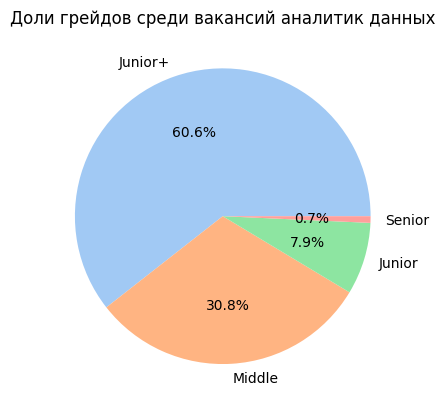

In [69]:
# Построение круговой диаграммы
colors = sns.color_palette('pastel')[ 0:5 ]

plt.pie(data_da_graid ['id'], labels = data_da_graid ['experience'],colors = colors, autopct='%1.1f%%')
plt.title('Доли грейдов среди вакансий аналитик данных')
plt.show()

Среди вакансий аналитиков данных, более полдовины составляют вакансии для junior +, далее идет вакансии для middle (около 30%). Доля вакансий для junior - чуть меньше 8%, для senior - меньше 1%.

In [70]:
# Группируем вакансии системных аналитиков по грейдам
data_sa_graid = data_sa.groupby('experience', as_index=False)['id'].count().sort_values(by='id',ascending=False)
data_sa_graid

,experience,id
2,Middle,933
1,Junior+,852
0,Junior,86
3,Senior,44


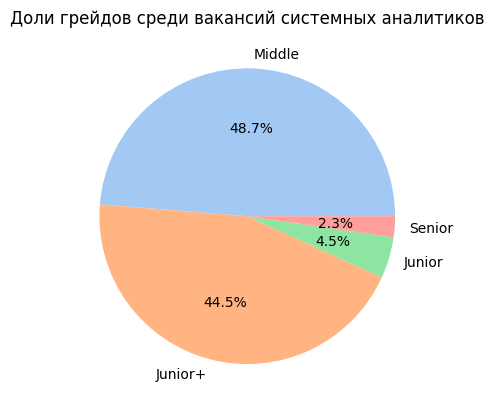

In [71]:
# Построение круговой диаграммы


plt.pie(data_sa_graid ['id'], labels = data_sa_graid ['experience'],colors = colors, autopct='%1.1f%%')
plt.title('Доли грейдов среди вакансий системных аналитиков')
plt.show()

Среди вакансий системных аналитиков, почти одинаковые доли для middle и junior+ (49  и 45 процентов соответственно). Доля вакансий junior - 4,5%, senior - чуть больше 2%.
Возможно для системных аналитиков не велика разница между junior+ И middle.
Низкая доля вакансий для senior что для ДА, что для СА, может говорить о том, что их ищут не через hh.ru, а другими путями.

## Определение типичного места работы для Аналитика данных и Системного аналитика по следующим параметрам: ТОП-работодателей, зарплата, тип занятости, график работы. Ответ отдельно дайте для грейдов Junior, Junior+, Middle, Senior.

In [72]:
# Функция для определения типичного места работы (построение графиков)
# Параметры функции: датафрейм и топ-n работодателей
def get_workplace (df,top):

  #def get_top (df, top):

    # Функция для получения срезов датасета по грейдам
  def get_df_graid(df):

    data_junior = df.query('experience == "Junior"')
    data_junior_plus = df.query('experience == "Junior+"')
    data_middle = df.query('experience == "Middle"')
    data_senior = df.query('experience == "Senior"')
    return data_junior, data_junior_plus, data_middle, data_senior

  # Получаем таблицы для каждого грейда
  data_junior, data_junior_plus, data_middle, data_senior = get_df_graid(df)

  i=0
  for graid in [data_junior, data_junior_plus, data_middle, data_senior]:

  # топ n
    data_employer_top = graid.pivot_table(index='employer', values='id', aggfunc='count').sort_values(by='id', ascending = False).head(top)

  # Группировка данных по типам занятости
    data_employment = graid.groupby('employment')['id'].count().sort_values(ascending=False)

  # Группировка данных по предлагаемому графику работы
    data_schedule = graid.groupby('schedule')['id'].count().sort_values(ascending=False)


  # Группировка данных по категориям заработной платы
    data_salary_bin = graid.groupby('salary_bin')['id'].count().sort_values(ascending=False)


  # задаём сетку отрисовки графиков
    fig = plt.figure(figsize=(25, 15))
  # Задаем подписи к группам графиков
    if i==0:
      fig.suptitle('Junior', fontsize=30)
    elif i==1:
      fig.suptitle('Junior+', fontsize=30)
    elif i==2:
      fig.suptitle('Middle', fontsize=30)
    elif i==3:
      fig.suptitle('Senior', fontsize=30)
    i=i+1

  # первый график

    ax1 = plt.subplot(2, 2, 1)
    data_employer_top.sort_values(by='id', ascending = True).plot(kind='barh', grid=True, ax=ax1, legend=False, colormap='Dark2')

    plt.xlabel('Количество вакансий')
    ax1.set_ylabel('Наименование работодателя')
    plt.title('Топ работодателей')

  # второй график
    ax2 = plt.subplot(2, 2, 2)

    data_employment.plot(kind='pie', label='', colors = colors, ax=ax2, radius=1.25, autopct=lambda p: format(p, '1.1f')+'%' if p > 0.5 else None)
    plt.title('Тип занятости')

  # третий график
    ax3 = plt.subplot(2, 2, 3)

    data_schedule.plot(kind='pie', label='', autopct='%1.1f%%', colors = colors, ax=ax3, radius=1.25)

    plt.title('График работы')


  # четвёртый график

    ax4 = plt.subplot(2, 2, 4)

    data_salary_bin.plot(kind='pie', label='', autopct='%1.1f%%', colors = colors, ax=ax4, radius=1.25)

    plt.title('Заработная плата')
    plt.tight_layout()

    plt.show()
    print('\n\n')



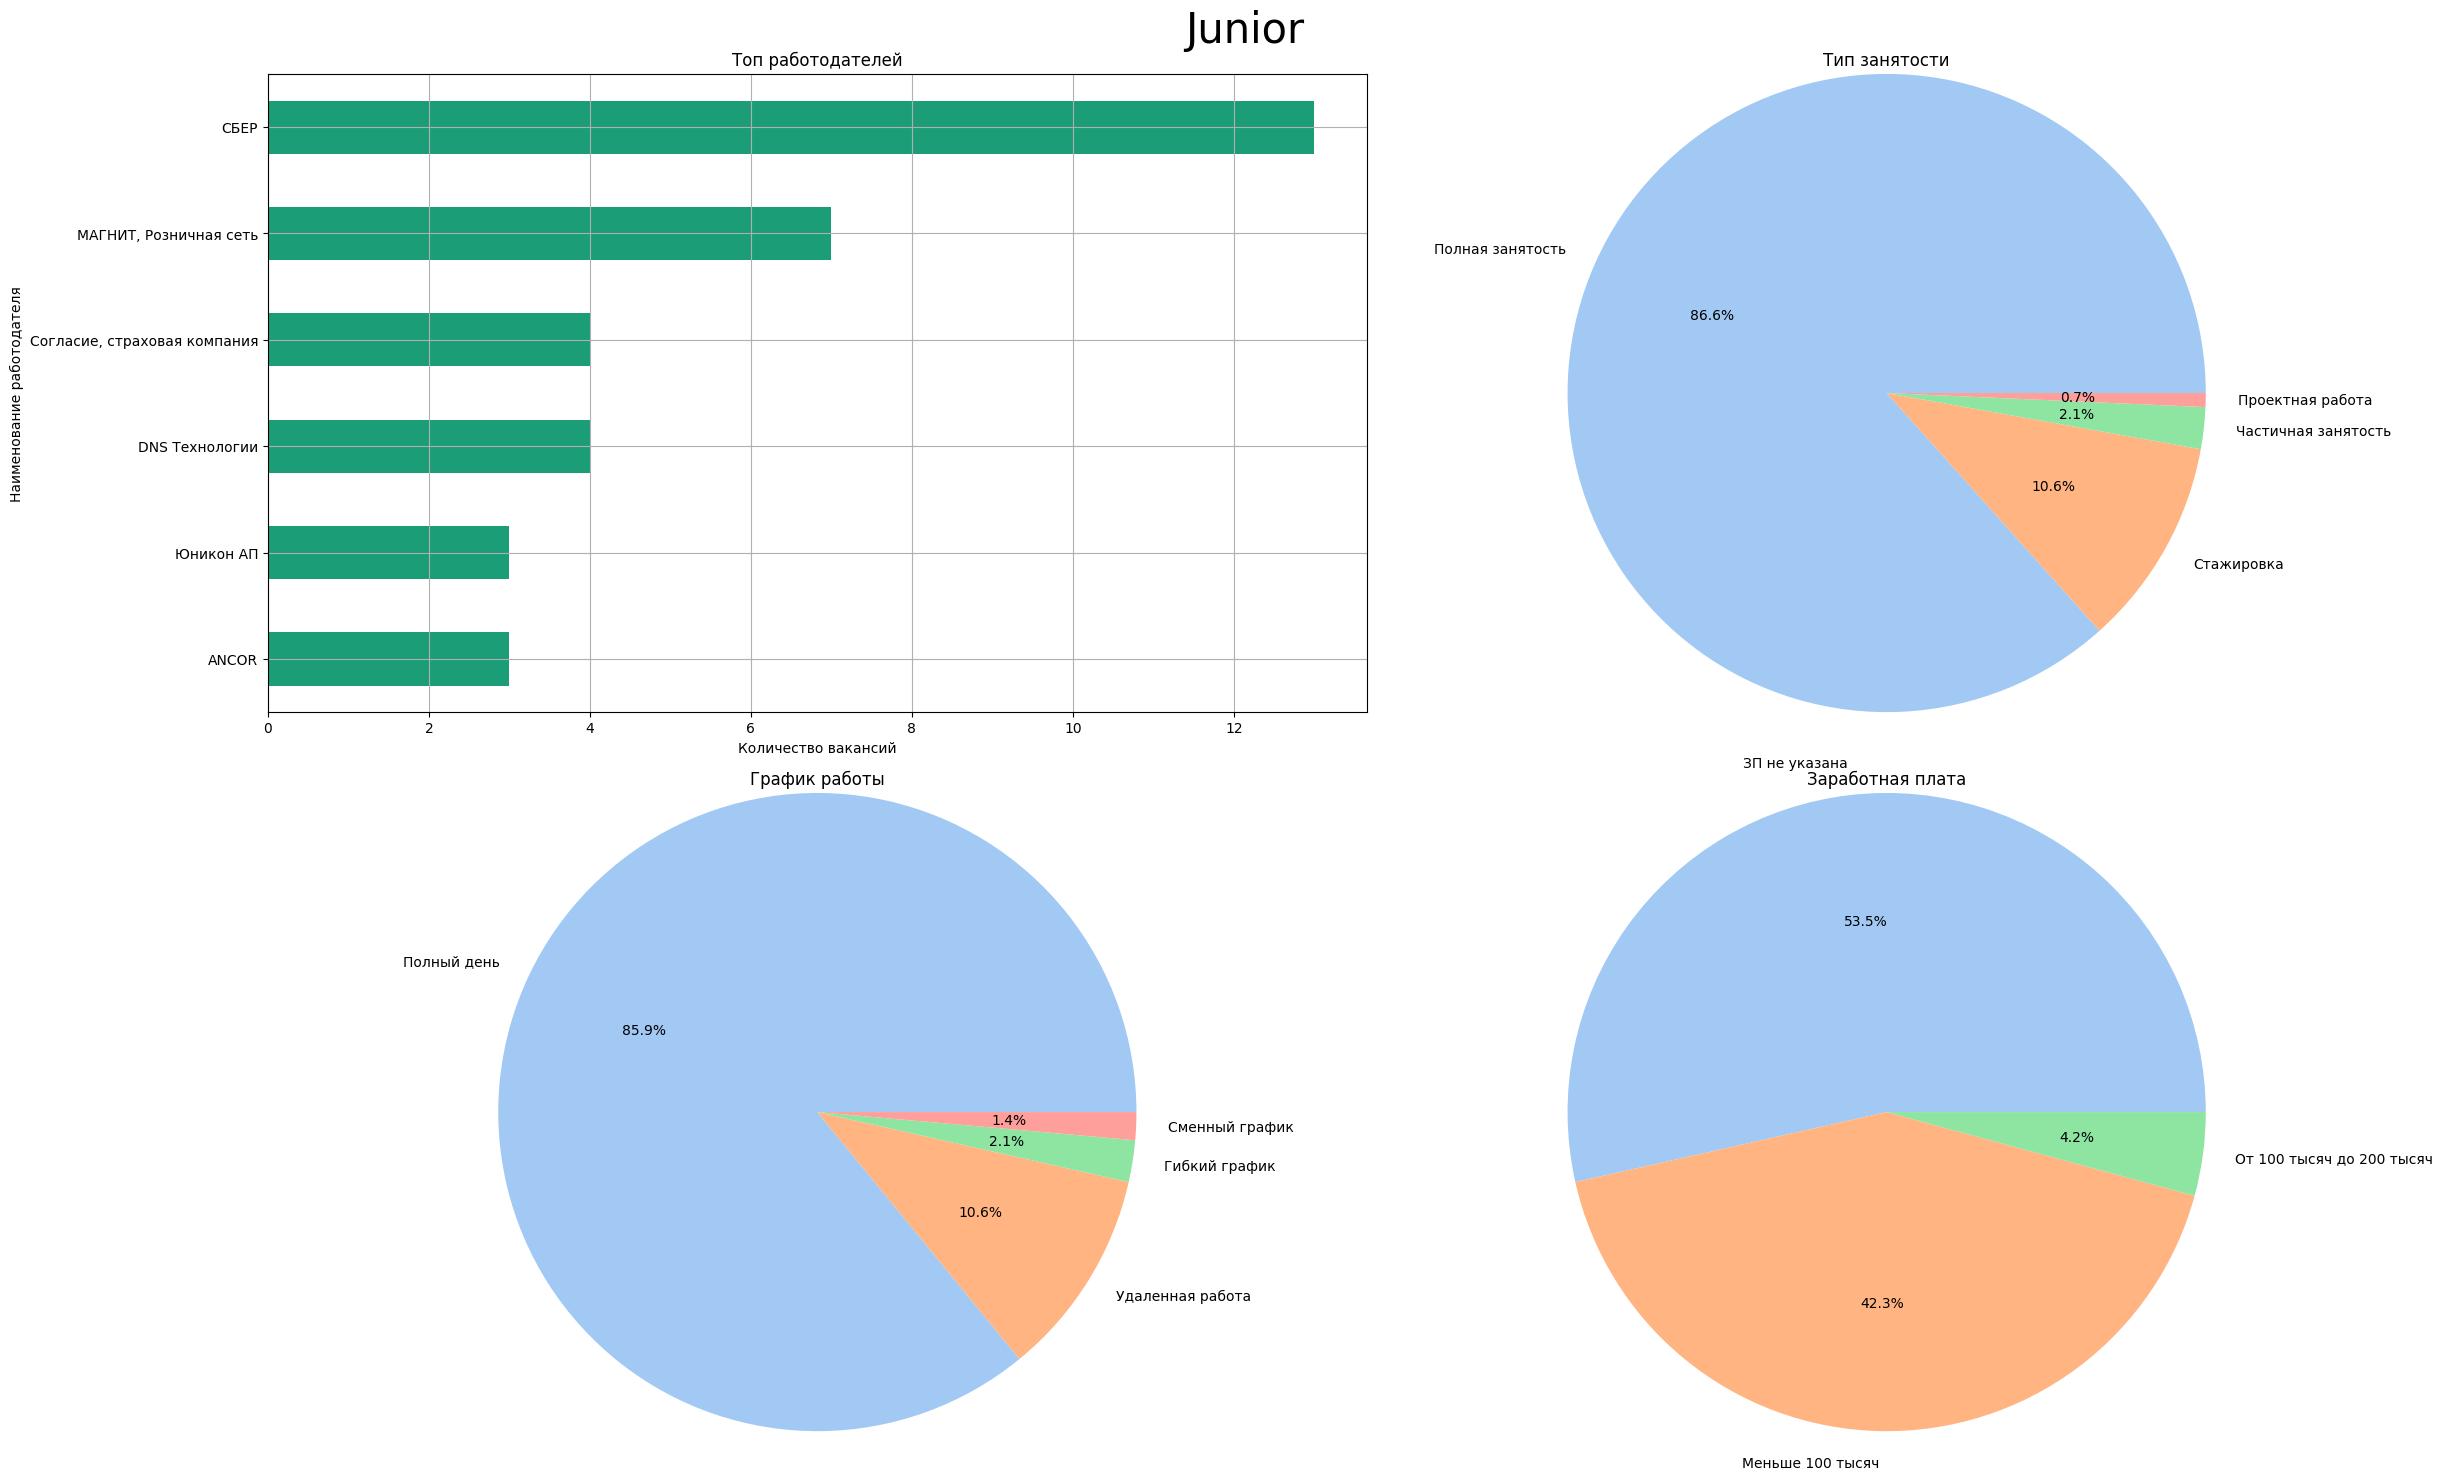

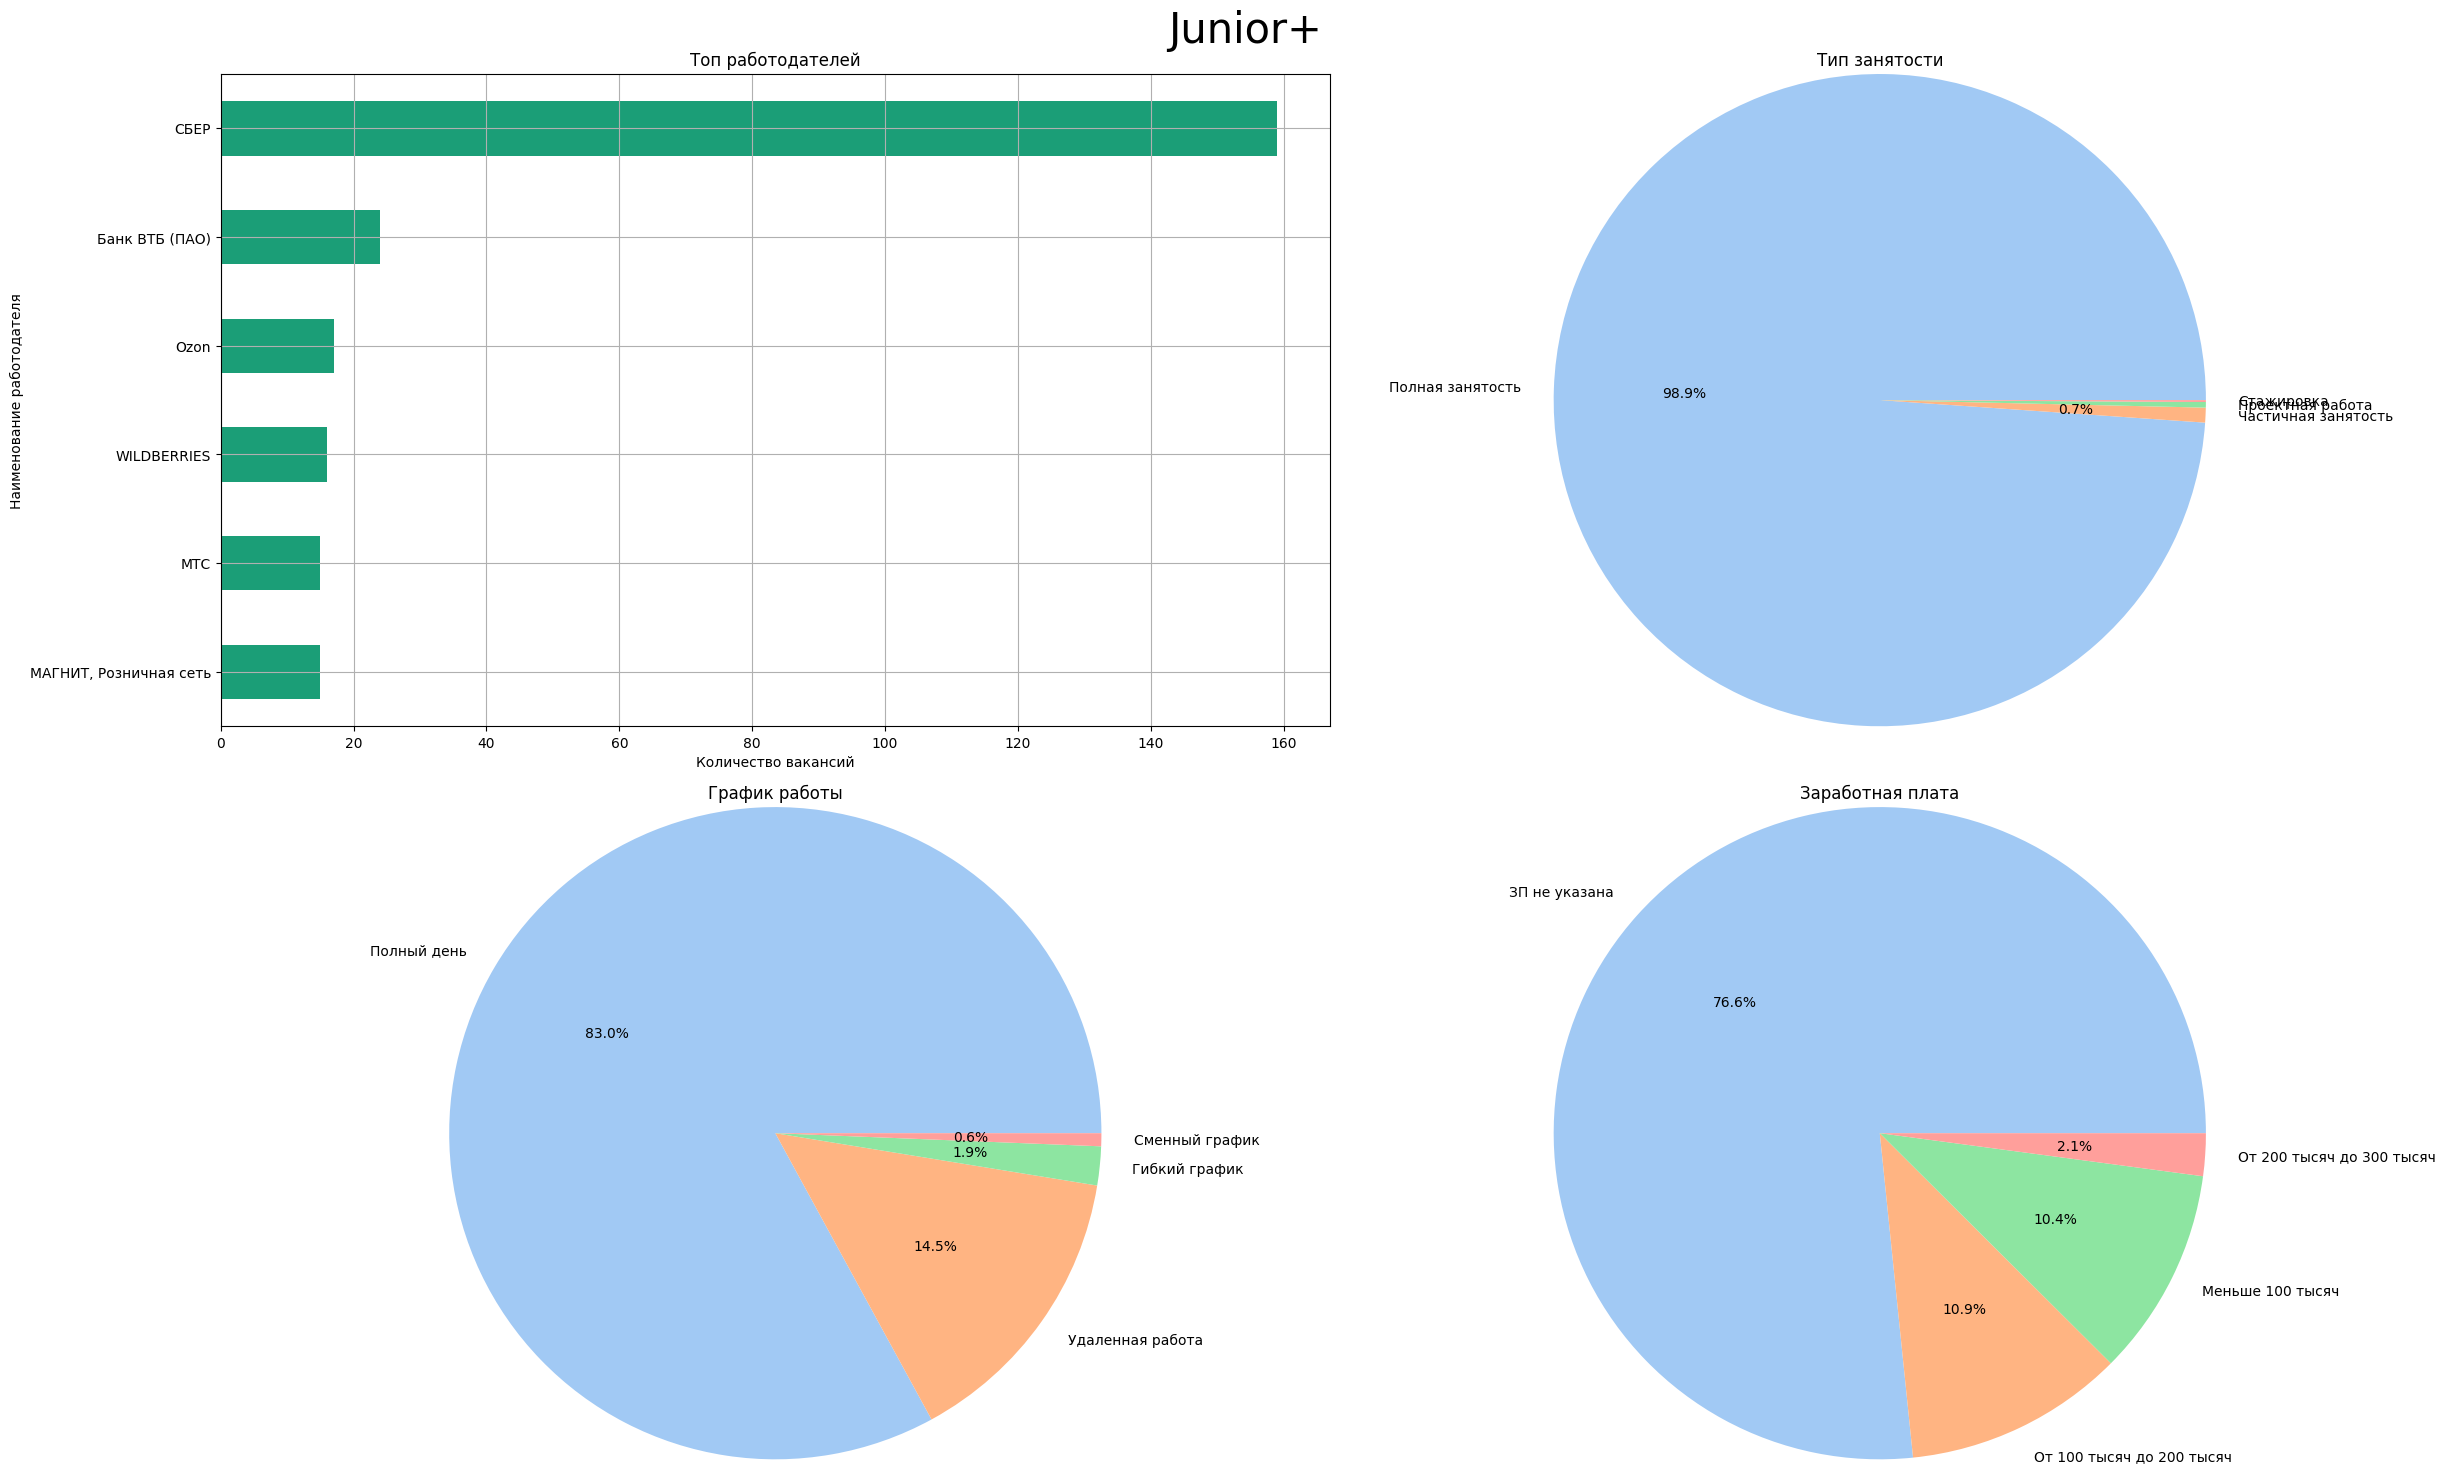

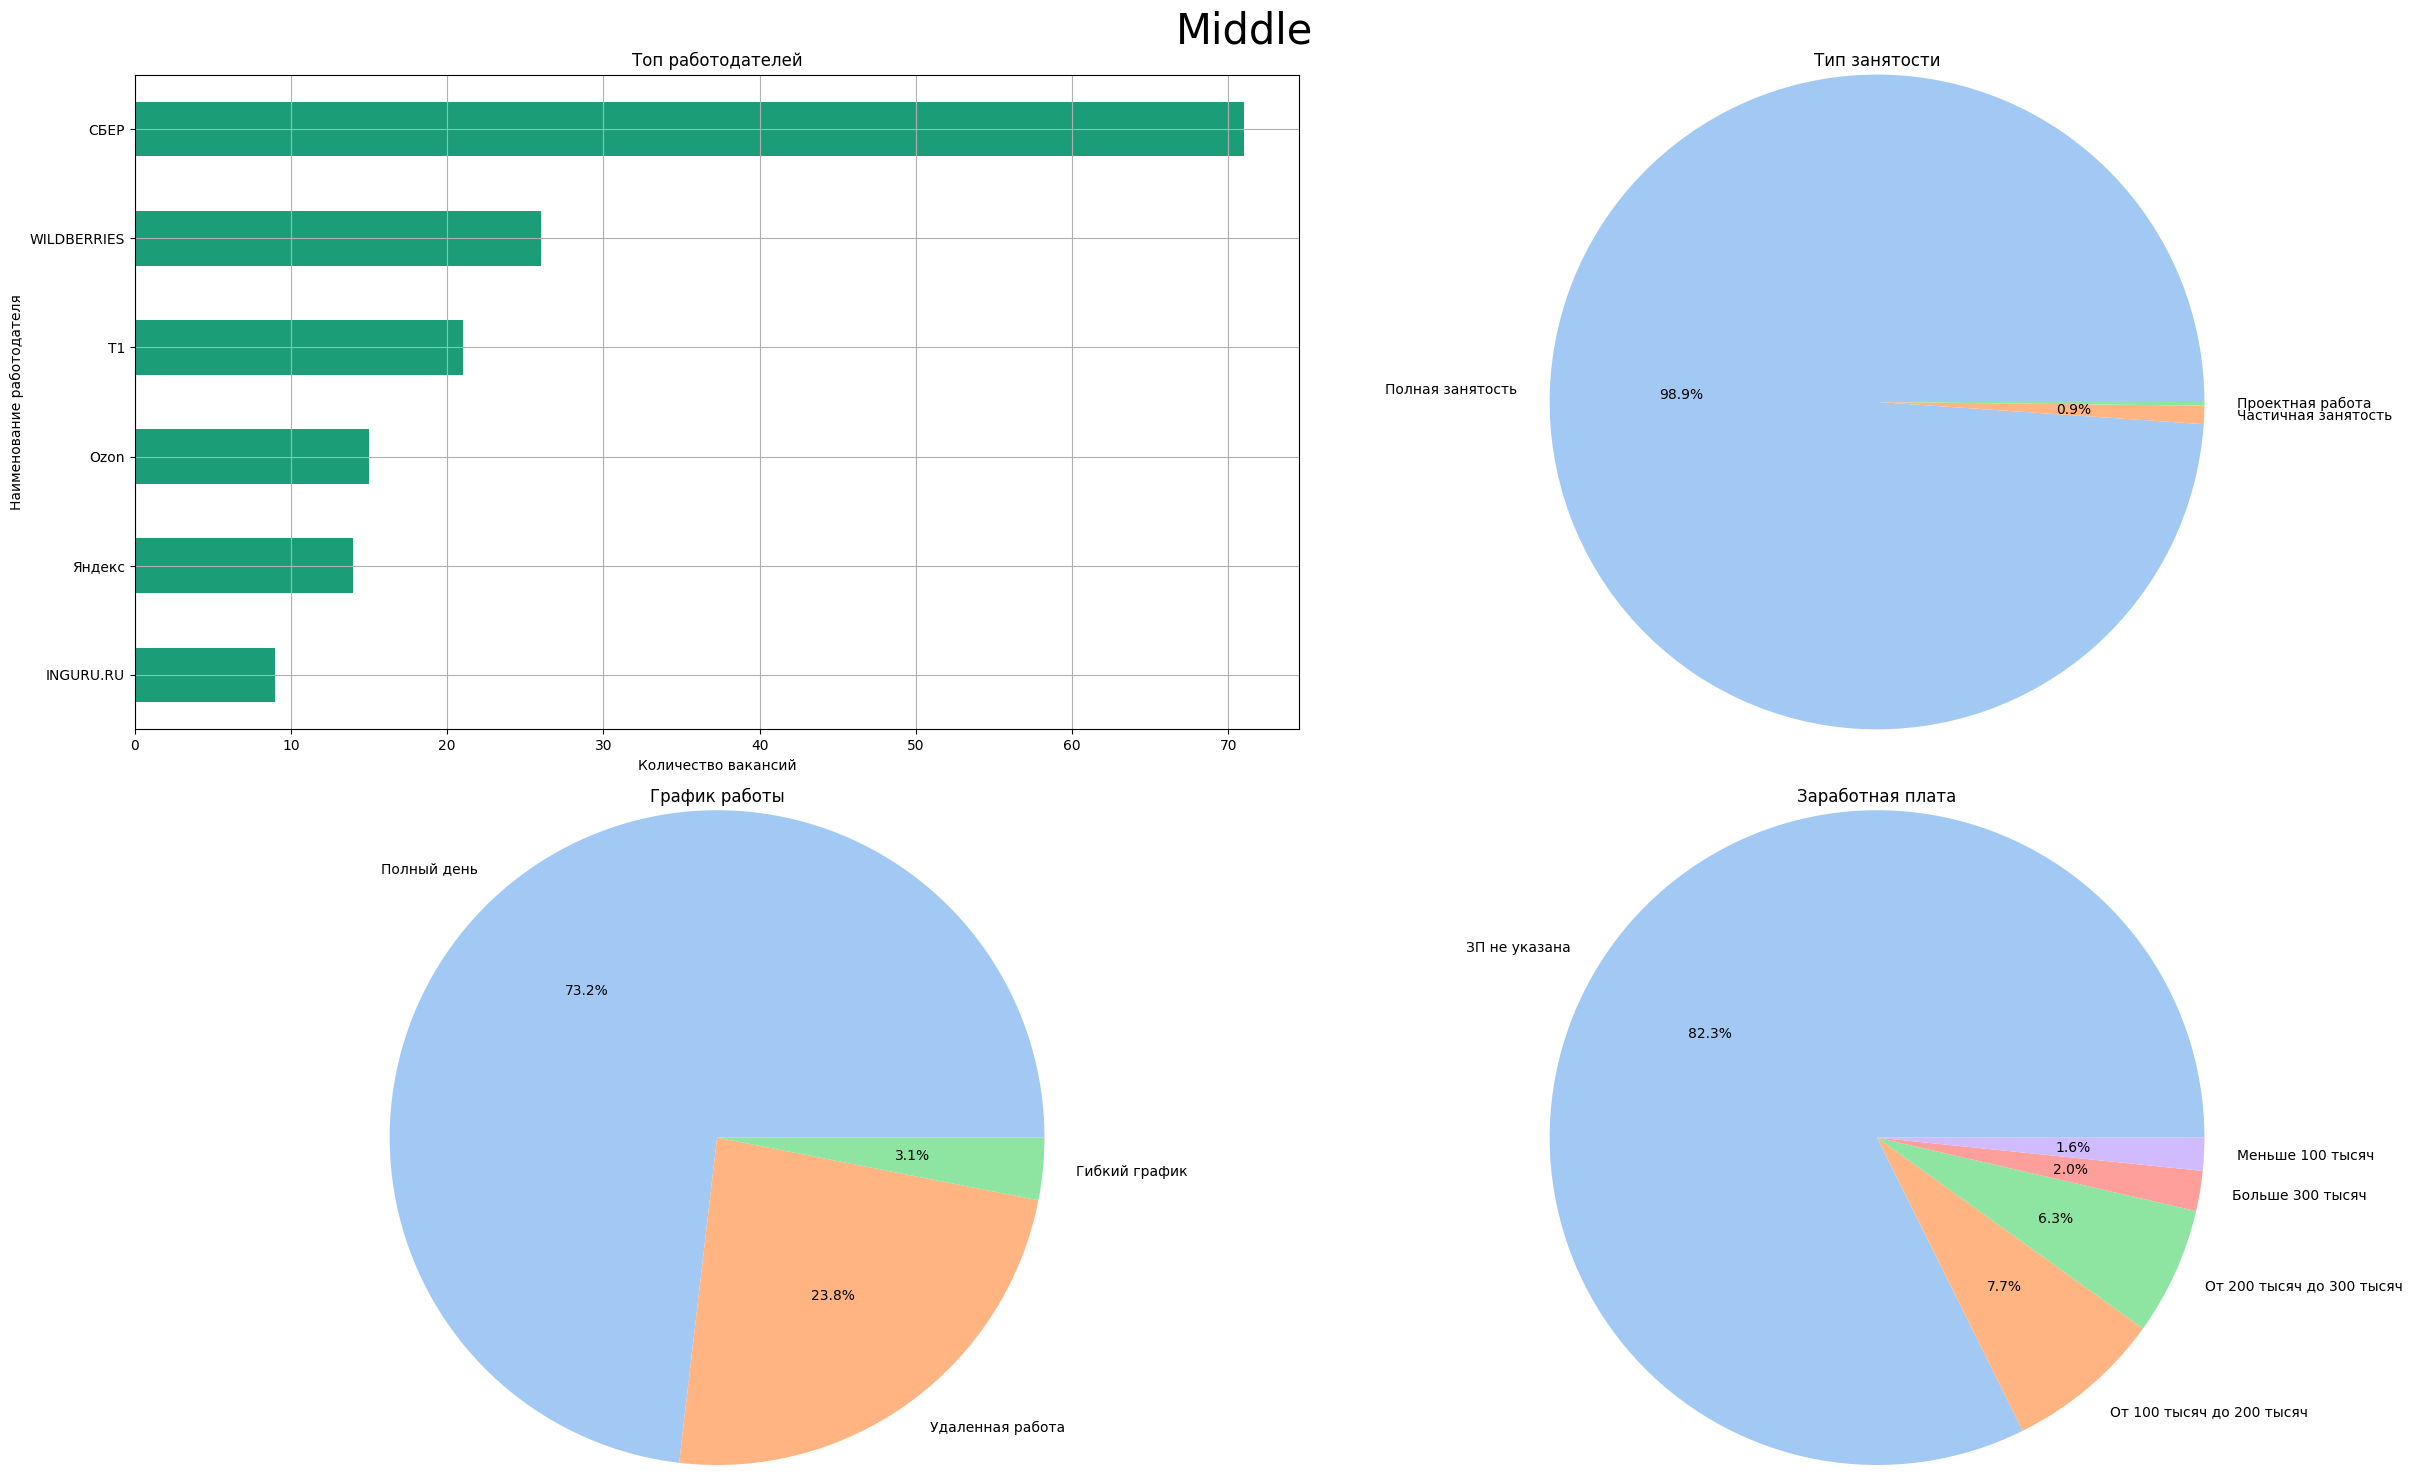

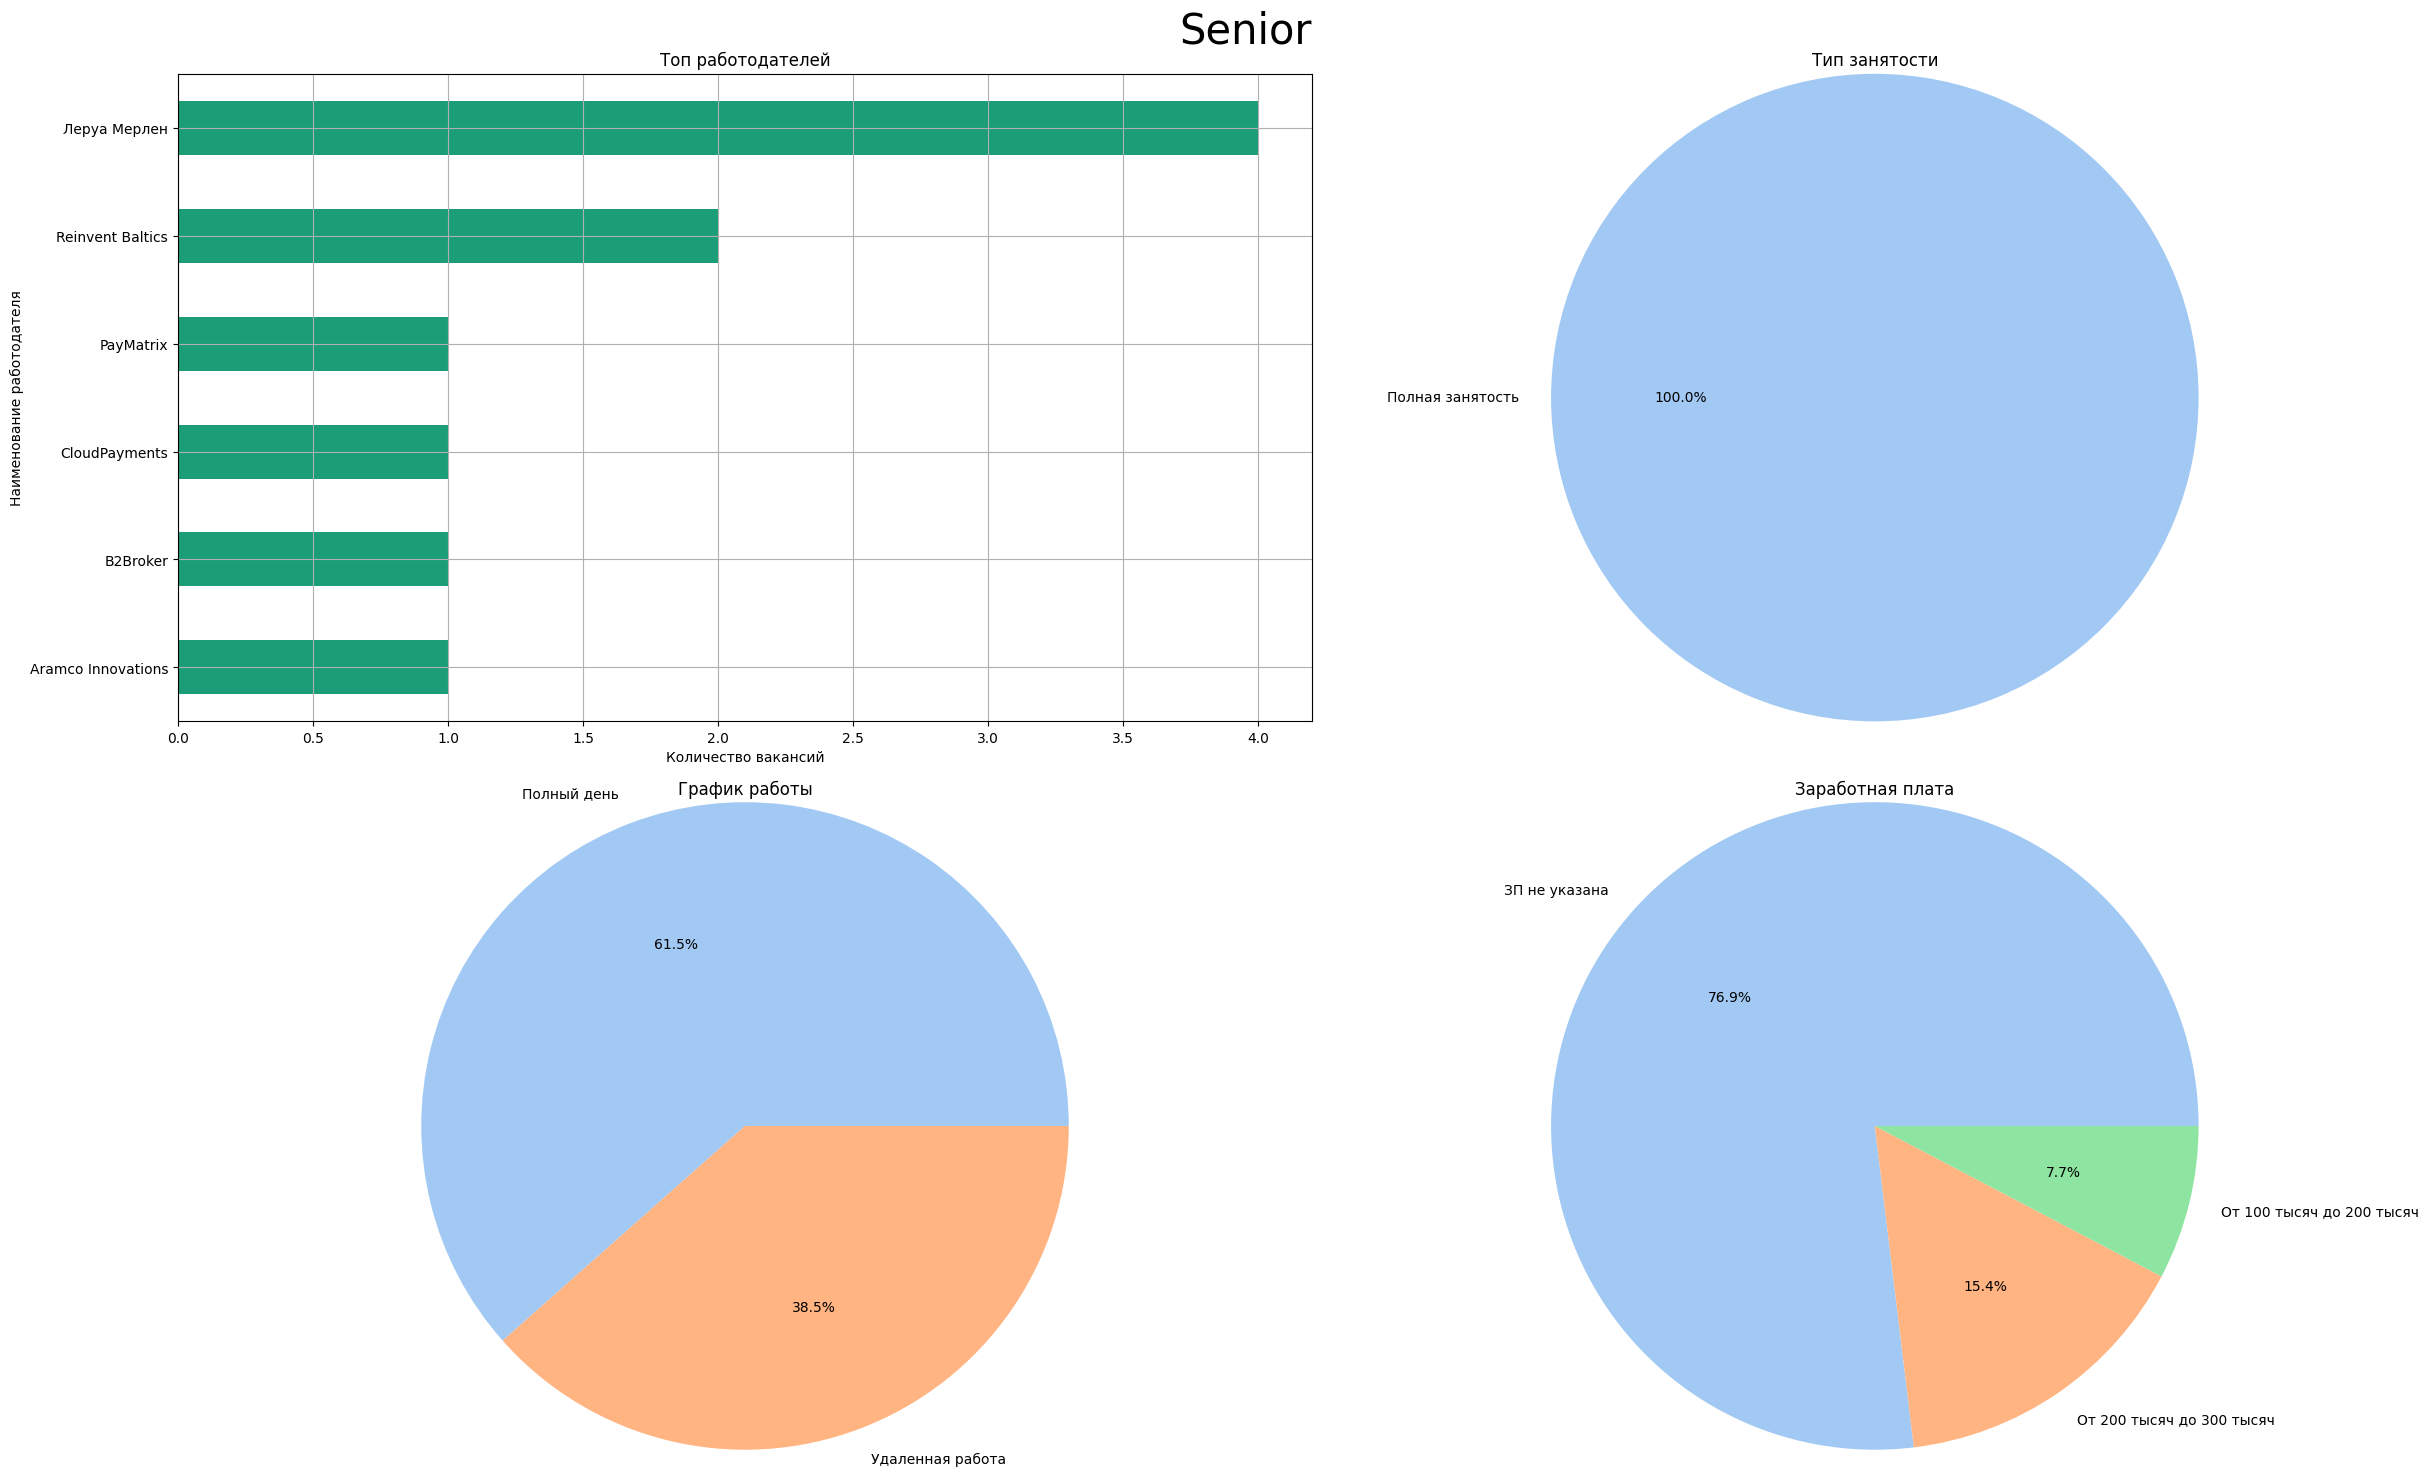

In [73]:
# Типичное место работы для аналитика данных в разрезе грейдов
get_workplace (data_da, 6)

Типичное место работы для junior ДА - Сбер, на полную занятость, полный день, с з/п меньше 100тыс.

Типичное место работы для junior+ Да - Сбер, полная занятость, полный день, з/п меньше 200 тыс.

Типичное место работы для  middle ДА - Сбер , полная занятость, полный день, з/п от 100 до 200, возможно 300 тыс.

Типичное место работы для senior ДА, если можно говорить о типичности на основе 13 вакансий, - Леруа Мерлен, полная занятость, полный день,  з/п от 200 до 300тыс.

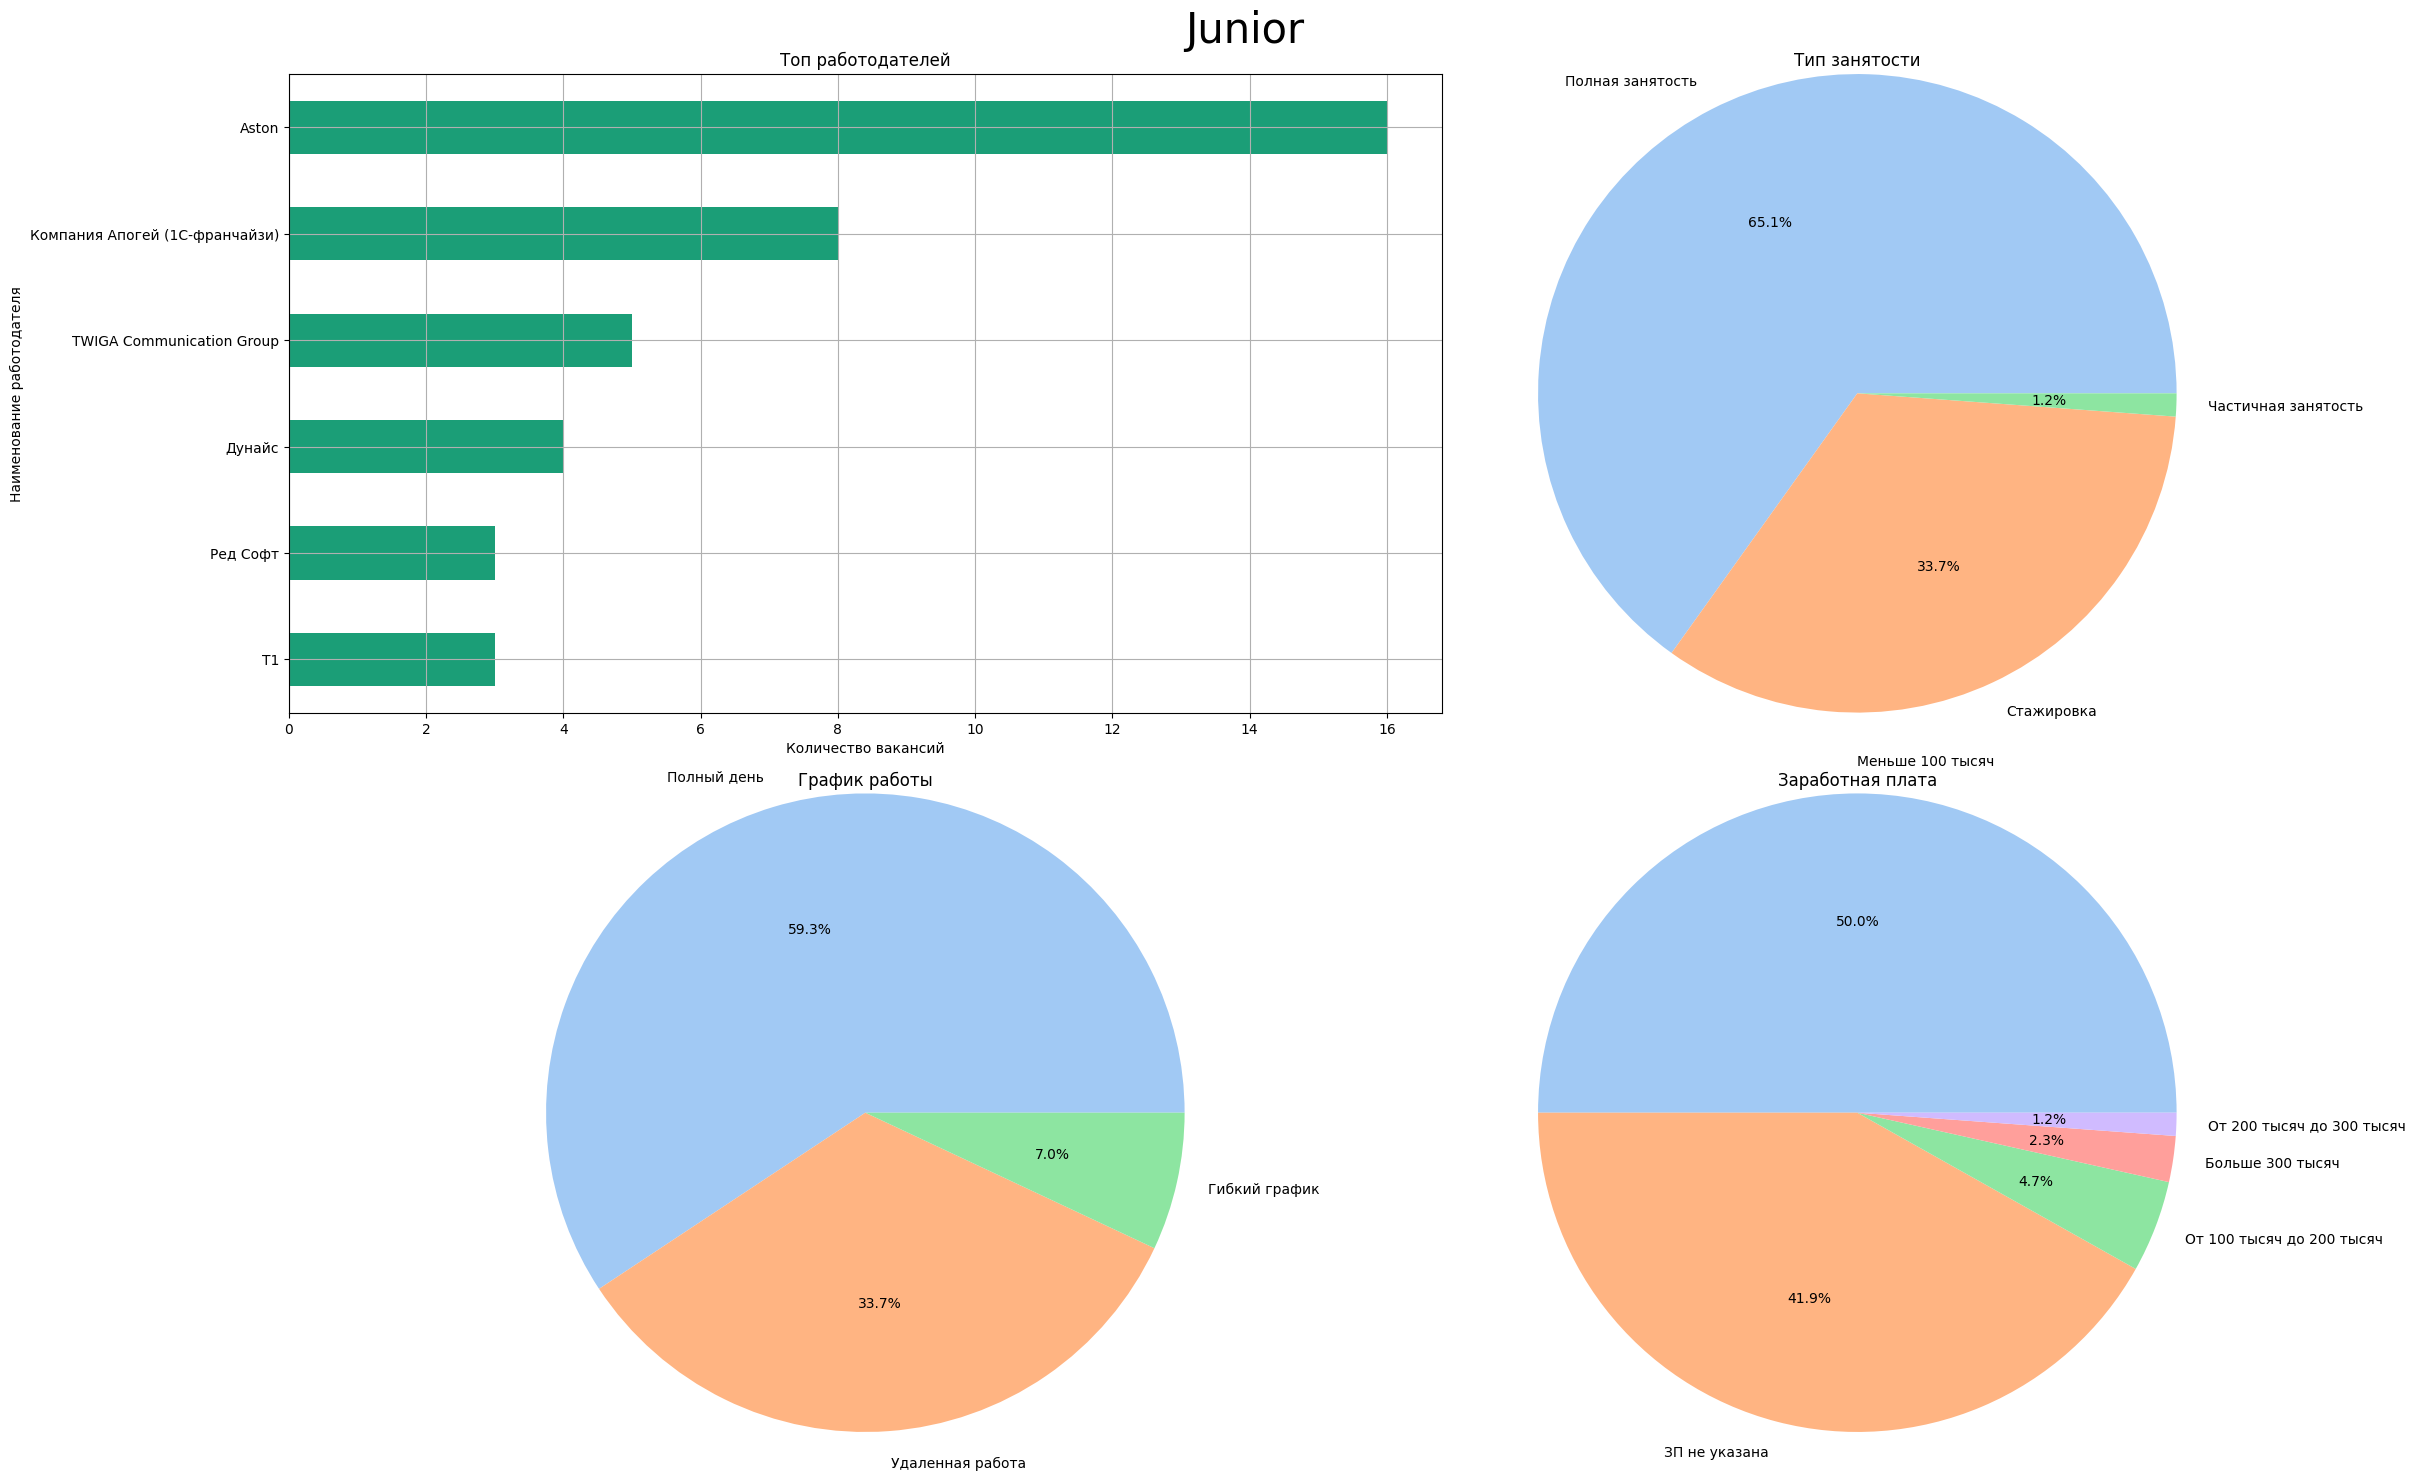

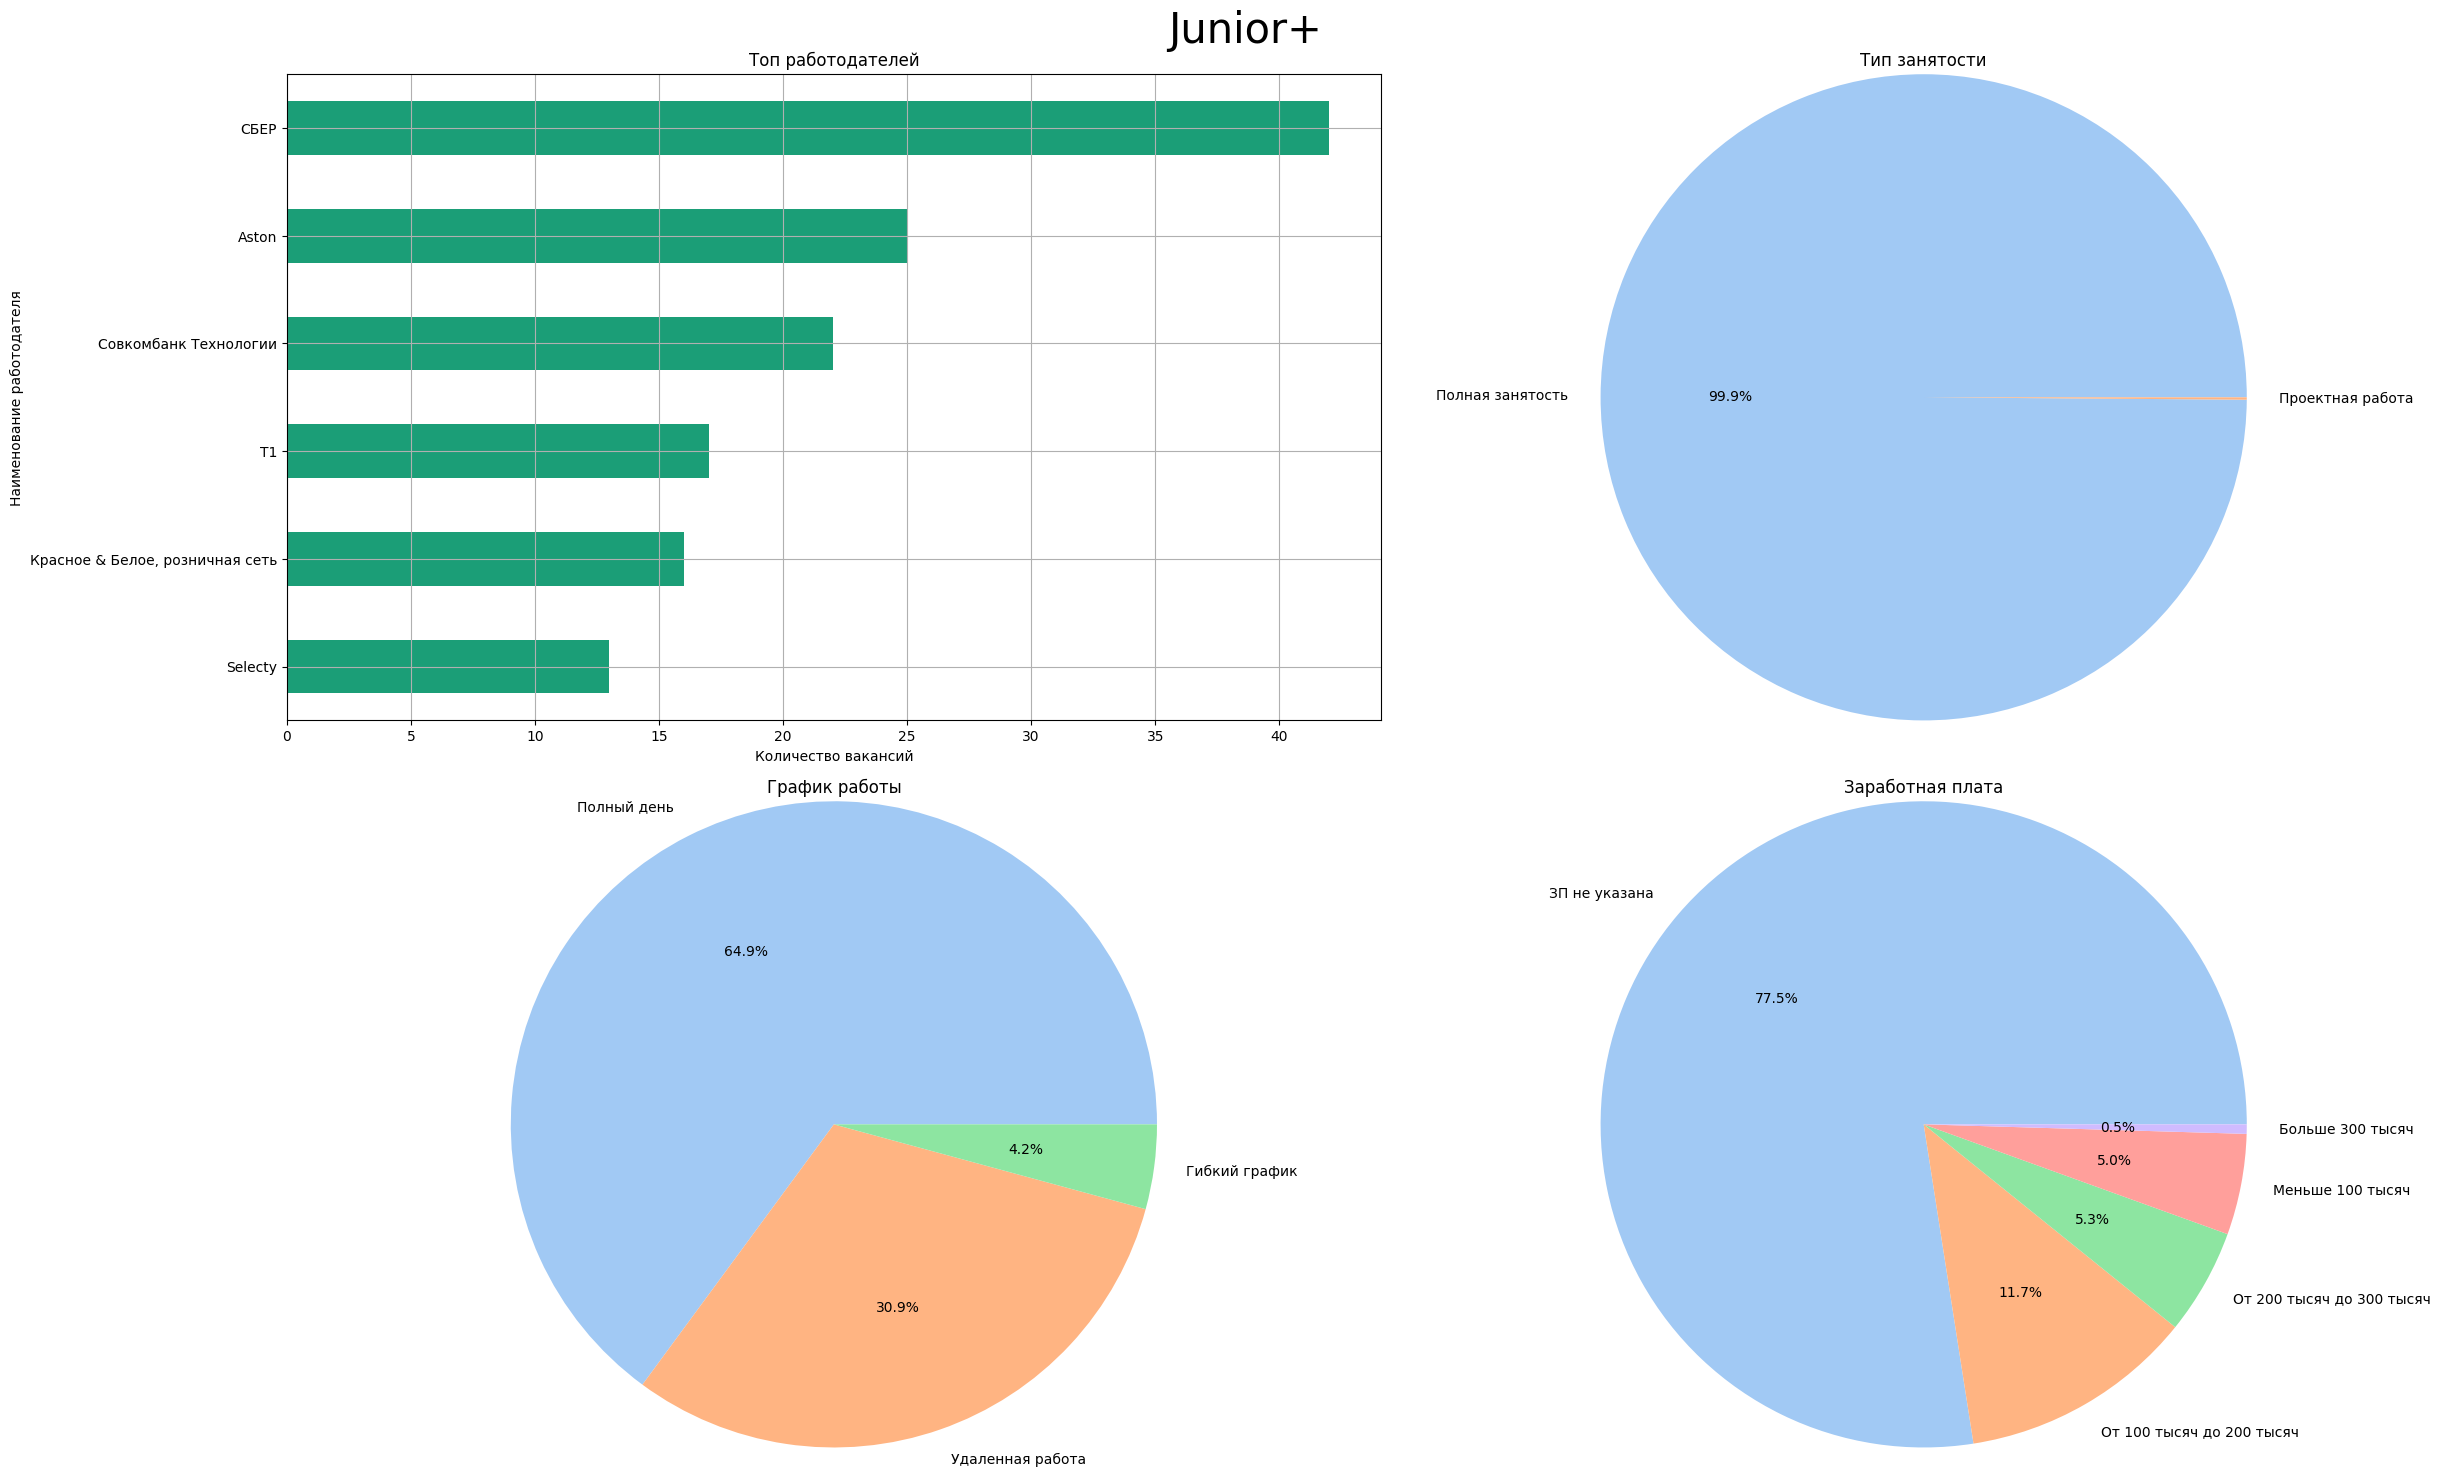

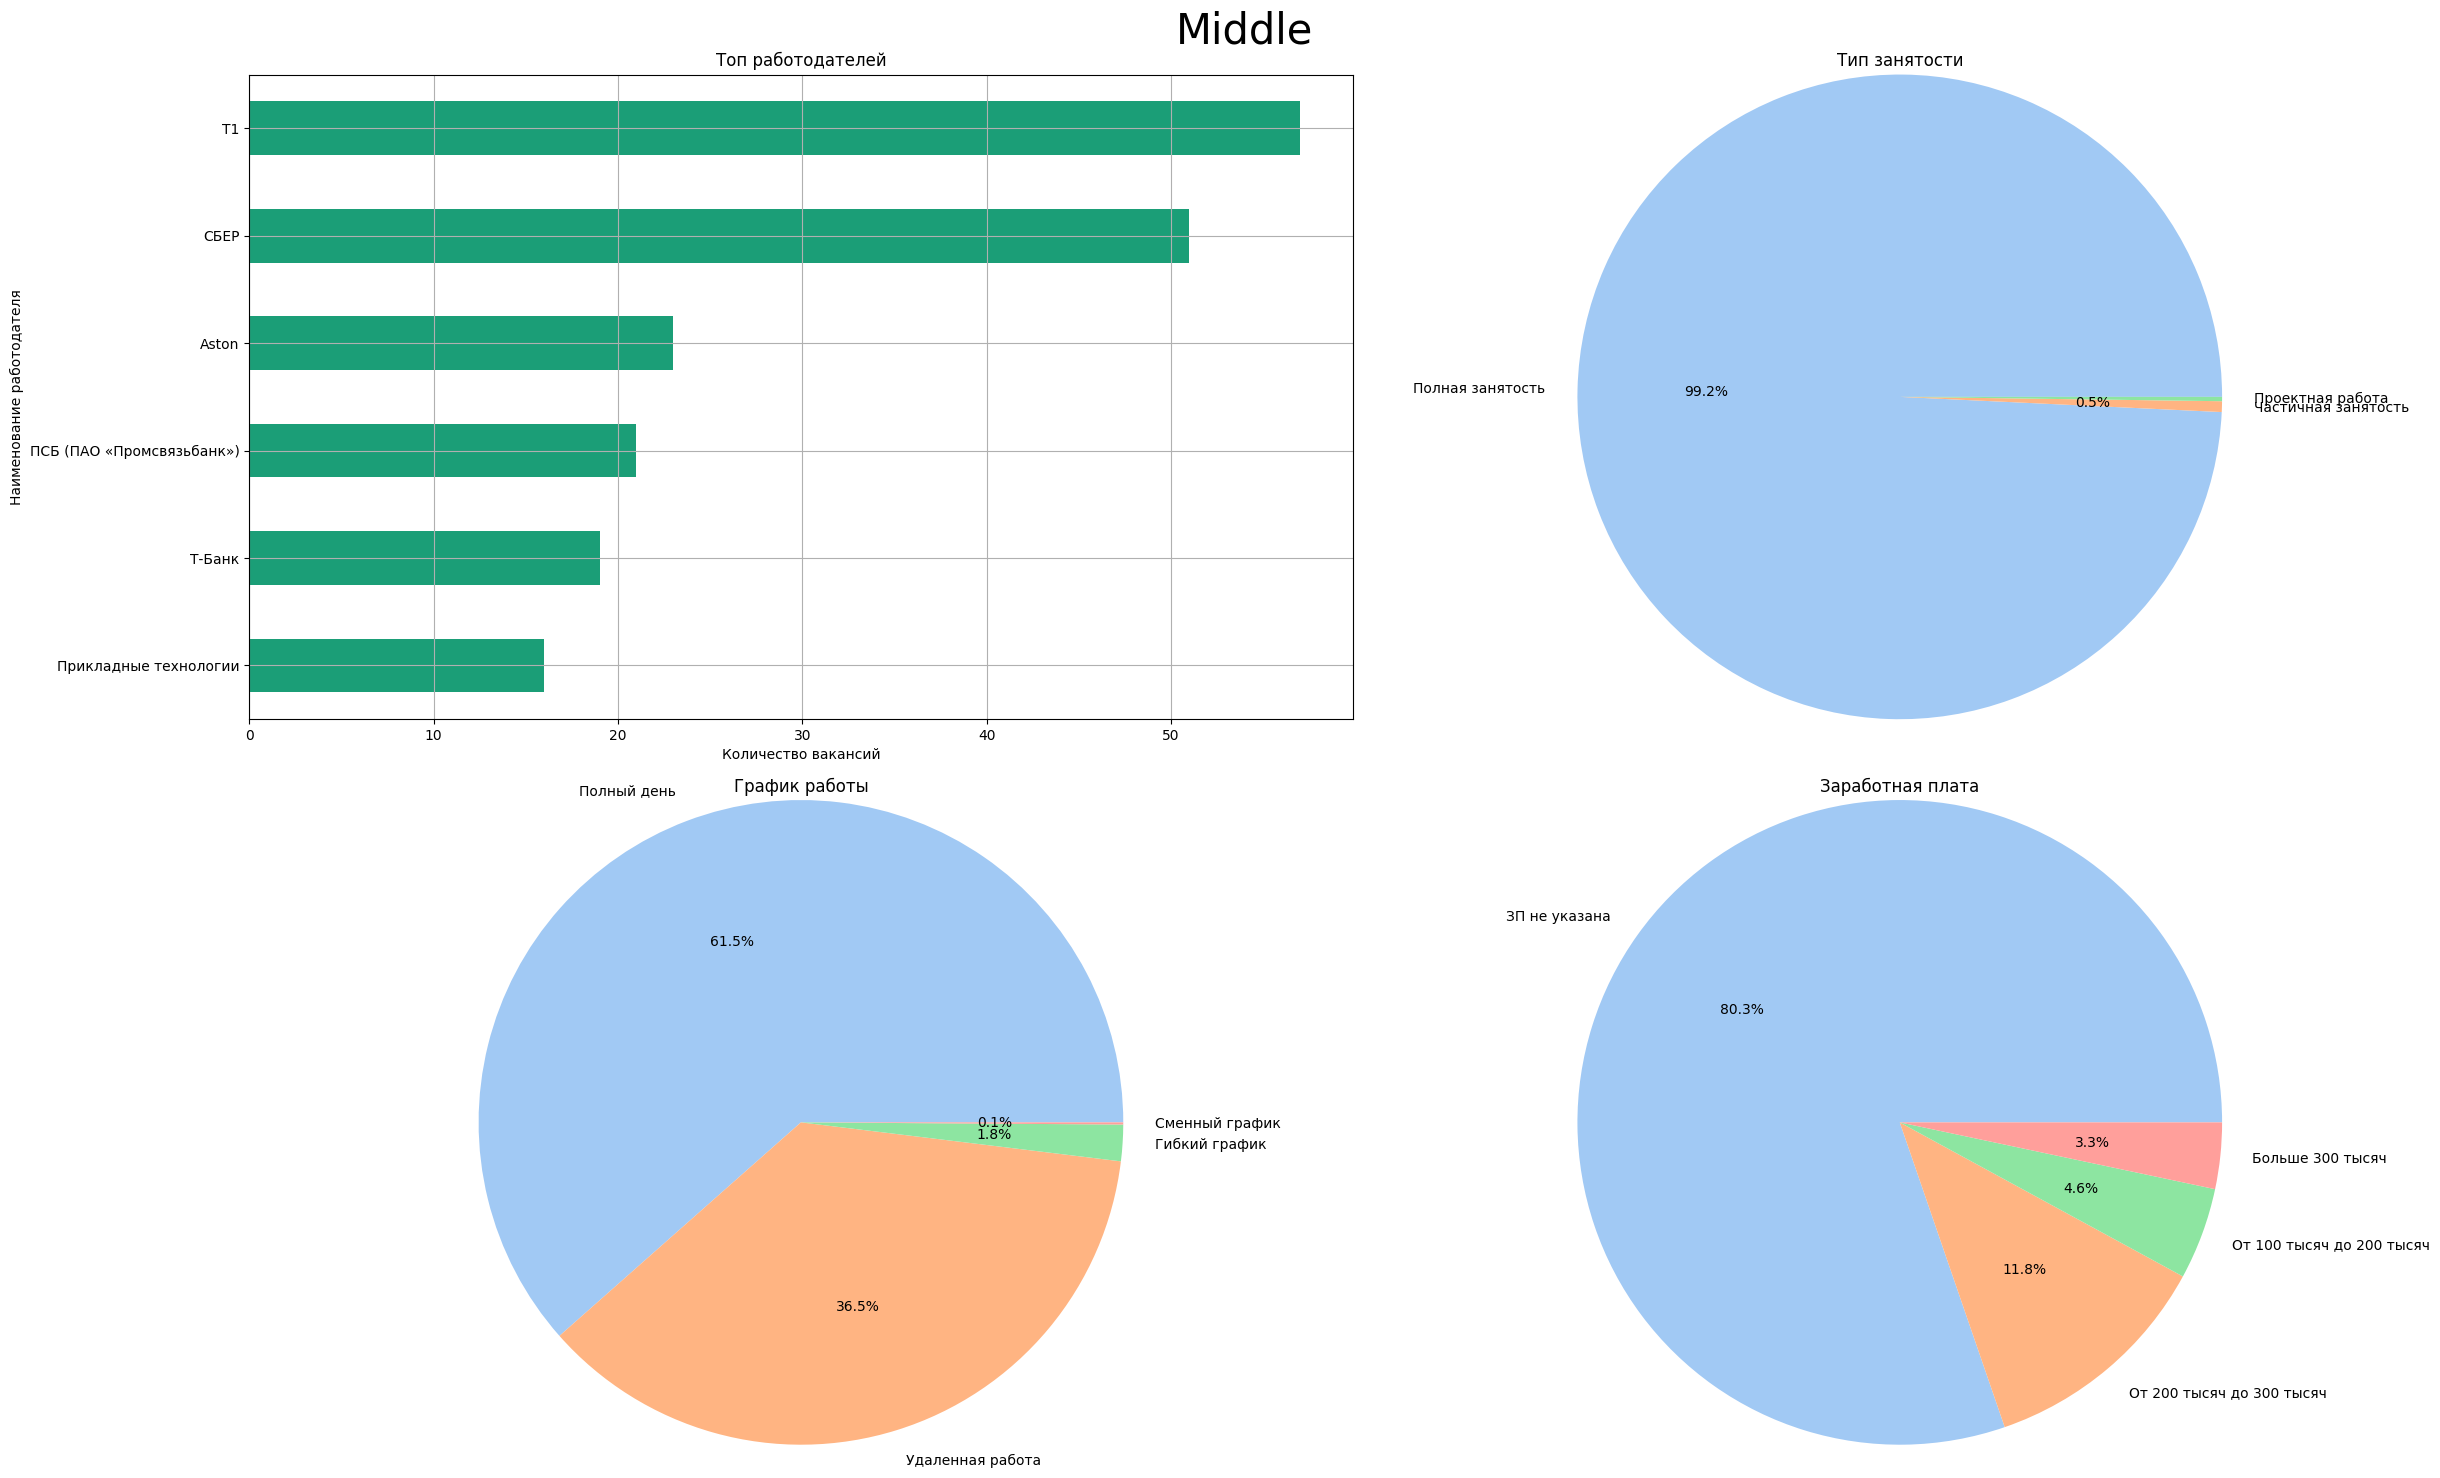

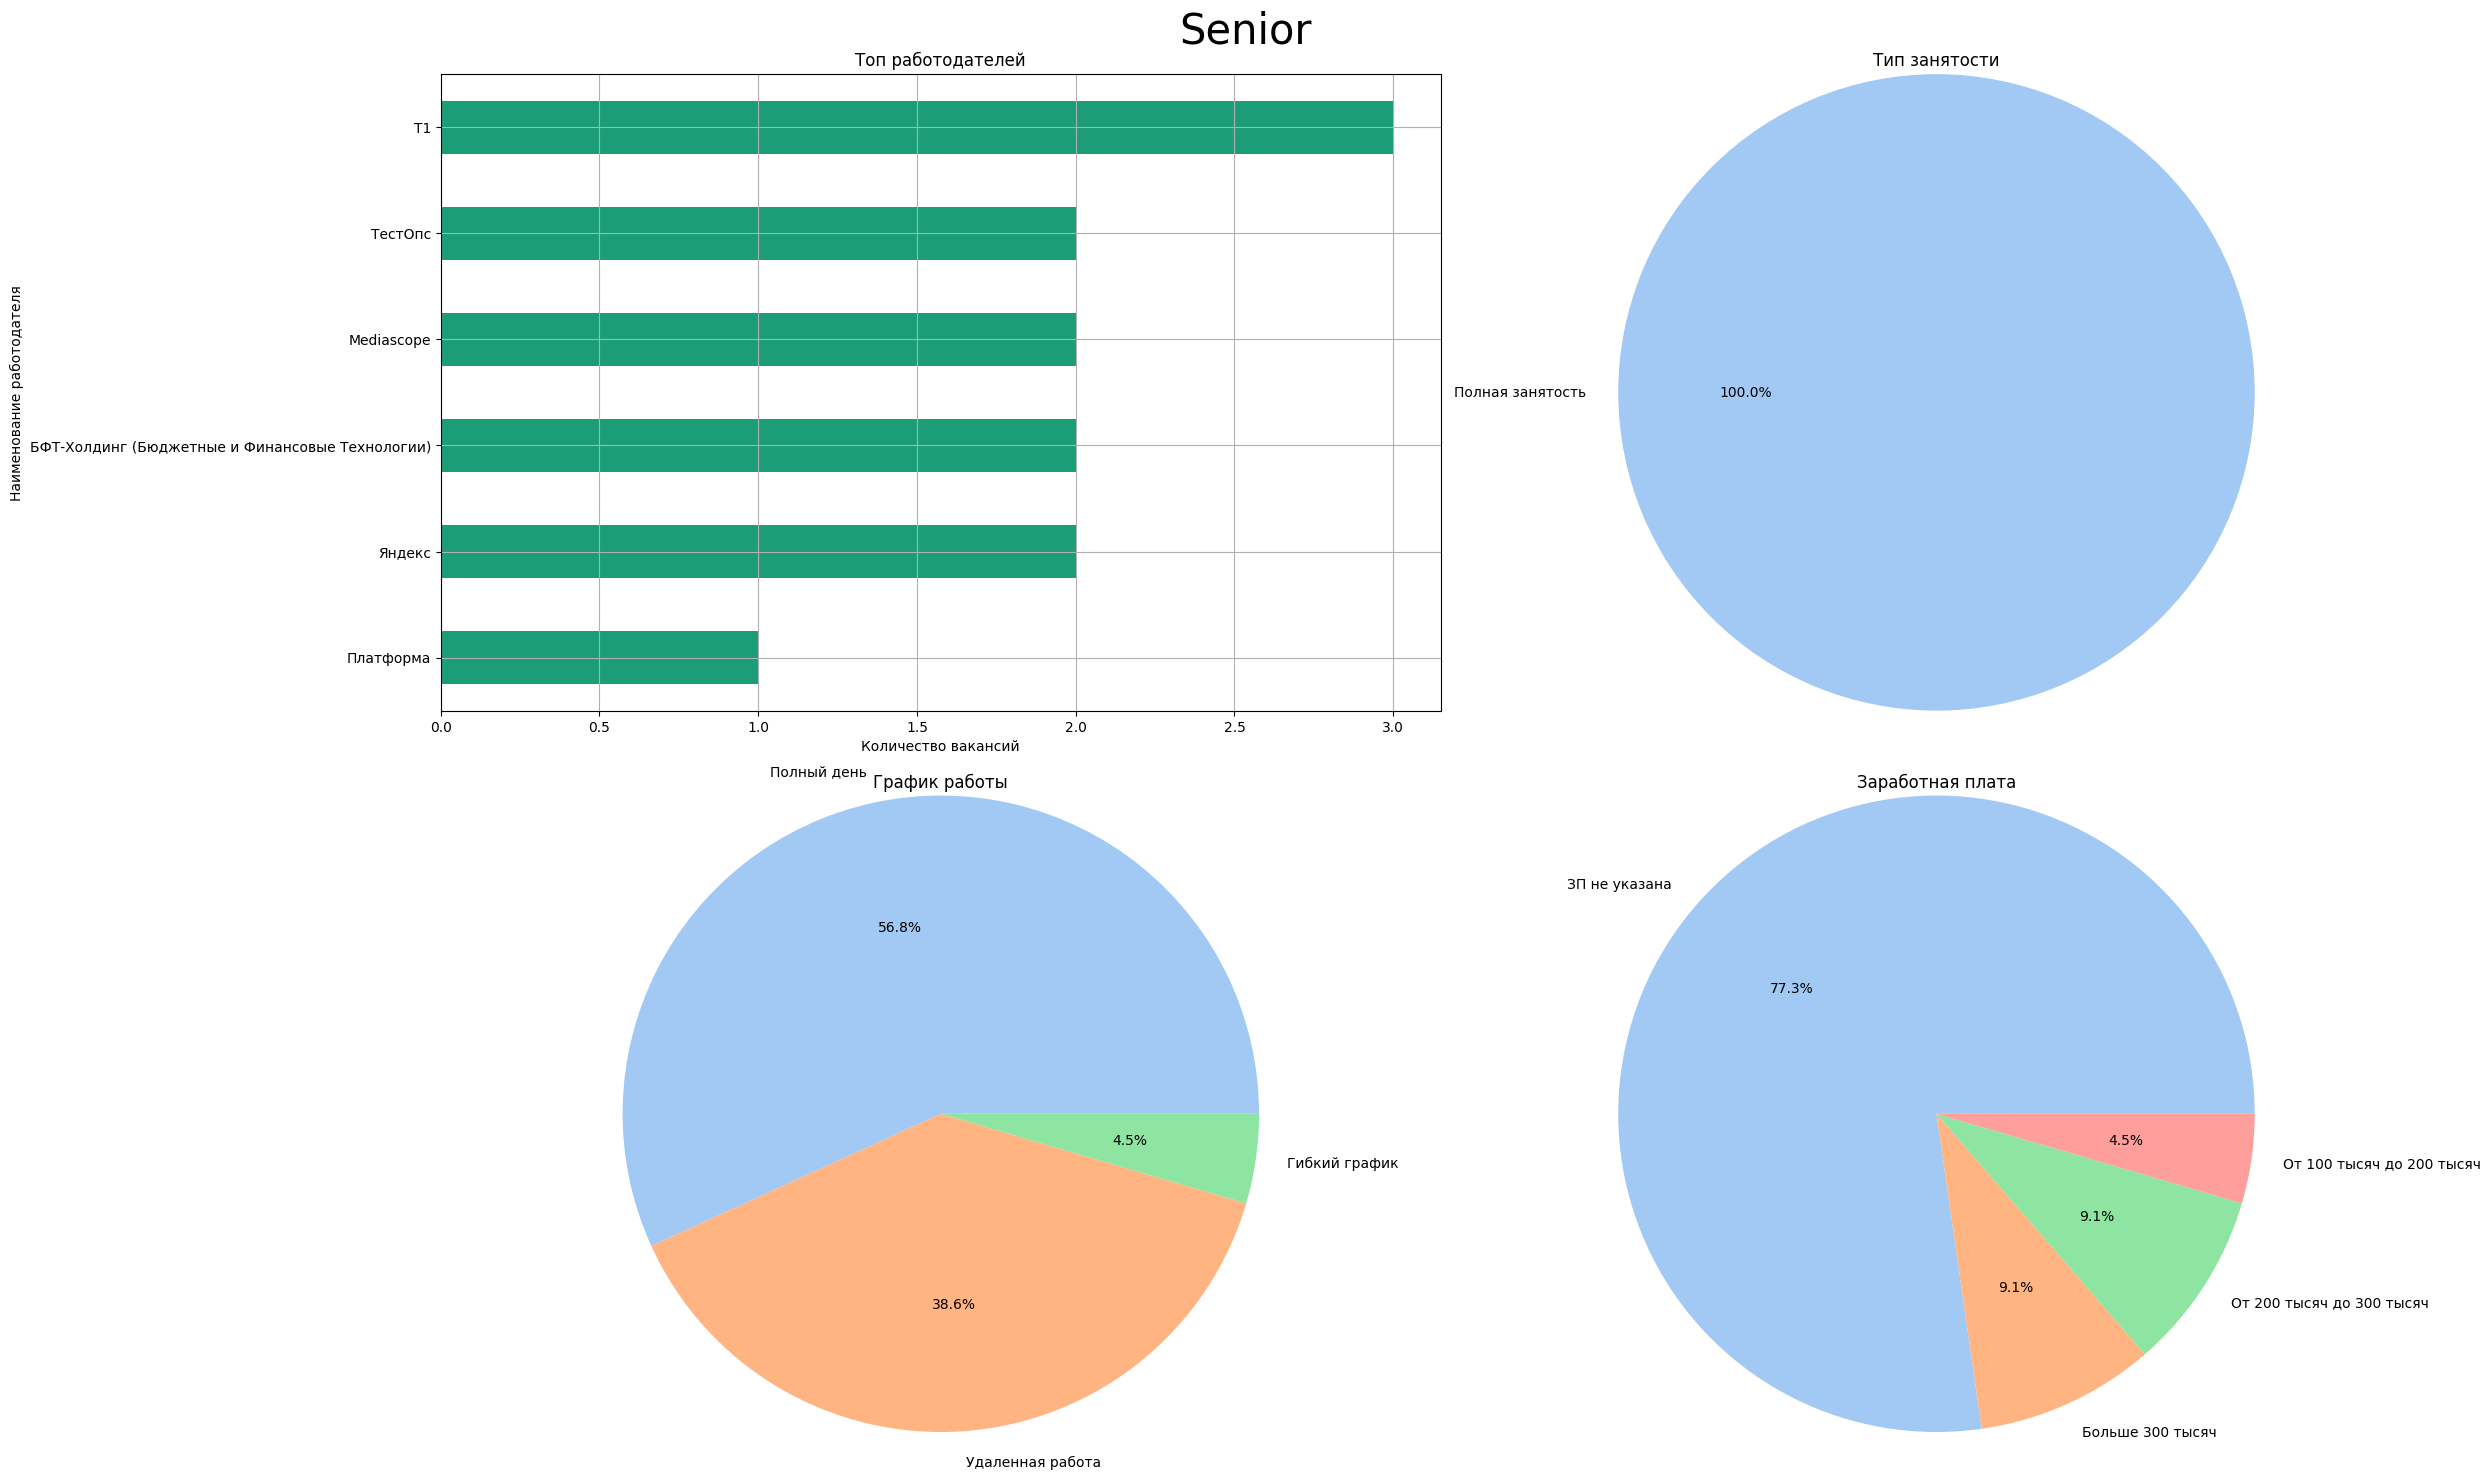

In [74]:
# Типичное место работы для системного аналитика в разрезе грейдов
get_workplace (data_sa, 6)



Типичное место работы для junior СА - Aston, полная занятость, полный день, з/п меньше 100 тыс.

Типичное место работы для Junior+ СА - Сбер, полная занятость, полный день, з/п от 100 до 200 тыс.

Типичное место работы для middle СА - Т1 или Сбер, полная занятость, полный день, з/п до 300 тыс.

Типичное место работы senior СА - Т1, полная занятость, полный день, с з/п от 200 тыс и выше.

Больше всего вакансий для аналитиков данных от junior до middle предлагает Сбер. По Senior сложно сделать вывод, т.к. по ним вакансий очень мало, в основном единичные вакансии от разных работодателей.
Для системных аналитиков junior больше всего вакансий предлагает Aston. Для других грейдов в топы выходят Т1 и Сбер.

Для всех грейдов и аналитиков данных, и системных аналитиков большинство вакансий на полную занятость и полный день.

В большей части вакансий, независимо от грейдов, не указана заработная плата. Среди тех вакансий, где заработная плата указана, прослеживается тенденция к ее увеличению по мере увеличения грейда, что для аналитиков данных, что для системных аналитиков.


## Топ скилс

### Определение,  какие навыки спрашивают чаще - твердые или мягкие. Определение наиболее желаемых кандидатов на вакансии Аналитик данных и  системный аналитик по следующим параметрам: самые важные hard-skils, самые важные soft-skils в разрезе грейдов Junior, Junior+, Middle, Senior.



#### Hard и soft скилы для аналитиков данных

In [75]:
data_da_for_pivot_skills = data_da
data_da_for_pivot_skills['key_skills'] = data_da_for_pivot_skills['key_skills'].str.split(', ')
data_da_for_pivot_skills = data_da_for_pivot_skills.explode('key_skills')
#Уберем строки с пустыми key_skills, которые образовались в результате предобработки столбца key_skills (удаления скобок) и его развертывания
data_da_for_pivot_skills = data_da_for_pivot_skills.query('key_skills!=""').reset_index()
data_da_for_pivot_skills.head()

,index,id,name,published_at,alternate_url,type,employer,department,area,experience,...,schedule,employment,description,description_lemmatized,salary_from,salary_to,salary_bin,key_skills_from_key_skills_field,hard_skills_from_description,soft_skills_from_description
0,0,100039284,Junior аналитик данных (исследователь),2024-05-24 09:37:04,https://hh.ru/vacancy/100039284,Открытая,DNS Головной офис,NaN,Владивосток,Junior,...,Полный день,Полная занятость,наше направление занимается повышением эффекти...,наш направление заниматься повышение эффективн...,60000.0,60000.0,Меньше 100 тысяч,"SQL, Power BI, Python, СУБД",NaN,NaN
1,0,100039284,Junior аналитик данных (исследователь),2024-05-24 09:37:04,https://hh.ru/vacancy/100039284,Открытая,DNS Головной офис,NaN,Владивосток,Junior,...,Полный день,Полная занятость,наше направление занимается повышением эффекти...,наш направление заниматься повышение эффективн...,60000.0,60000.0,Меньше 100 тысяч,"SQL, Power BI, Python, СУБД",NaN,NaN
2,0,100039284,Junior аналитик данных (исследователь),2024-05-24 09:37:04,https://hh.ru/vacancy/100039284,Открытая,DNS Головной офис,NaN,Владивосток,Junior,...,Полный день,Полная занятость,наше направление занимается повышением эффекти...,наш направление заниматься повышение эффективн...,60000.0,60000.0,Меньше 100 тысяч,"SQL, Power BI, Python, СУБД",NaN,NaN
3,0,100039284,Junior аналитик данных (исследователь),2024-05-24 09:37:04,https://hh.ru/vacancy/100039284,Открытая,DNS Головной офис,NaN,Владивосток,Junior,...,Полный день,Полная занятость,наше направление занимается повышением эффекти...,наш направление заниматься повышение эффективн...,60000.0,60000.0,Меньше 100 тысяч,"SQL, Power BI, Python, СУБД",NaN,NaN
4,1,100039480,Аналитик данных,2024-05-24 09:39:00,https://hh.ru/vacancy/100039480,Открытая,Комус,NaN,Москва,Junior,...,Полный день,Полная занятость,сегодня комус один из крупнейших поставщиков о...,сегодня комус крупный поставщик офисный товар ...,NaN,NaN,ЗП не указана,"Работа с базами данных, MS SQL, MS Excel",NaN,NaN


In [76]:
# Топ требуемых навыков от ДА:

data_da_pivot_skills = data_da_for_pivot_skills.pivot_table(index='key_skills', values='id', aggfunc='count')

data_da_pivot_skills = data_da_pivot_skills.reset_index().sort_values(by='id', ascending = False).head(20)
data_da_pivot_skills

,key_skills,id
268,sql,893
222,python,581
317,анализ данных,408
334,аналитический склад ума,403
200,pandas,328
508,работа с базами данных,317
209,power bi,287
378,документация,280
66,data analysis,265
99,excel,241


In [77]:
# Функция для категооризации навыков (значения — soft-skils, hard-skils)
def categorize_skills(row):
  skill = row['key_skills']
  if skill in ['sql', 'python', 'pandas', 'анализ данных', 'работа с базами данных', 'power bi', 'excel', 'confluence', 'data analysis', 'математическая статистика', 'аналитические исследования',
               'сбор и анализ информации', 'tableau', 'postgresql', 'статистический анализ', 'аналитика', 'bi', '1c', 'ab-test', 'английский язык', 'юнит-экономика', 'анализ рынка', 'bpm', 'системный анализ',
               'uml', 'rest', 'тз', 'soap', 'постановка задач разработчикам', 'xml', 'api', 'jira', 'бизнес-анализ', 'json', 'kafka', 'json api', 'разработка по', 'техническая документация']:
      return 'hard'
  elif skill in ['аналитический склад ума', 'коммуникабельность', 'проактивность', 'документация', 'умение работать с большими объемами информации', 'деловая коммуникация', 'презентация результатов']:
      return 'soft'



In [78]:
 # Применение функции
data_da_pivot_skills['skill_type'] = data_da_pivot_skills.apply(categorize_skills, axis=1)

# Проверяем
data_da_pivot_skills

,key_skills,id,skill_type
268,sql,893,hard
222,python,581,hard
317,анализ данных,408,hard
334,аналитический склад ума,403,soft
200,pandas,328,hard
508,работа с базами данных,317,hard
209,power bi,287,hard
378,документация,280,soft
66,data analysis,265,hard
99,excel,241,hard


Топ 20 скилов распределены на hard и soft

In [79]:
 # Применение функции ко всему датасету
data_da_for_pivot_skills['skill_type'] = data_da_for_pivot_skills.apply(categorize_skills, axis=1)

# Выделим в отдельные датасеты Junior, Junior+, Middle, Senior
data_da_for_pivot_skills_junior = data_da_for_pivot_skills.query('experience == "Junior"')
data_da_for_pivot_skills_junior_plus = data_da_for_pivot_skills.query('experience == "Junior+"')
data_da_for_pivot_skills_middle = data_da_for_pivot_skills.query('experience == "Middle"')
data_da_for_pivot_skills_senior = data_da_for_pivot_skills.query('experience == "Senior"')



In [80]:
# Топ skills для junior
data_da_skills_pivot_junior = data_da_for_pivot_skills_junior.pivot_table(index='key_skills', values='id', aggfunc='count')
data_da_skills_pivot_junior=data_da_skills_pivot_junior.reset_index().sort_values(by='id', ascending = False).rename(columns={'id':'count'})
data_da_skills_pivot_junior['skill_type'] = data_da_skills_pivot_junior.apply(categorize_skills, axis=1)
data_da_skills_pivot_junior.head(15)

,key_skills,count,skill_type
57,аналитический склад ума,42,soft
46,sql,41,hard
40,python,34,hard
18,excel,34,hard
53,анализ данных,31,hard
111,работа с базами данных,24,hard
33,pandas,21,hard
129,умение работать с большими объемами информации,20,soft
77,коммуникабельность,19,soft
73,документация,17,soft


In [81]:
# Количество требований hard-скилов в топ-15 требований для junior ДА
data_da_skills_pivot_junior.head(15).query('skill_type=="hard"')['count'].sum()

228

In [82]:
# Количество требований soft-скилов в топ-15 требований junior ДА
data_da_skills_pivot_junior.head(15).query('skill_type=="soft"')['count'].sum()

107

Для junior ДА требуются чаще hard скилы. В топ-15 требований 228 раз требовались hard-скилы и 107 раз soft-скилы, т.е. в два раза чаще требуются hard-скилы.

In [97]:
# Топ-3  hard-скилов для junior ДА
data_da_hard_skills_junior = data_da_skills_pivot_junior.query('skill_type=="hard"').rename(columns={'key_skills':'Навык','count':'Количество вакансий'}).head(3)
data_da_hard_skills_junior


,Навык,Количество вакансий,skill_type
46,sql,41,hard
40,python,34,hard
18,excel,34,hard


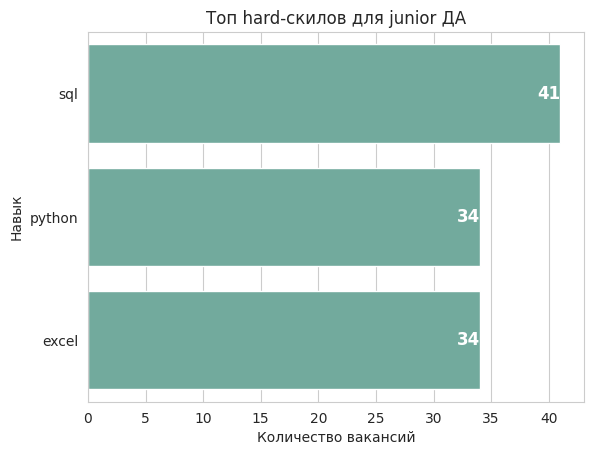

In [99]:
sns.color_palette("pastel")
ax = sns.barplot(y='Навык', x='Количество вакансий', data=data_da_hard_skills_junior, color='#69b3a2')
for p in ax.patches:
    ax.text(p.get_width(),p.get_y()+p.get_height()/2., str(int(p.get_width())),
            fontsize=12, color='white', weight='bold', ha='right', va='center')
plt.title('Топ hard-скилов для junior ДА')
sns.set_style('whitegrid')
plt.show()



In [100]:
# Топ-3  soft-скилов для junior ДА
data_da_soft_skills_junior = data_da_skills_pivot_junior.query('skill_type=="soft"').rename(columns={'key_skills':'Навык','count':'Количество вакансий'}).head(3)
data_da_soft_skills_junior

,Навык,Количество вакансий,skill_type
57,аналитический склад ума,42,soft
129,умение работать с большими объемами информации,20,soft
77,коммуникабельность,19,soft


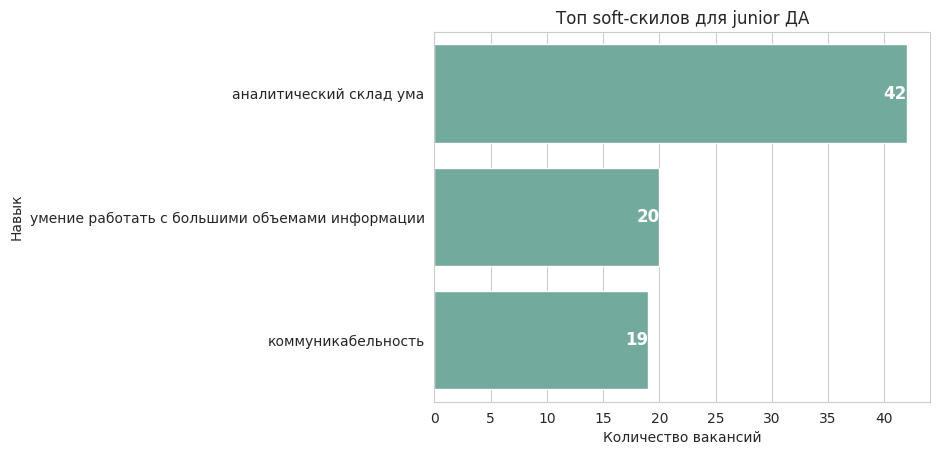

In [101]:
sns.color_palette("pastel")
ax = sns.barplot(y='Навык', x='Количество вакансий', data=data_da_soft_skills_junior, color='#69b3a2')
for p in ax.patches:
    ax.text(p.get_width(),p.get_y()+p.get_height()/2., str(int(p.get_width())),
            fontsize=12, color='white', weight='bold', ha='right', va='center')
plt.title('Топ soft-скилов для junior ДА')
sns.set_style('whitegrid')
plt.show()

Junior ДА должен знать sql, python, excel. Должен обладать аналитическим складом ума, умением работать с большим объемом информации и коммуникаьельностью.

In [103]:
# Топ skills для junior+
data_da_skills_pivot_junior_plus = data_da_for_pivot_skills_junior_plus.pivot_table(index='key_skills', values='id', aggfunc='count')
data_da_skills_pivot_junior_plus=data_da_skills_pivot_junior_plus.reset_index().sort_values(by='id', ascending = False).rename(columns={'id':'count'})
data_da_skills_pivot_junior_plus['skill_type'] = data_da_skills_pivot_junior_plus.apply(categorize_skills, axis=1)
data_da_skills_pivot_junior_plus.head(15)

,key_skills,count,skill_type
195,sql,547,hard
160,python,321,hard
249,аналитический склад ума,267,soft
233,анализ данных,262,hard
377,работа с базами данных,194,hard
146,pandas,187,hard
153,power bi,184,hard
74,excel,164,hard
284,документация,150,soft
48,data analysis,138,hard


In [104]:
# Количество требований hard-скилов в топ-15 требований для junior+ ДА
data_da_skills_pivot_junior_plus.head(15).query('skill_type=="hard"')['count'].sum()

2250

In [105]:
# Количество требований soft-скилов в топ-15 требований junior ДА
data_da_skills_pivot_junior_plus.head(15).query('skill_type=="soft"')['count'].sum()

645

Для junior+ ДА также больше важны hard скилы. Их требуют в три раза чаще, чем soft.

In [106]:
# Топ-3  hard-скилов для junior+ ДА
data_da_hard_skills_junior_plus = data_da_skills_pivot_junior_plus.query('skill_type=="hard"').rename(columns={'key_skills':'Навык','count':'Количество вакансий'}).head(3)
data_da_hard_skills_junior_plus

,Навык,Количество вакансий,skill_type
195,sql,547,hard
160,python,321,hard
233,анализ данных,262,hard


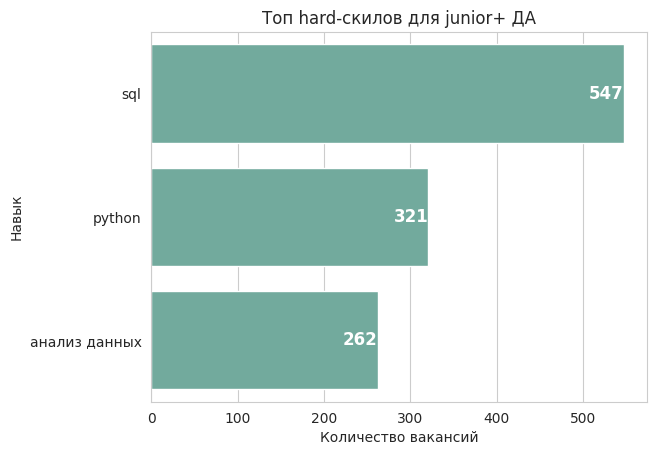

In [107]:
sns.color_palette("pastel")
ax = sns.barplot(y='Навык', x='Количество вакансий', data=data_da_hard_skills_junior_plus , color='#69b3a2')
for p in ax.patches:
    ax.text(p.get_width(),p.get_y()+p.get_height()/2., str(int(p.get_width())),
            fontsize=12, color='white', weight='bold', ha='right', va='center')
plt.title('Топ hard-скилов для junior+ ДА')
sns.set_style('whitegrid')
plt.show()

Эксель уступает место навыкам анализа данных.

In [108]:
# Топ-3  soft-скилов для junior+ ДА
data_da_soft_skills_junior_plus  = data_da_skills_pivot_junior_plus.query('skill_type=="soft"').rename(columns={'key_skills':'Навык','count':'Количество вакансий'}).head(3)
data_da_soft_skills_junior_plus

,Навык,Количество вакансий,skill_type
249,аналитический склад ума,267,soft
284,документация,150,soft
423,умение работать с большими объемами информации,119,soft


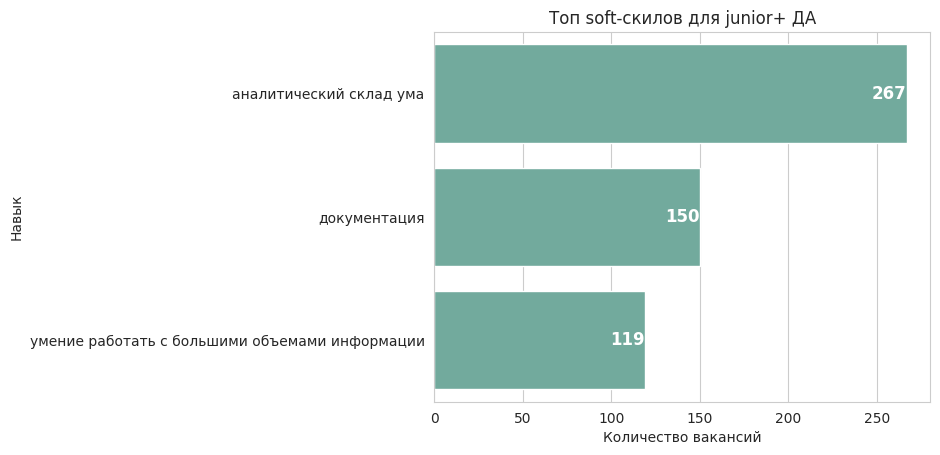

In [109]:
sns.color_palette("pastel")
ax = sns.barplot(y='Навык', x='Количество вакансий', data=data_da_soft_skills_junior_plus , color='#69b3a2')
for p in ax.patches:
    ax.text(p.get_width(),p.get_y()+p.get_height()/2., str(int(p.get_width())),
            fontsize=12, color='white', weight='bold', ha='right', va='center')
plt.title('Топ soft-скилов для junior+ ДА')
sns.set_style('whitegrid')
plt.show()

В топ soft-скилов для junior+ коммуникабельность уступает место умению работать с документаций.

Таким образом, от junior+ ждут большей самостоятельности: обладанием навыками анализа данных и умением работать с документацией.

In [110]:
# Топ skills для middle
data_da_skills_pivot_middle = data_da_for_pivot_skills_middle.pivot_table(index='key_skills', values='id', aggfunc='count')
data_da_skills_pivot_middle=data_da_skills_pivot_middle.reset_index().sort_values(by='id', ascending = False).rename(columns={'id':'count'})
data_da_skills_pivot_middle['skill_type'] = data_da_skills_pivot_middle.apply(categorize_skills, axis=1)
data_da_skills_pivot_middle.head(15)

,key_skills,count,skill_type
155,sql,296,hard
132,python,217,hard
115,pandas,116,hard
184,анализ данных,114,hard
208,документация,109,soft
34,data analysis,107,hard
261,работа с базами данных,98,hard
193,аналитический склад ума,92,soft
120,power bi,89,hard
214,коммуникабельность,62,soft


In [91]:
# Количество требований hard-скилов в топ-15 требований для middle ДА
data_da_skills_pivot_middle.head(15).query('skill_type=="hard"')['count'].sum()

1217

In [92]:
# Количество требований soft-скилов в топ-15 требований для middle ДА
data_da_skills_pivot_middle.head(15).query('skill_type=="soft"')['count'].sum()

308

От middle ДА еще чаще требуют hard скилы, чем soft, примерно в 4 раза.

In [111]:
# Топ  hard-скилов для middle ДА
data_da_hard_skills_middle = data_da_skills_pivot_middle.query('skill_type=="hard"').rename(columns={'key_skills':'Навык','count':'Количество вакансий'}).head(4)
data_da_hard_skills_middle

,Навык,Количество вакансий,skill_type
155,sql,296,hard
132,python,217,hard
115,pandas,116,hard
184,анализ данных,114,hard


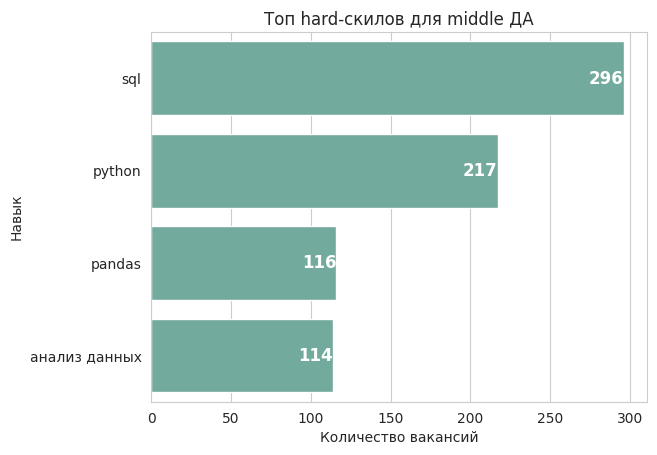

In [112]:
sns.color_palette("pastel")
ax = sns.barplot(y='Навык', x='Количество вакансий', data= data_da_hard_skills_middle, color='#69b3a2')
for p in ax.patches:
    ax.text(p.get_width(),p.get_y()+p.get_height()/2., str(int(p.get_width())),
            fontsize=12, color='white', weight='bold', ha='right', va='center')
plt.title('Топ hard-скилов для middle ДА')
sns.set_style('whitegrid')
plt.show()

Топ hard-скилов для middle ДА такой же, как для junior+, но большее значение играет знание библиотеки pandas. Можно предположить, что от middle ожидают более глубокого знания python.

In [113]:
# Топ  soft-скилов для middle ДА
data_da_soft_skills_middle = data_da_skills_pivot_middle.query('skill_type=="soft"').rename(columns={'key_skills':'Навык','count':'Количество вакансий'}).head(4)
data_da_soft_skills_middle

,Навык,Количество вакансий,skill_type
208,документация,109,soft
193,аналитический склад ума,92,soft
214,коммуникабельность,62,soft
291,умение работать с большими объемами информации,45,soft


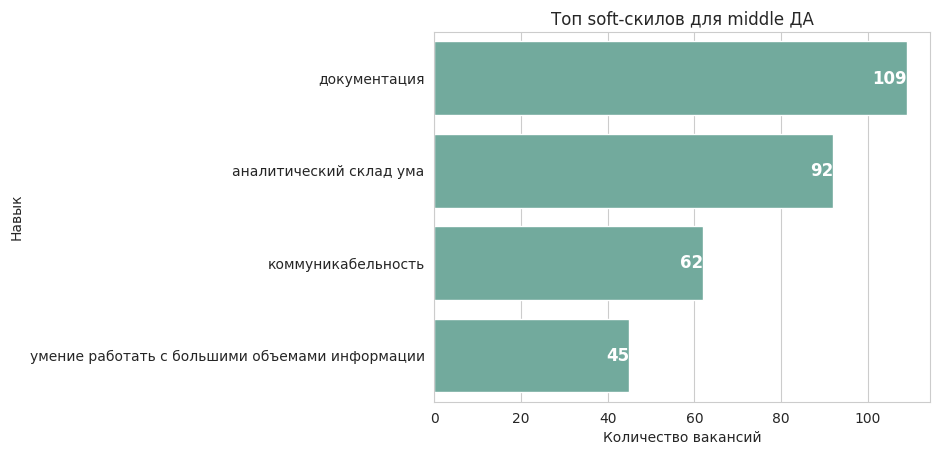

In [114]:
sns.color_palette("pastel")
ax = sns.barplot(y='Навык', x='Количество вакансий', data=data_da_soft_skills_middle, color='#69b3a2')
for p in ax.patches:
    ax.text(p.get_width(),p.get_y()+p.get_height()/2., str(int(p.get_width())),
            fontsize=12, color='white', weight='bold', ha='right', va='center')
plt.title('Топ soft-скилов для middle ДА')
sns.set_style('whitegrid')
plt.show()

Среди топ soft-скилов все теже, что и у junior и junior+, но на первое место выходит умение работать с документацией.

In [115]:
# Топ skills для senior
data_da_skills_pivot_senior = data_da_for_pivot_skills_senior.pivot_table(index='key_skills', values='id', aggfunc='count')
data_da_skills_pivot_senior = data_da_skills_pivot_senior.reset_index().sort_values(by='id', ascending = False).rename(columns={'id':'count'})
data_da_skills_pivot_senior['skill_type'] = data_da_skills_pivot_senior.apply(categorize_skills, axis=1)
data_da_skills_pivot_senior.head(15)


,key_skills,count,skill_type
20,sql,9,hard
17,python,9,hard
7,data analysis,8,hard
15,pandas,4,hard
5,confluence,4,hard
30,документация,4,soft
16,power bi,4,hard
0,ab-test,3,hard
34,проактивность,3,soft
33,презентация результатов,3,soft


In [116]:
# Количество требований hard-скилов в топ-15 требований для senior ДА
data_da_skills_pivot_senior.head(15).query('skill_type=="hard"')['count'].sum()

52

In [117]:
# Количество требований hard-скилов в топ-15 требований для senior ДА
data_da_skills_pivot_senior.head(15).query('skill_type=="soft"')['count'].sum()

13

Также hard-скилы важнее soft. Hard требуют чаще soft , примерно в 4 раза.





In [118]:
# Топ  hard-скилов для senior ДА
data_da_hard_skills_senior = data_da_skills_pivot_senior.query('skill_type=="hard"').rename(columns={'key_skills':'Навык','count':'Количество вакансий'}).head(4)
data_da_hard_skills_senior

,Навык,Количество вакансий,skill_type
20,sql,9,hard
17,python,9,hard
7,data analysis,8,hard
15,pandas,4,hard


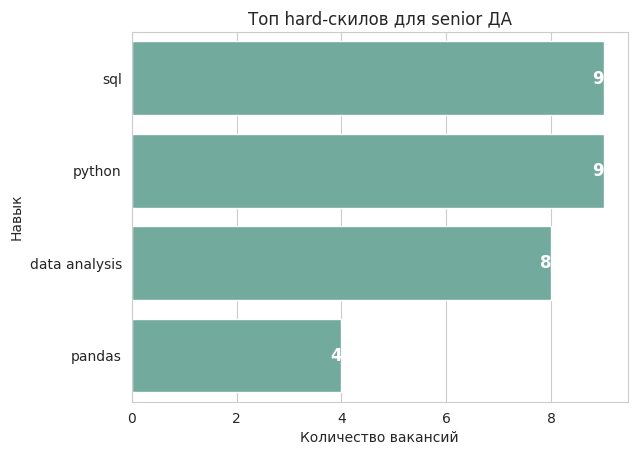

In [122]:
sns.color_palette("pastel")
ax = sns.barplot(y='Навык', x='Количество вакансий', data=data_da_hard_skills_senior, color='#69b3a2')
for p in ax.patches:
    ax.text(p.get_width(),p.get_y()+p.get_height()/2., str(int(p.get_width())),
            fontsize=12, color='white', weight='bold', ha='right', va='center')
plt.title('Топ hard-скилов для senior ДА')
sns.set_style('whitegrid')
plt.show()

Топ hard-скилов senior ДА тот же: sql, python(psndas), навыки анализа данных.

In [123]:
# Топ soft скилов для senior ДА
data_da_soft_skills_senior = data_da_skills_pivot_senior.query('skill_type=="soft"').rename(columns={'key_skills':'Навык','count':'Количество вакансий'}).head(4)
data_da_soft_skills_senior

,Навык,Количество вакансий,skill_type
30,документация,4,soft
34,проактивность,3,soft
33,презентация результатов,3,soft
31,коммуникабельность,3,soft


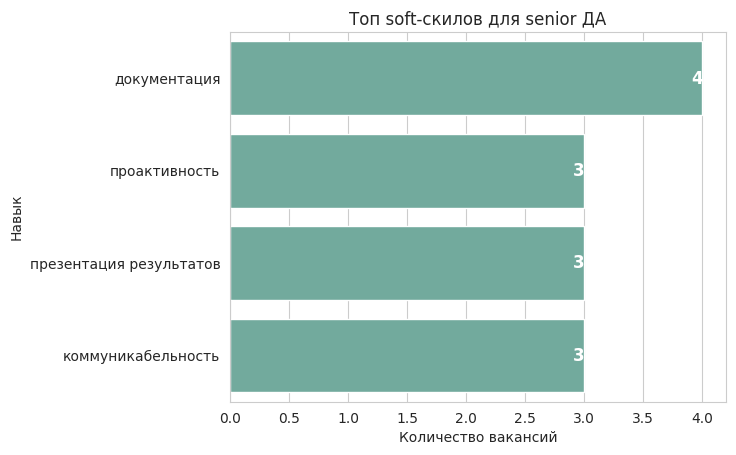

In [124]:
sns.color_palette("pastel")
ax = sns.barplot(y='Навык', x='Количество вакансий', data=data_da_soft_skills_senior, color='#69b3a2')
for p in ax.patches:
    ax.text(p.get_width(),p.get_y()+p.get_height()/2., str(int(p.get_width())),
            fontsize=12, color='white', weight='bold', ha='right', va='center')
plt.title('Топ soft-скилов для senior ДА')
sns.set_style('whitegrid')
plt.show()

В топе soft-скилов для senior, помимо умения работать с документацией и коммуникабельности, добавляется проактивность и презентация результатов. В данном случае под презентацией результатов подразумевается скорее не умение работать в powerpoint или другой программой для создание презентаций, а умение донести результаты до аудитории. Проактивность — это навык, который помогает расставлять приоритеты и не поддаваться импульсивным реакциям. Обладание этим навыком ожидают от senior.

Таким образом, для аналитиков данных важнее hard- скилы, чем soft. И чем выше грейд, тем больше требований к hard-скилам. При этом топ hard-скилов одинаков. От ДА ждут умения работать с sql, python (pandas), на начальных этапах excel.
Что касается soft скилов с ростом грейда  аналитический склад ума и умение работать с большим объемом информации становятся само-собой разумеющимися и в требованиях чаще прописывают умение работать с документацией. Коммуникабельность всегда в плюс.

Наиболее желаемые кандидаты должны обладать следующими навыками:

junior hard skills: sql, python	excel; soft skills:
аналитический склад ума, умение работать с большими объемами информации, коммуникабельность

junior+ hard skills: sql, python,	анализ данных; soft skills: аналитический склад ума, документация,	умение работать с большими объемами информации

middle hard skills: sql, python, pandas, анализ данных; soft skills: документация, аналитический склад ума, коммуникабельность,	умение работать с большими объемами информации

senior hard skills: sql, python, data analysis, pandas; soft skills: документация, проактивность, презентация результатов, коммуникабельность






#### Hard и soft скилы для системных аналитиков

In [125]:
data_sa_for_pivot_skills = data_sa
data_sa_for_pivot_skills['key_skills'] = data_sa_for_pivot_skills['key_skills'].str.split(', ')
data_sa_for_pivot_skills = data_sa_for_pivot_skills.explode('key_skills')
#Уберем строки с пустыми key_skills, которые образовались в результате предобработки столбца key_skills (удаления скобок) и его развертывания
data_sa_for_pivot_skills = data_sa_for_pivot_skills.query('key_skills!=""').reset_index()
data_sa_for_pivot_skills.head()

,index,id,name,published_at,alternate_url,type,employer,department,area,experience,...,schedule,employment,description,description_lemmatized,salary_from,salary_to,salary_bin,key_skills_from_key_skills_field,hard_skills_from_description,soft_skills_from_description
0,0,100046399,Системный аналитик,2024-07-08 10:22:57,https://hh.ru/vacancy/100046399,Открытая,Юрент,NaN,Москва,Middle,...,Полный день,Полная занятость,юрент — это новый уровень городской мобильност...,юрент новый уровень городской мобильность круп...,NaN,NaN,ЗП не указана,"SQL, Аналитический склад ума, 1С",confluence,NaN
1,0,100046399,Системный аналитик,2024-07-08 10:22:57,https://hh.ru/vacancy/100046399,Открытая,Юрент,NaN,Москва,Middle,...,Полный день,Полная занятость,юрент — это новый уровень городской мобильност...,юрент новый уровень городской мобильность круп...,NaN,NaN,ЗП не указана,"SQL, Аналитический склад ума, 1С",confluence,NaN
2,0,100046399,Системный аналитик,2024-07-08 10:22:57,https://hh.ru/vacancy/100046399,Открытая,Юрент,NaN,Москва,Middle,...,Полный день,Полная занятость,юрент — это новый уровень городской мобильност...,юрент новый уровень городской мобильность круп...,NaN,NaN,ЗП не указана,"SQL, Аналитический склад ума, 1С",confluence,NaN
3,0,100046399,Системный аналитик,2024-07-08 10:22:57,https://hh.ru/vacancy/100046399,Открытая,Юрент,NaN,Москва,Middle,...,Полный день,Полная занятость,юрент — это новый уровень городской мобильност...,юрент новый уровень городской мобильность круп...,NaN,NaN,ЗП не указана,"SQL, Аналитический склад ума, 1С",confluence,NaN
4,1,100050107,Бизнес/Системный Аналитик,2024-07-06 17:19:32,https://hh.ru/vacancy/100050107,Открытая,Surf,NaN,Санкт-Петербург,Junior+,...,Удаленная работа,Полная занятость,в surf уже 13 лет мы разрабатываем много разны...,surf 13 год разрабатывать разный продукт начин...,NaN,NaN,ЗП не указана,"BPMN, UML, Английский язык, Системный анализ, ...",NaN,документация


In [126]:
# Топ требуемых навыков от СА:

data_sa_pivot_skills = data_sa_for_pivot_skills.pivot_table(index='key_skills', values='id', aggfunc='count')

data_sa_pivot_skills = data_sa_pivot_skills.reset_index().sort_values(by='id', ascending = False).head(20)
data_sa_pivot_skills

,key_skills,id
526,документация,1291
349,sql,773
92,confluence,709
68,bpm,646
743,системный анализ,599
378,uml,563
305,rest,391
456,аналитический склад ума,328
560,коммуникабельность,287
782,тз,281


In [127]:
# Применение функции для категоризации навыков на soft и hard
data_sa_pivot_skills['skill_type'] = data_sa_pivot_skills.apply(categorize_skills, axis=1)

# Проверяем
data_sa_pivot_skills

,key_skills,id,skill_type
526,документация,1291,soft
349,sql,773,hard
92,confluence,709,hard
68,bpm,646,hard
743,системный анализ,599,hard
378,uml,563,hard
305,rest,391,hard
456,аналитический склад ума,328,soft
560,коммуникабельность,287,soft
782,тз,281,hard


Топ-20 навыков системного аналитика распределены на твердые и мягкие.

In [128]:
# Применение функции ко всему датасету
data_sa_for_pivot_skills['skill_type'] = data_sa_for_pivot_skills.apply(categorize_skills, axis=1)

# Выделим в отдельные датасеты Junior, Junior+, Middle, Senior
data_sa_for_pivot_skills_junior = data_sa_for_pivot_skills.query('experience == "Junior"')
data_sa_for_pivot_skills_junior_plus = data_sa_for_pivot_skills.query('experience == "Junior+"')
data_sa_for_pivot_skills_middle = data_sa_for_pivot_skills.query('experience == "Middle"')
data_sa_for_pivot_skills_senior = data_sa_for_pivot_skills.query('experience == "Senior"')


In [129]:
# Топ skills для junior СА
data_sa_skills_pivot_junior = data_sa_for_pivot_skills_junior.pivot_table(index='key_skills', values='id', aggfunc='count')
data_sa_skills_pivot_junior=data_sa_skills_pivot_junior.reset_index().sort_values(by='id', ascending = False).rename(columns={'id':'count'})
data_sa_skills_pivot_junior['skill_type'] = data_sa_skills_pivot_junior.apply(categorize_skills, axis=1)
data_sa_skills_pivot_junior.head(15)

,key_skills,count,skill_type
52,аналитический склад ума,64,soft
63,документация,50,soft
104,системный анализ,43,hard
94,работа с базами данных,39,hard
32,sql,35,hard
55,бизнес-анализ,22,hard
5,bpm,21,hard
36,uml,21,hard
9,confluence,18,hard
26,rest,18,hard


In [130]:
# Количество требований hard-скилов в топ-15 требований для junior СА
data_sa_skills_pivot_junior.head(15).query('skill_type=="hard"')['count'].sum()

294

In [131]:
# Количество требований soft-скилов в топ-15 требований для junior CА
data_sa_skills_pivot_junior.head(15).query('skill_type=="soft"')['count'].sum()

114

От системных аналитиков junior также, как и от ДА, требуют больше hard скилов. Более, чем в два раза в топ-15.

In [132]:
# Топ-3  hard-скилов для junior СА
data_sa_hard_skills_junior = data_sa_skills_pivot_junior.query('skill_type=="hard"').rename(columns={'key_skills':'Навык','count':'Количество вакансий'}).head(3)
data_sa_hard_skills_junior

,Навык,Количество вакансий,skill_type
104,системный анализ,43,hard
94,работа с базами данных,39,hard
32,sql,35,hard


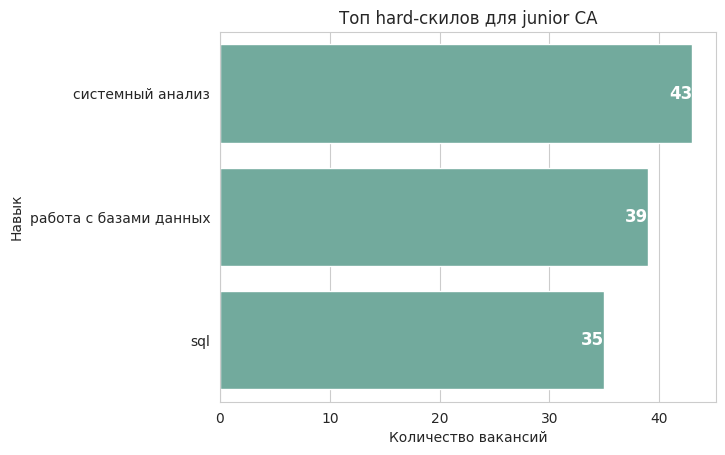

In [133]:
sns.color_palette("pastel")
ax = sns.barplot(y='Навык', x='Количество вакансий', data=data_sa_hard_skills_junior, color='#69b3a2')
for p in ax.patches:
    ax.text(p.get_width(),p.get_y()+p.get_height()/2., str(int(p.get_width())),
            fontsize=12, color='white', weight='bold', ha='right', va='center')
plt.title('Топ hard-скилов для junior СА')
sns.set_style('whitegrid')
plt.show()

In [134]:
# Топ-3  soft-скилов для junior СА
data_sa_soft_skills_junior = data_sa_skills_pivot_junior.query('skill_type=="soft"').rename(columns={'key_skills':'Навык','count':'Количество вакансий'}).head(3)
data_sa_soft_skills_junior

,Навык,Количество вакансий,skill_type
52,аналитический склад ума,64,soft
63,документация,50,soft
60,деловая коммуникация,9,soft


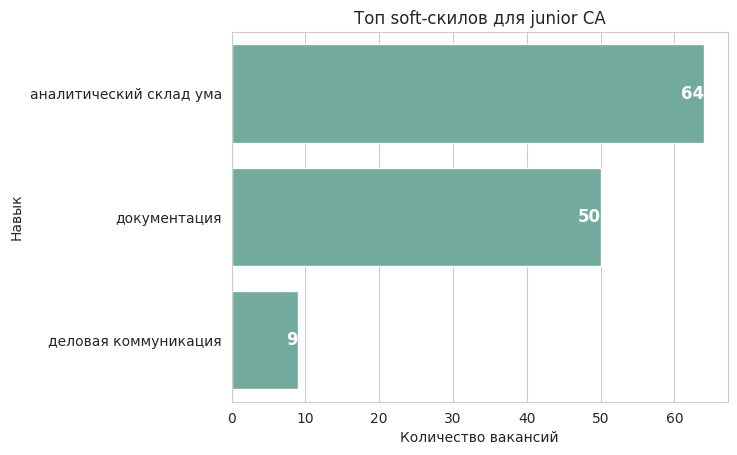

In [135]:
sns.color_palette("pastel")
ax = sns.barplot(y='Навык', x='Количество вакансий', data=data_sa_soft_skills_junior, color='#69b3a2')
for p in ax.patches:
    ax.text(p.get_width(),p.get_y()+p.get_height()/2., str(int(p.get_width())),
            fontsize=12, color='white', weight='bold', ha='right', va='center')
plt.title('Топ soft-скилов для junior СА')
sns.set_style('whitegrid')
plt.show()

От junior СА требуются такие hard скилы, как навыки системного анализа, умение работать с базами данных, знание sql. От junior кандидата ожидают, что у него будет аналитический склад ума, умение работать с документацией и что он обладает навыками деловой коммуникации.

In [136]:
# Топ skills для junior+ СА
data_sa_skills_pivot_junior_plus = data_sa_for_pivot_skills_junior_plus.pivot_table(index='key_skills', values='id', aggfunc='count')
data_sa_skills_pivot_junior_plus=data_sa_skills_pivot_junior_plus.reset_index().sort_values(by='id', ascending = False).rename(columns={'id':'count'})
data_sa_skills_pivot_junior_plus['skill_type'] = data_sa_skills_pivot_junior_plus.apply(categorize_skills, axis=1)
data_sa_skills_pivot_junior_plus.head(15)

,key_skills,count,skill_type
331,документация,554,soft
228,sql,330,hard
59,confluence,304,hard
44,bpm,284,hard
247,uml,238,hard
453,системный анализ,231,hard
292,аналитический склад ума,170,soft
478,тз,154,hard
204,rest,145,hard
353,коммуникабельность,131,soft


In [128]:
# Количество требований hard-скилов в топ-15 требований для junior+ СА
data_sa_skills_pivot_junior_plus.head(15).query('skill_type=="hard"')['count'].sum()

2157

In [129]:
# Количество требований soft-скилов в топ-15 требований для junior+ СА
data_sa_skills_pivot_junior_plus.head(15).query('skill_type=="soft"')['count'].sum()

855

Для junior + в 2,5 раза чаще требуются hard skills, чем soft.

In [137]:
# Топ-3  hard-скилов для junior_plus СА
data_sa_hard_skills_junior_plus = data_sa_skills_pivot_junior_plus.query('skill_type=="hard"').rename(columns={'key_skills':'Навык','count':'Количество вакансий'}).head(3)
data_sa_hard_skills_junior_plus

,Навык,Количество вакансий,skill_type
228,sql,330,hard
59,confluence,304,hard
44,bpm,284,hard


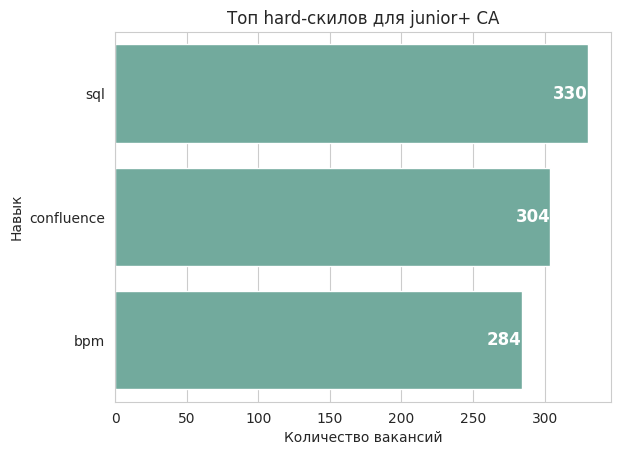

In [138]:
sns.color_palette("pastel")
ax = sns.barplot(y='Навык', x='Количество вакансий', data=data_sa_hard_skills_junior_plus, color='#69b3a2')
for p in ax.patches:
    ax.text(p.get_width(),p.get_y()+p.get_height()/2., str(int(p.get_width())),
            fontsize=12, color='white', weight='bold', ha='right', va='center')
plt.title('Топ hard-скилов для junior+ СА')
sns.set_style('whitegrid')
plt.show()

Топ-3 hard скилов для junior+ отличается от junior. Общим требованием остается sql и его значимость возрастает. На второе и третье место выходят confluence	и bpm.

In [139]:
# Топ-3  soft-скилов для junior_plus СА
data_sa_soft_skills_junior_plus = data_sa_skills_pivot_junior_plus.query('skill_type=="soft"').rename(columns={'key_skills':'Навык','count':'Количество вакансий'}).head(3)
data_sa_soft_skills_junior_plus

,Навык,Количество вакансий,skill_type
331,документация,554,soft
292,аналитический склад ума,170,soft
353,коммуникабельность,131,soft


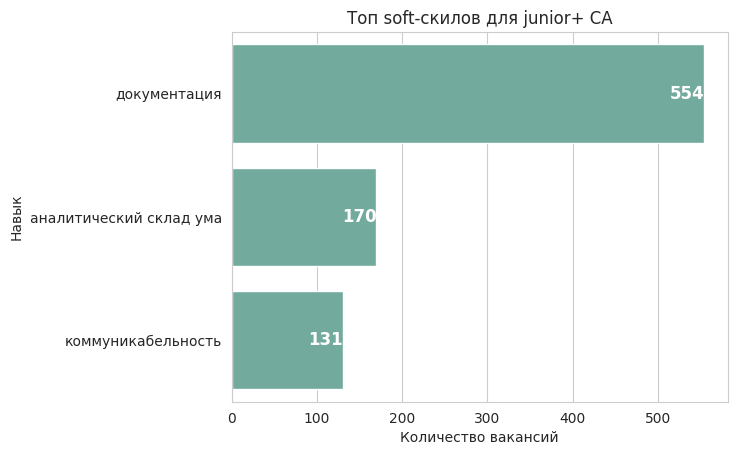

In [140]:
sns.color_palette("pastel")
ax = sns.barplot(y='Навык', x='Количество вакансий', data=data_sa_soft_skills_junior_plus, color='#69b3a2')
for p in ax.patches:
    ax.text(p.get_width(),p.get_y()+p.get_height()/2., str(int(p.get_width())),
            fontsize=12, color='white', weight='bold', ha='right', va='center')
plt.title('Топ soft-скилов для junior+ СА')
sns.set_style('whitegrid')
plt.show()

А вот soft скилы остаются практически теми же: умение работать с документами, аналитический склад ума. Деловую коммуникацию сменяет коммуникабельность.

In [141]:
# Топ skills для middle СА
data_sa_skills_pivot_middle = data_sa_for_pivot_skills_middle.pivot_table(index='key_skills', values='id', aggfunc='count')
data_sa_skills_pivot_middle=data_sa_skills_pivot_middle.reset_index().sort_values(by='id', ascending = False).rename(columns={'id':'count'})
data_sa_skills_pivot_middle['skill_type'] = data_sa_skills_pivot_middle.apply(categorize_skills, axis=1)
data_sa_skills_pivot_middle.head(15)

,key_skills,count,skill_type
332,документация,658,soft
220,sql,386,hard
56,confluence,370,hard
42,bpm,324,hard
459,системный анализ,309,hard
234,uml,287,hard
192,rest,214,hard
212,soap,148,hard
350,коммуникабельность,140,soft
482,тз,111,hard


In [133]:
# Количество требований hard-скилов в топ-15 требований для middle СА
data_sa_skills_pivot_middle.head(15).query('skill_type=="hard"')['count'].sum()

2518

In [134]:
# Количество требований soft-скилов в топ-15 требований для middle СА
data_sa_skills_pivot_middle.head(15).query('skill_type=="soft"')['count'].sum()

890

Hard скилы для middle почти в три раза важнее, чем soft.

In [142]:
# Топ-3  hard-скилов для  middle СА
data_sa_hard_skills_middle = data_sa_skills_pivot_middle.query('skill_type=="hard"').rename(columns={'key_skills':'Навык','count':'Количество вакансий'}).head(3)
data_sa_hard_skills_middle

,Навык,Количество вакансий,skill_type
220,sql,386,hard
56,confluence,370,hard
42,bpm,324,hard


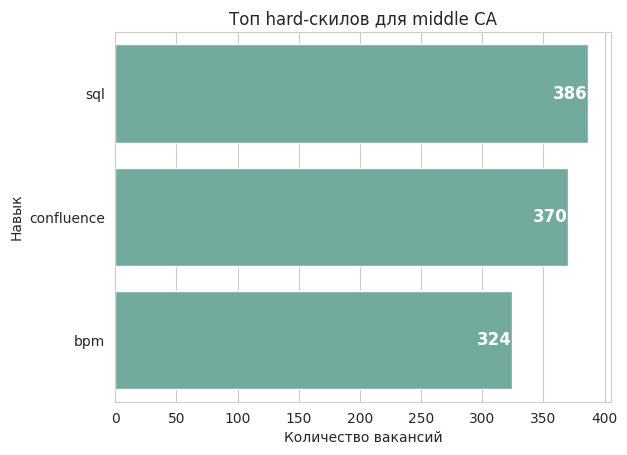

In [143]:
sns.color_palette("pastel")
ax = sns.barplot(y='Навык', x='Количество вакансий', data=data_sa_hard_skills_middle, color='#69b3a2')
for p in ax.patches:
    ax.text(p.get_width(),p.get_y()+p.get_height()/2., str(int(p.get_width())),
            fontsize=12, color='white', weight='bold', ha='right', va='center')
plt.title('Топ hard-скилов для middle СА')
sns.set_style('whitegrid')
plt.show()

In [144]:
# Топ-3  soft скилов для  middle СА
data_sa_soft_skills_middle = data_sa_skills_pivot_middle.query('skill_type=="soft"').rename(columns={'key_skills':'Навык','count':'Количество вакансий'}).head(3)
data_sa_soft_skills_middle

,Навык,Количество вакансий,skill_type
332,документация,658,soft
350,коммуникабельность,140,soft
286,аналитический склад ума,92,soft


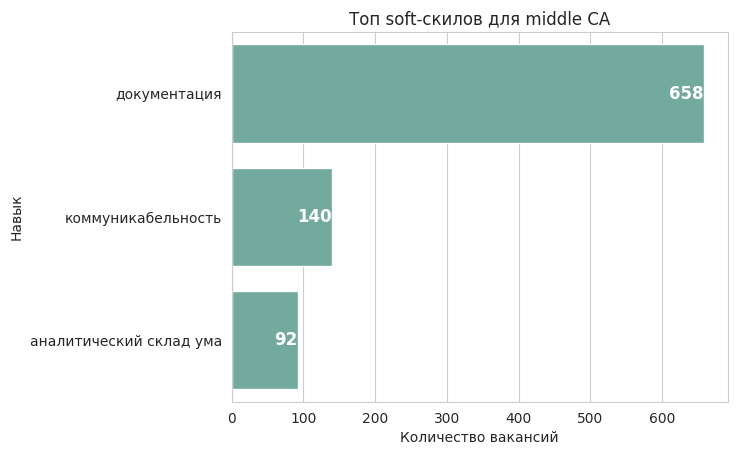

In [145]:
sns.color_palette("pastel")
ax = sns.barplot(y='Навык', x='Количество вакансий', data=data_sa_soft_skills_middle, color='#69b3a2')
for p in ax.patches:
    ax.text(p.get_width(),p.get_y()+p.get_height()/2., str(int(p.get_width())),
            fontsize=12, color='white', weight='bold', ha='right', va='center')
plt.title('Топ soft-скилов для middle СА')
sns.set_style('whitegrid')
plt.show()

Топ требований к middle, такие же, как и к junior +, и soft, и hard.

In [146]:
# Топ skills для senior СА
data_sa_skills_pivot_senior = data_sa_for_pivot_skills_senior.pivot_table(index='key_skills', values='id', aggfunc='count')
data_sa_skills_pivot_senior=data_sa_skills_pivot_senior.reset_index().sort_values(by='id', ascending = False).rename(columns={'id':'count'})
data_sa_skills_pivot_senior['skill_type'] = data_sa_skills_pivot_senior.apply(categorize_skills, axis=1)
data_sa_skills_pivot_senior.head(15)

,key_skills,count,skill_type
69,документация,29,soft
52,sql,22,hard
55,uml,17,hard
12,bpm,17,hard
15,confluence,17,hard
85,системный анализ,16,hard
46,rest,14,hard
50,soap,8,hard
7,api,8,hard
31,jira,8,hard


In [139]:
# Количество требований hard-скилов в топ-15 требований для senior СА
data_sa_skills_pivot_senior.head(15).query('skill_type=="hard"')['count'].sum()

153

In [140]:
# Количество требований soft-скилов в топ-15 требований для senior СА
data_sa_skills_pivot_senior.head(15).query('skill_type=="soft"')['count'].sum()

36

Hard скилы для senior требуют в 4 раза чаще, чем soft.

In [147]:
# Топ  hard-скилов для  senior СА
data_sa_hard_skills_senior = data_sa_skills_pivot_senior.query('skill_type=="hard"').rename(columns={'key_skills':'Навык','count':'Количество вакансий'}).head(4)
data_sa_hard_skills_senior

,Навык,Количество вакансий,skill_type
52,sql,22,hard
55,uml,17,hard
12,bpm,17,hard
15,confluence,17,hard


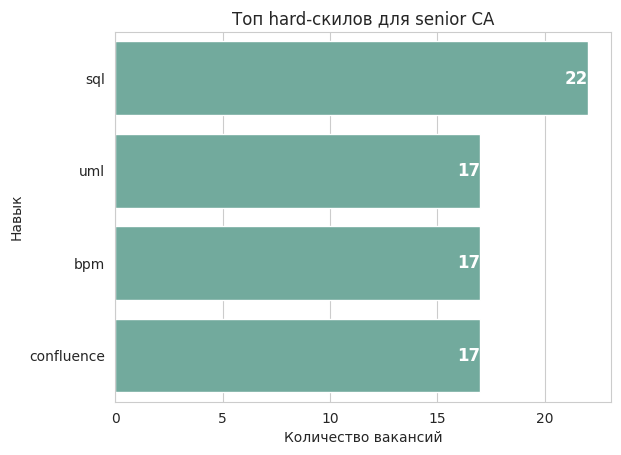

In [148]:
sns.color_palette("pastel")
ax = sns.barplot(y='Навык', x='Количество вакансий', data=data_sa_hard_skills_senior, color='#69b3a2')
for p in ax.patches:
    ax.text(p.get_width(),p.get_y()+p.get_height()/2., str(int(p.get_width())),
            fontsize=12, color='white', weight='bold', ha='right', va='center')
plt.title('Топ hard-скилов для senior СА')
sns.set_style('whitegrid')
plt.show()

В топ hard требований для senior добавился uml. В остальном список тот же.

In [149]:
# Топ  soft-скилов для  senior СА
data_sa_soft_skills_senior = data_sa_skills_pivot_senior.query('skill_type=="soft"').rename(columns={'key_skills':'Навык','count':'Количество вакансий'}).head(3)
data_sa_soft_skills_senior

,Навык,Количество вакансий,skill_type
69,документация,29,soft
70,коммуникабельность,7,soft
68,деловая коммуникация,3,soft


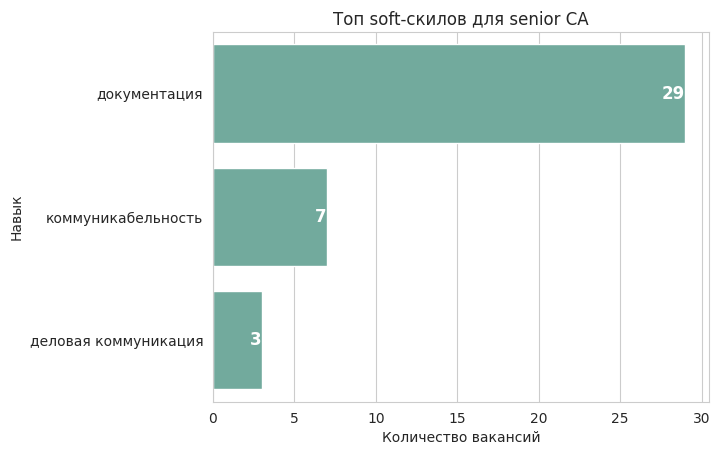

In [150]:
sns.color_palette("pastel")
ax = sns.barplot(y='Навык', x='Количество вакансий', data=data_sa_soft_skills_senior, color='#69b3a2')
for p in ax.patches:
    ax.text(p.get_width(),p.get_y()+p.get_height()/2., str(int(p.get_width())),
            fontsize=12, color='white', weight='bold', ha='right', va='center')
plt.title('Топ soft-скилов для senior СА')
sns.set_style('whitegrid')
plt.show()

Требования к soft скилам такие же, как и у других грейдов. Различия, видимо, только в степени владения навыками.

Наиболее желаемые кандидаты на вакансии системных аналитиков:



*  junior hard skills: навыки системного анализа, умение работать с базами данных, знание sql; soft skills: аналитический склад ума, умение работать с документацией, навыками деловой коммуникации
*  junir+ hard skills:  sql, confluence и bpm; soft skills: документация, аналитический склад ума, коммуникабельность
*  middle hard skills: sql, confluence и bpm; soft skills:документация, коммуникабельность, аналитический склад ума
*  senior hard skills: sql, uml, bpm, confluence; soft skills: документация,коммуникабельность, деловая коммуникация, аналитический склад ума







## Расчет помесячной динамики количества вакансий для Аналитика данных и системного аналитика. Отдельно дайте для грейдов Junior, Junior+, Middle, Senior.

In [151]:
data_da['published_at'].describe()

count                             1801
mean     2024-05-04 07:51:09.441421312
min                2024-02-13 21:45:51
25%                2024-04-11 06:46:59
50%                2024-05-11 21:45:07
75%                2024-05-29 13:39:52
max                2024-06-11 15:07:30
Name: published_at, dtype: object

Все данные у нас за 2024г

In [152]:
# Выделение в отдельный столбец месяца из даты публикации объявления
# ДА
data_da['month'] = pd.to_datetime(data_da['published_at']).dt.month
# СА
data_sa['month'] = data_sa['published_at'].dt.month

In [153]:
# Проверяем
data_da.tail()

,id,name,published_at,alternate_url,type,employer,department,area,experience,key_skills,...,employment,description,description_lemmatized,salary_from,salary_to,salary_bin,key_skills_from_key_skills_field,hard_skills_from_description,soft_skills_from_description,month
1796,99985864,Аналитик данных в отдел онлайн-маркетинга (мон...,2024-05-23 18:41:27,https://hh.ru/vacancy/99985864,Открытая,Леруа Мерлен,ИТ,Москва,Junior+,"[проактивность, коммуникабельность, sql, ad ho...",...,Полная занятость,леруа мерлен — data-driven компания с передовы...,леруа мерлен data driven компания передовой ит...,NaN,NaN,ЗП не указана,"SQL, ad-hoc, A/B тесты, ETL, LTV, Python, Post...",NaN,"коммуникация, проактивность",5
1797,99986822,Аналитик данных/специалист Excel,2024-06-10 18:58:20,https://hh.ru/vacancy/99986822,Открытая,СКАЙ БОНД,NaN,Санкт-Петербург,Junior+,"[грамотность, сводные таблицы, сбор и анализ и...",...,Полная занятость,sky bond – это агентство финансовых консультан...,sky bond агентство финансовый консультант евро...,50000.0,50000.0,Меньше 100 тысяч,"Пользователь ПК, Работа в команде, Грамотная р...",NaN,NaN,6
1798,99988999,Аналитик данных на производстве \ Data Analyst...,2024-05-23 19:35:56,https://hh.ru/vacancy/99988999,Открытая,Марс,NaN,Ступино,Junior+,"[анализ данных, sql, power bi, python, data an...",...,Полная занятость,"аналитик будет заниматься сбором, обработкой, ...",аналитик заниматься сбор обработка изучение ан...,NaN,NaN,ЗП не указана,"MS Power BI, Аналитика, Python, SQL, Tableau, ...",NaN,NaN,5
1799,99989203,Аналитик данных на производстве \ Data Analyst...,2024-05-23 19:40:04,https://hh.ru/vacancy/99989203,Открытая,Марс,NaN,Одинцово,Junior+,"[анализ данных, sql, power bi, python, data an...",...,Полная занятость,"аналитик будет заниматься сбором, обработкой, ...",аналитик заниматься сбор обработка изучение ан...,NaN,NaN,ЗП не указана,"MS Power BI, Аналитика, Python, SQL, Tableau, ...",NaN,NaN,5
1800,99989339,Аналитик данных на производстве \ Data Analyst...,2024-05-23 19:41:22,https://hh.ru/vacancy/99989339,Открытая,Марс,NaN,Ульяновск,Junior+,"[анализ данных, sql, power bi, python, data an...",...,Полная занятость,"аналитик будет заниматься сбором, обработкой, ...",аналитик заниматься сбор обработка изучение ан...,NaN,NaN,ЗП не указана,"MS Power BI, Аналитика, Python, SQL, Tableau, ...",NaN,NaN,5


In [154]:
# Проверяем
data_sa.sample(5)

,id,name,published_at,alternate_url,type,employer,department,area,experience,key_skills,...,employment,description,description_lemmatized,salary_from,salary_to,salary_bin,key_skills_from_key_skills_field,hard_skills_from_description,soft_skills_from_description,month
38,100584805,Ведущий системный аналитик,2024-07-05 17:17:20,https://hh.ru/vacancy/100584805,Открытая,БФТ-Холдинг (Бюджетные и Финансовые Технологии),NaN,Санкт-Петербург,Senior,"[json api, тз, бизнес-анализ, rest, xml, sql, ...",...,Полная занятость,бфт-холдинг (входит в группу компаний «ростеле...,бфт холдинг входить группа компания ростелеком...,NaN,NaN,ЗП не указана,"BPMN, UML, EPC, Проектная документация, Разраб...",confluence,документация,7
1125,103373933,Системный аналитик / Systems Analyst (Сбербизнес),2024-07-05 16:14:00,https://hh.ru/vacancy/103373933,Открытая,СБЕР,Сбер для экспертов,Москва,Junior+,[confluence],...,Полная занятость,ищем аналитика в команду проекта сбербизнес - ...,искать аналитика команда проект сбербизнес лич...,NaN,NaN,ЗП не указана,NaN,confluence,NaN,7
541,102847794,Системный аналитик (Мобильное приложение),2024-06-27 12:58:25,https://hh.ru/vacancy/102847794,Открытая,Почтатех,NaN,Москва,Middle,[confluence],...,Полная занятость,наше мобильное приложение помогает миллионам к...,наш мобильный приложение помогать миллион клие...,NaN,NaN,ЗП не указана,NaN,confluence,NaN,6
1486,92567521,Системный аналитик online систем,2024-07-04 09:57:19,https://hh.ru/vacancy/92567521,Открытая,Логистические операции МОЛКОМ,NaN,Мытищи,Middle,[умение работать с большими объемами информаци...,...,Полная занятость,мы приглашаем присоединиться к нашей команде о...,приглашать присоединяться наш команда отдел си...,NaN,NaN,ЗП не указана,"SQL, MS SQL, Аналитическое мышление, Разработк...",NaN,документация,7
631,102924280,Системный аналитик/System Analysis (ученик),2024-06-28 13:52:32,https://hh.ru/vacancy/102924280,Открытая,Aston,NaN,Красноярск,Junior,"[ответственность, бизнес-консультирование, ит,...",...,Стажировка,it-компания aston - компания по разработке про...,it компания aston компания разработка программ...,70000.0,80000.0,Меньше 100 тысяч,"Аналитическое мышление, Аналитический склад ум...",NaN,NaN,6


In [155]:
#Группировка по месяцу размещения объявления и подсчет количества в каждой группе АД
data_da_month_pivot = data_da.pivot_table(index='month',values='id', columns='experience', aggfunc=('count'))
data_da_month_pivot = data_da_month_pivot.reset_index()
data_da_month_pivot

experience,month,Junior,Junior+,Middle,Senior
0,2,NaN,NaN,1.0,NaN
1,3,21.0,168.0,98.0,NaN
2,4,36.0,310.0,140.0,4.0
3,5,51.0,372.0,204.0,6.0
4,6,34.0,241.0,112.0,3.0


In [156]:
#Группировка по месяцу размещения объявления и подсчет количества в каждой группе СА
data_sa_month_pivot = data_sa.pivot_table(index='month',values='id', columns='experience', aggfunc=('count'))
data_sa_month_pivot = data_sa_month_pivot.reset_index()
data_sa_month_pivot

experience,month,Junior,Junior+,Middle,Senior
0,6,9,113,117,7
1,7,77,739,816,37


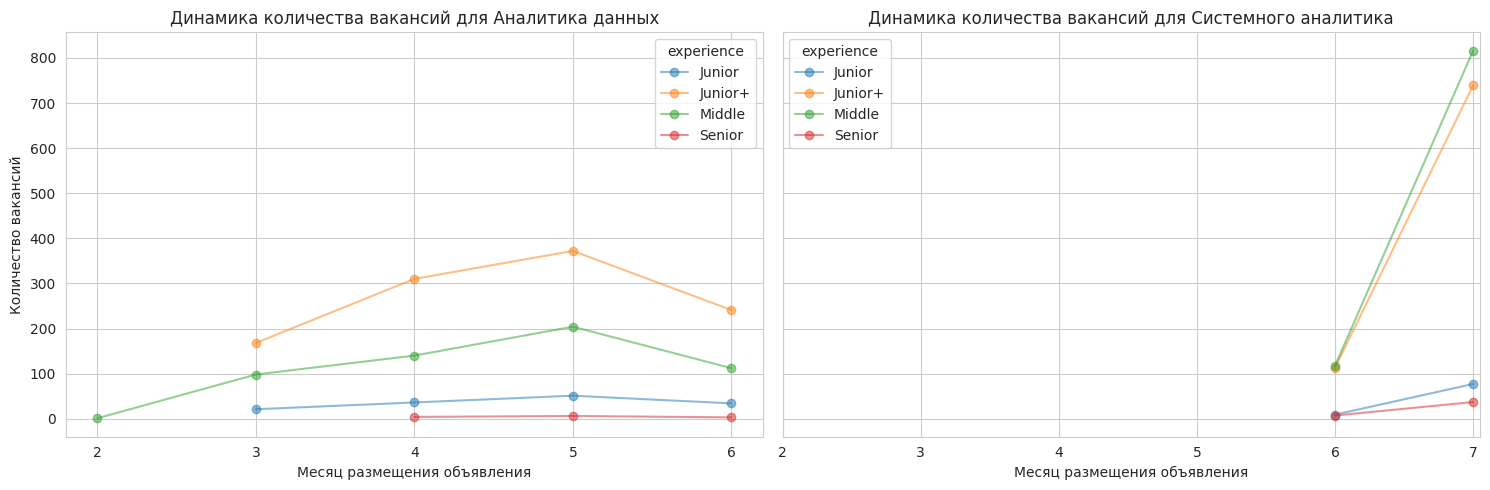

In [157]:
# Рисуем графики помесячной динамики количества вакансий

ax1 = plt.subplot(1, 2, 1)
data_da_month_pivot.plot(x='month',  style='o-', figsize=(15, 5), legend=True, grid=True, alpha=0.5, ax=ax1)
plt.title('Динамика количества вакансий для Аналитика данных')
plt.ylabel('Количество вакансий')
plt.xlabel('Месяц размещения объявления')
plt.xticks(np.arange(2, 7, 1.0))

ax2 = plt.subplot(1, 2, 2, sharey=ax1)
data_sa_month_pivot.plot(x='month', style='o-', figsize=(15, 5), legend=True, grid=True, alpha=0.5, ax=ax2)
plt.title('Динамика количества вакансий для Системного аналитика')
plt.ylabel('Количество вакансий')
plt.xlabel('Месяц размещения объявления')
plt.xticks(np.arange(2, 8, 1.0))
plt.tight_layout()
plt.show()


Данные о вакансиях для аналитиков данных и системных аналитиков даны за разные периоды. В датасет собраны вакансии для аналитиков данных, размещенные с февраля по июнь 2024г. Информация о вакансиях для системных аналитиков предоставлена за июнь и июль. В июле наблюдается резкий рост вакансий для системных аналитиков среднего уровня (junior+ и middle). По грейдам junior и senior рост более сдержанный.
Что касается вакансий для аналитиков данных, то их количество росло до мая месяца по всем грейдам, затем к июню количество вакансий снизилось примерно до уровня марта, по junior+ снижение чуть меньше, по senior практически нет колебаний, количество вакансий по этому грейду минимально.
Заметно, что в июне количество вакансий для аналитиков данных и системных аналитиков было примерно одинаково, за исключением junior+ ДА, их было в два раза больше, чем junior+ СА. К сожалению, нет возможности сравнить динамику от июня к июлю, т.к. нет данных.

# Общий вывод

Большинство вакансий, как аналитиков данных,так и системных аналитиков, предназначены для junior+ и middle, т.е. работодатель желает, чтобы у кандидатов был хотя бы минимальный опыт работы.

**Типичное место работы для junior ДА** - Сбер, на полную занятость, полный день, с з/п меньше 100тыс.

**Типичное место работы для junior+ Да** - Сбер, полная занятость, полный день, з/п меньше 200 тыс.

**Типичное место работы для middle ДА **- Сбер , полная занятость, полный день, з/п от 100 до 200, возможно 300 тыс.

**Типичное место работы для senior ДА**, если можно говорить о типичности на основе 13 вакансий, - Леруа Мерлен, полная занятость, полный день, з/п от 200 до 300тыс. В основном единичные вакансии от разных работодателей.

**Типичное место работы для junior СА** - Aston, полная занятость, полный день, з/п меньше 100 тыс.

**Типичное место работы для Junior+ СА** - Сбер, полная занятость, полный день, з/п от 100 до 200 тыс.

**Типичное место работы для middle СА** - Т1 или Сбер, полная занятость, полный день, з/п до 300 тыс.

**Типичное место работы senior СА** - Т1, полная занятость, полный день, с з/п от 200 тыс и выше.

Для всех грейдов и аналитиков данных, и системных аналитиков большинство вакансий на полную занятость и полный день.

В большей части вакансий, независимо от грейдов, не указана заработная плата. Среди тех вакансий, где заработная плата указана, прослеживается тенденция к ее увеличению по мере увеличения грейда, что для аналитиков данных, что для системных аналитиков.

И для системных аналитиков, и для аналитиков данных всех грейдов в топ требований попадает больше hard скилов.

**Наиболее желаемые кандидаты на вакансии аналитиков
данных:**

* junior hard skills: sql, python	excel; soft skills:
аналитический склад ума, умение работать с большими объемами информации, коммуникабельность
* junior+ hard skills: sql, python,	анализ данных; soft skills: аналитический склад ума, документация,	умение работать с большими объемами информации
* middle hard skills: sql, python, pandas, анализ данных; soft skills: документация, аналитический склад ума, коммуникабельность,	умение работать с большими объемами информации
* senior hard skills: sql, python, data analysis, pandas; soft skills: документация, проактивность, презентация результатов, коммуникабельность


**Наиболее желаемые кандидаты на вакансии системных аналитиков:**

* junior hard skills: навыки системного анализа, умение работать с базами данных, знание sql; soft skills: аналитический склад ума, умение работать с документацией, навыками деловой коммуникации
* junir+ hard skills: sql, confluence и bpm; soft skills: документация, аналитический склад ума, коммуникабельность
* middle hard skills: sql, confluence и bpm; soft skills:документация, коммуникабельность, аналитический склад ума
* senior hard skills: sql, uml, bpm, confluence; soft skills: документация,коммуникабельность, деловая коммуникация, аналитический склад ума

**Помесячная динамика количества вакансий** по разным грейдам схожа. В июле наблюдается резкий рост вакансий для системных аналитиков среднего уровня (junior+ и middle). По грейдам junior и senior рост более сдержанный.

Количество вакансий для аналитиков данных росло с февраля по майа по всем грейдам, затем к июню количество вакансий снизилось примерно до уровня марта, по junior+ снижение чуть меньше, по senior практически нет колебаний, количество вакансий по этому грейду минимально.








Ссылка на презентацию
https://docs.google.com/presentation/d/1fRATDQfGww407dtGzL75XwXK1uc9kwA3/edit?usp=sharing&ouid=117856591745423867445&rtpof=true&sd=true
